## Notebook to plot overview Graph of  BIC for every Subject and Target Position for 1-Handed condition

In [1]:
import errno  # handy system and path functions
import glob
import locale
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import os

import pandas as pd
import sys  # to get file system encoding
import scipy.linalg
from scipy import signal
from scipy import stats
import seaborn as sns
from sklearn import preprocessing


# set Matplotlib parameters globally
params = {'legend.fontsize': 14,
          'legend.handlelength': 2,
         'figure.autolayout': True,
         'font.serif' : 'Ubuntu',
         'font.family' : 'serif',
         'font.monospace' : 'Ubuntu Mono',
         'font.size' : 12,
         'axes.labelsize' : 16,
         'axes.titlesize' : 16,
         'xtick.labelsize' : 14,
         'ytick.labelsize' : 14,
         'figure.titlesize' : 12,
         'figure.dpi' : 300}

rcParams.update(params)


# set Seaborn parameters globally
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# define color palettes for later plotting
blues = sns.color_palette("PuBu", 11)
reds = sns.color_palette("OrRd", 11)
greens = sns.color_palette("BuGn", 11)
purples = sns.cubehelix_palette(11)

sub-07
/home/michael/Desktop/model_evd/1H/sub-07/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/l2
l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


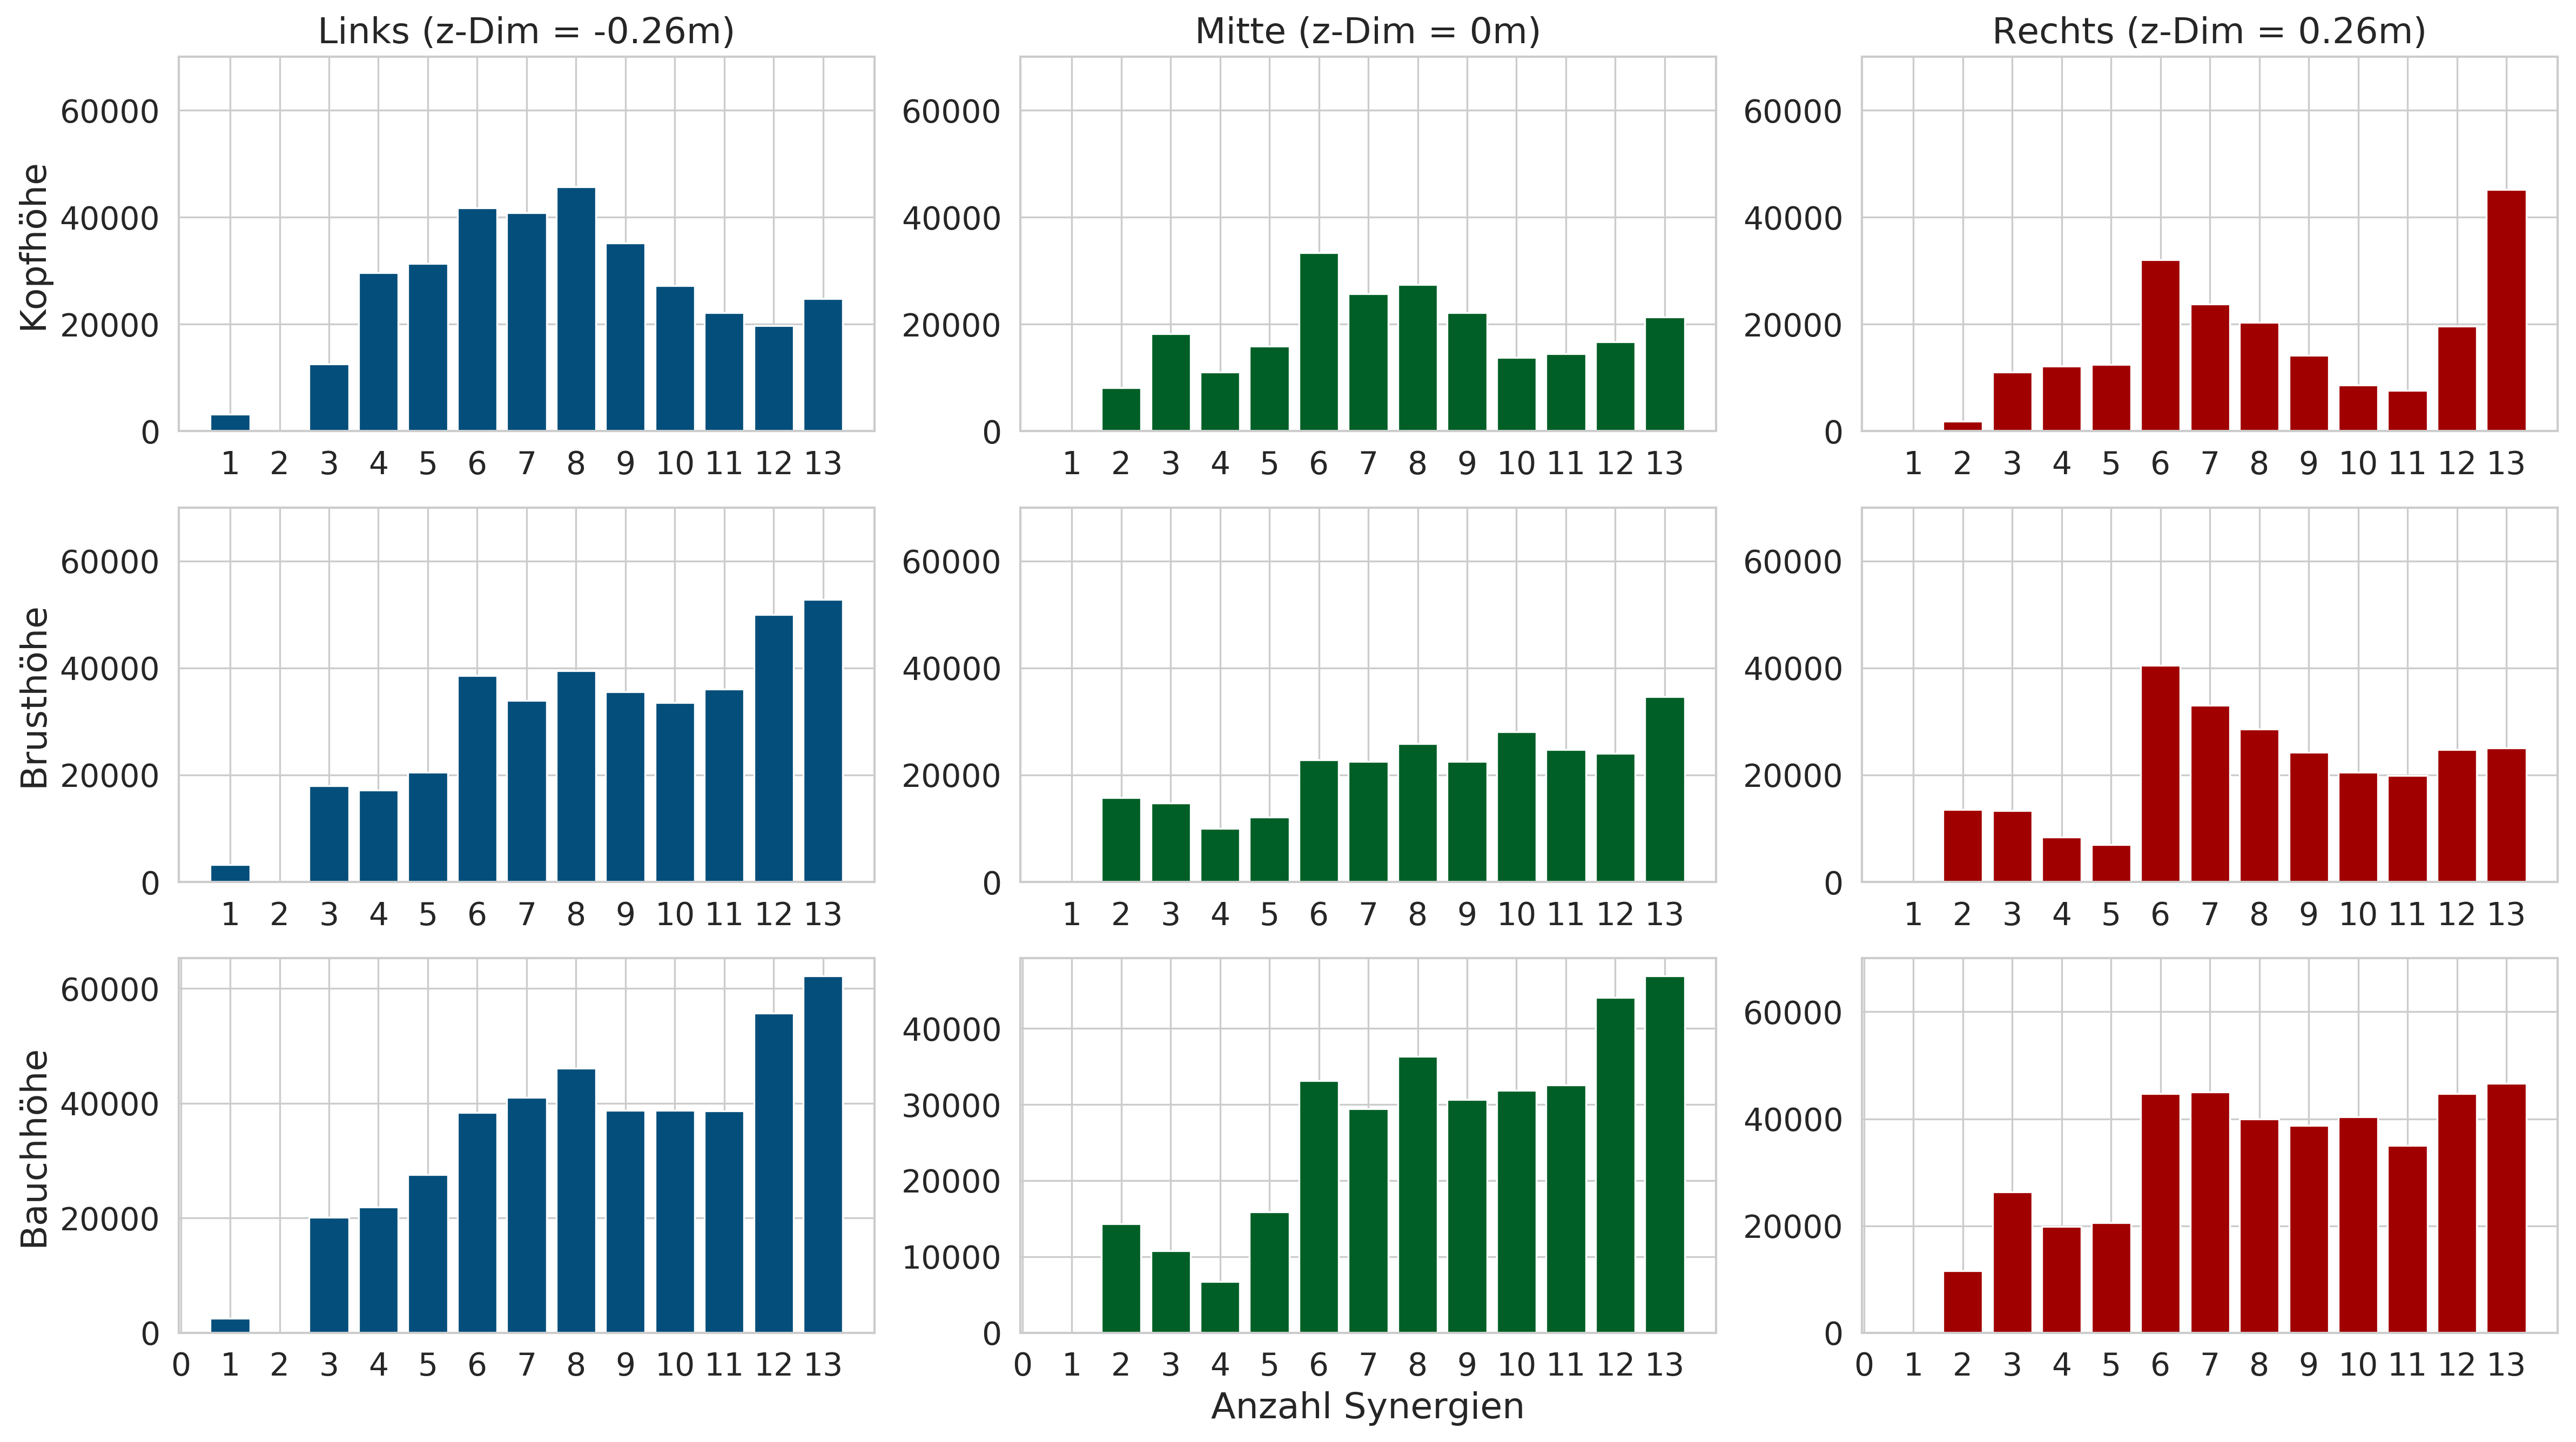

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


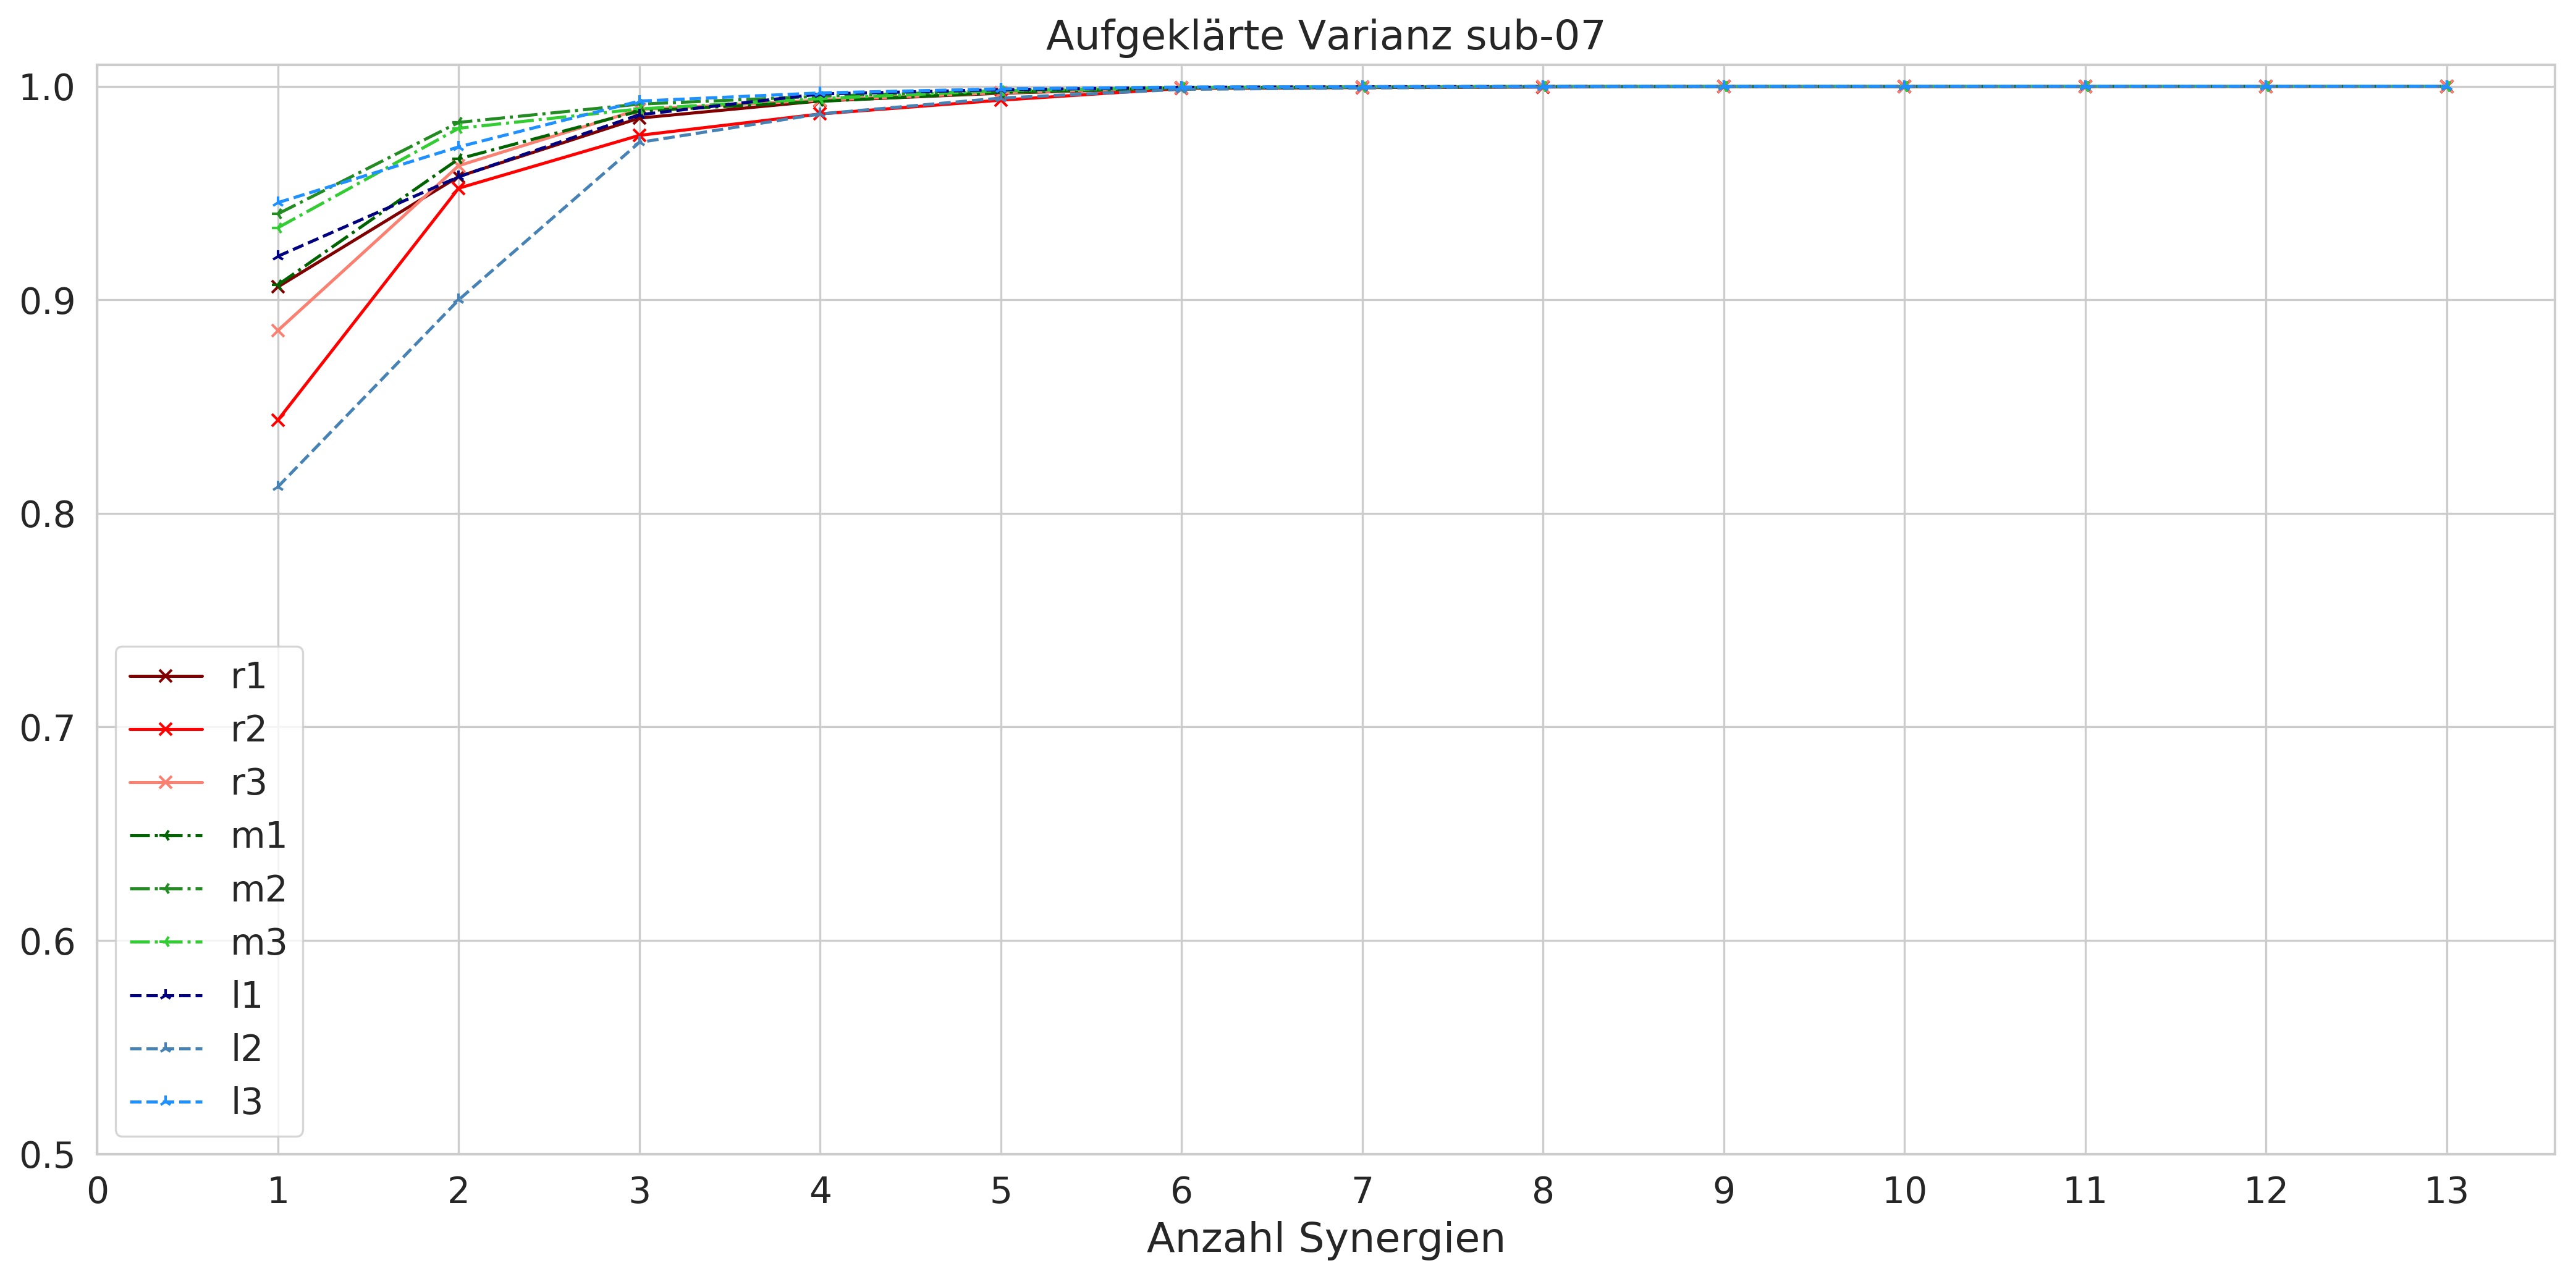

Subject Done!!
sub-01
/home/michael/Desktop/model_evd/1H/sub-01/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


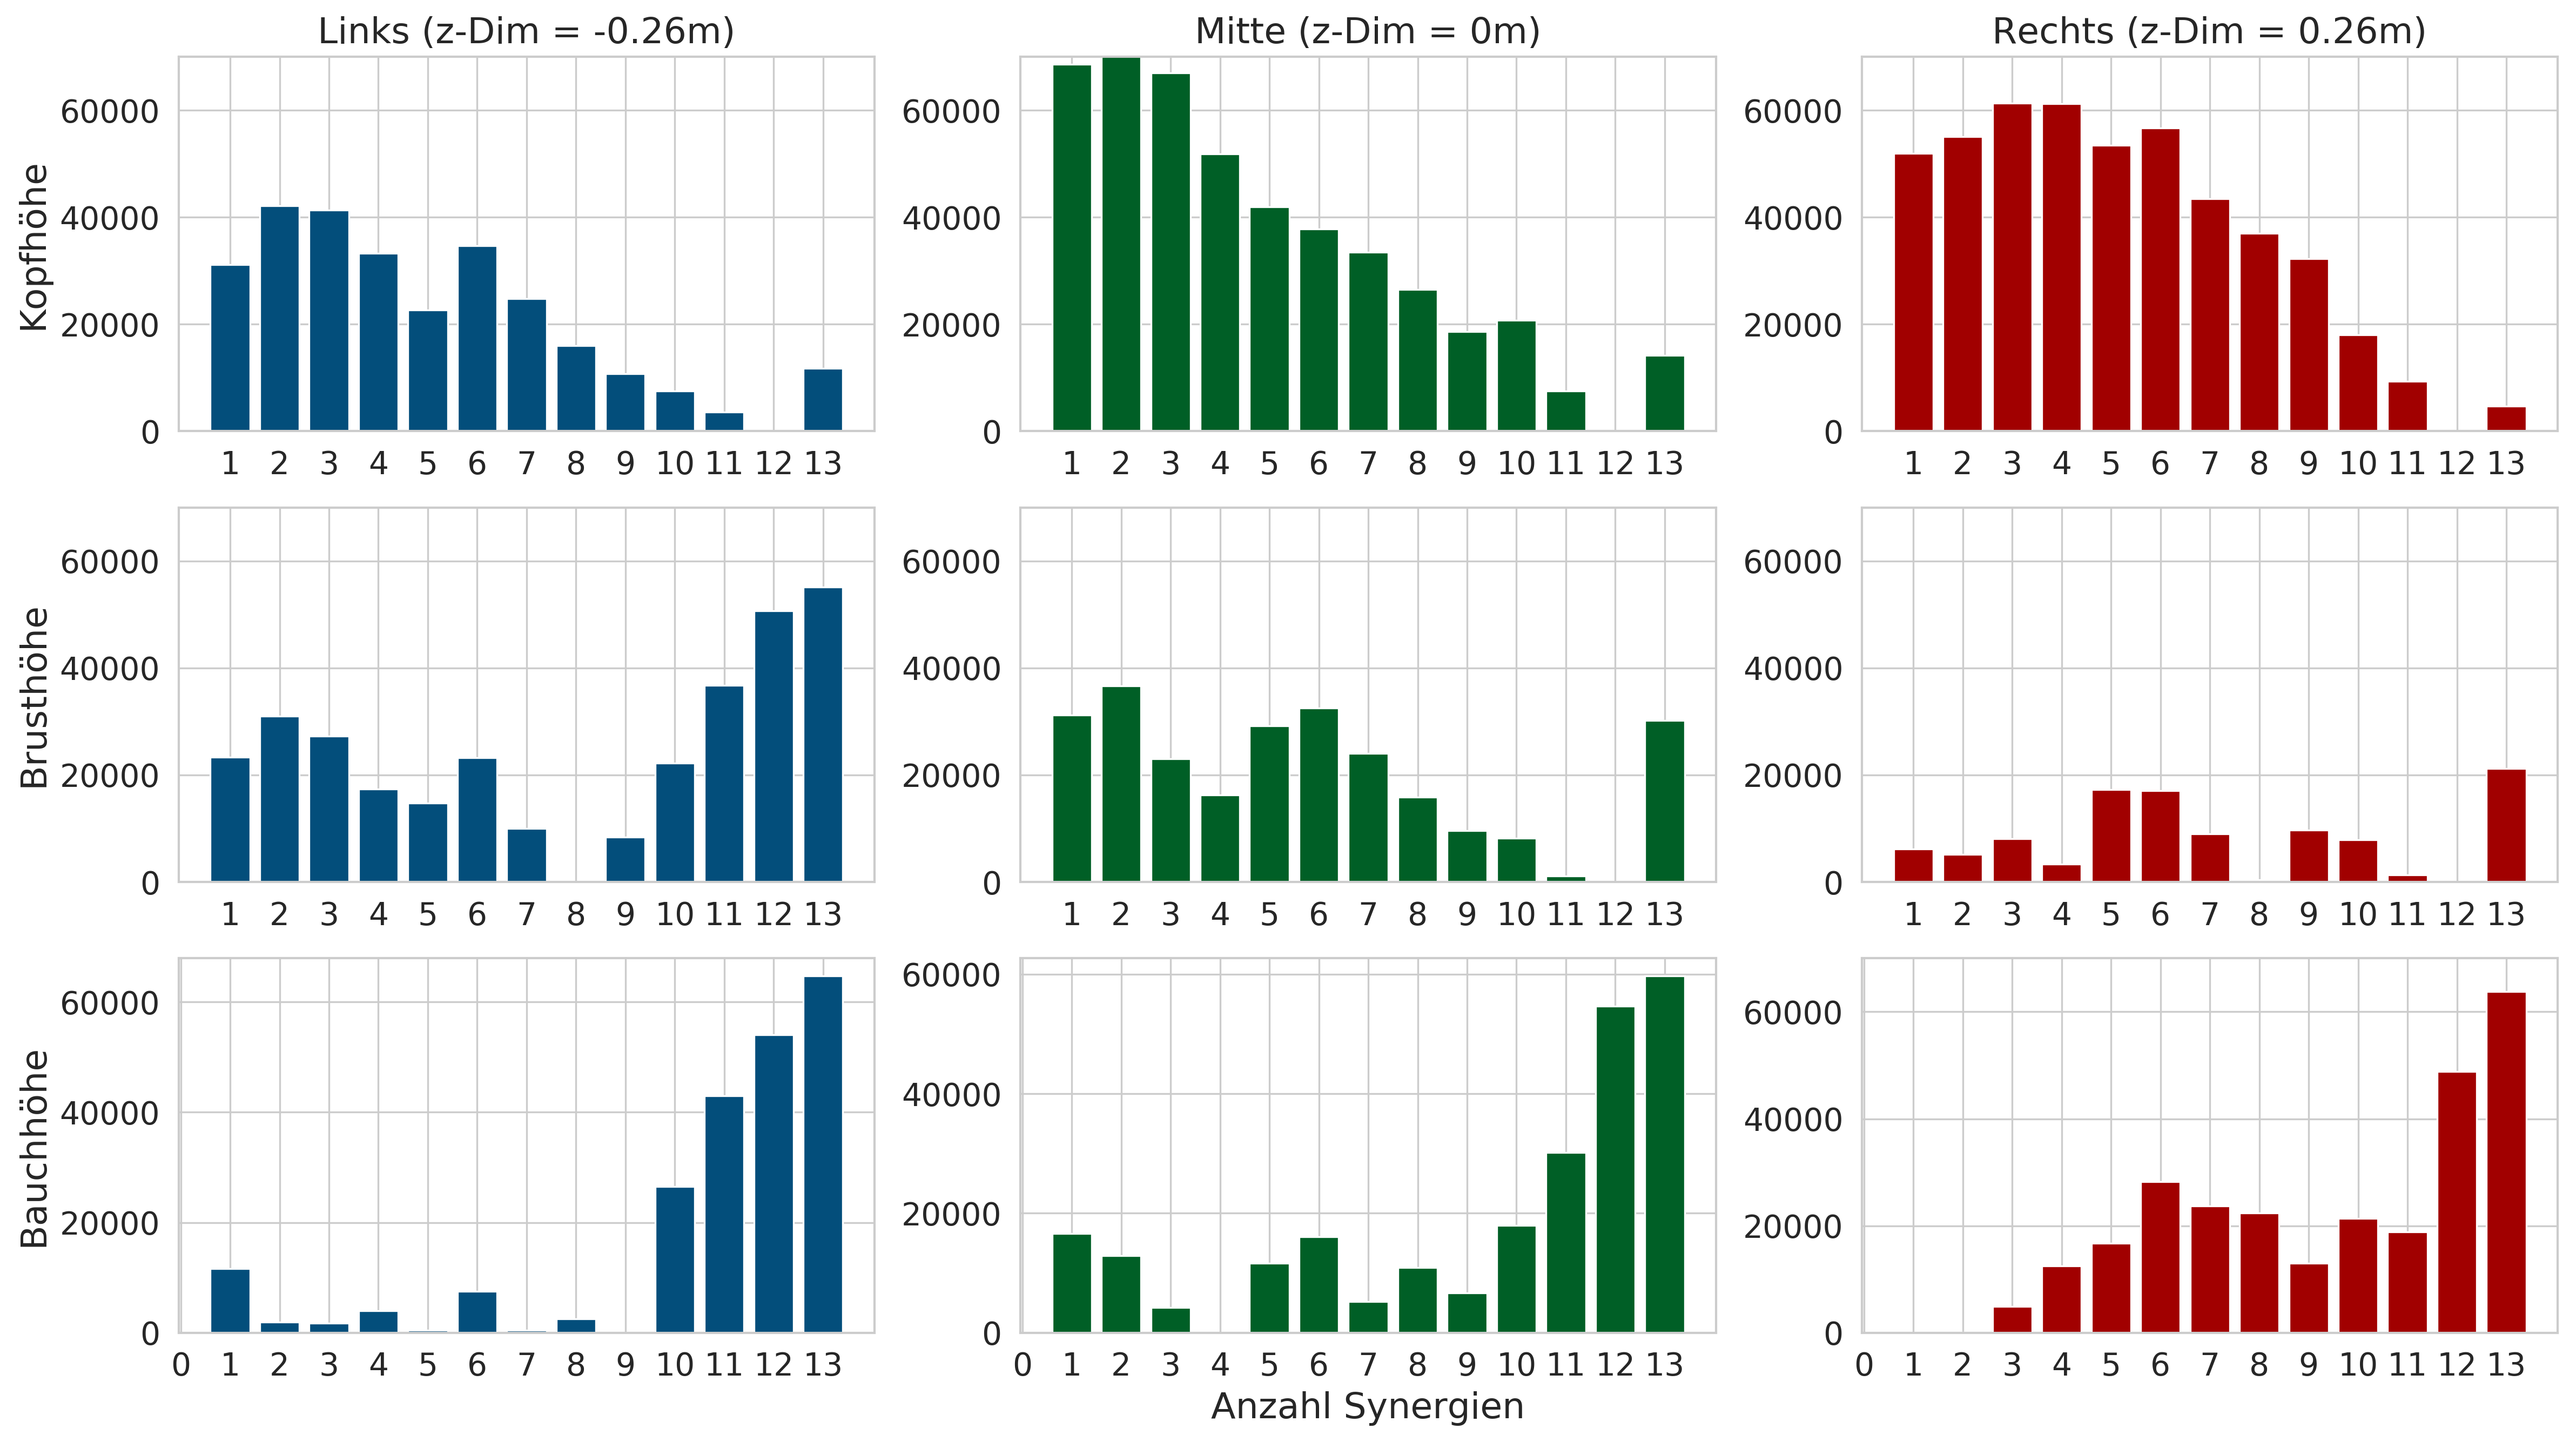

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


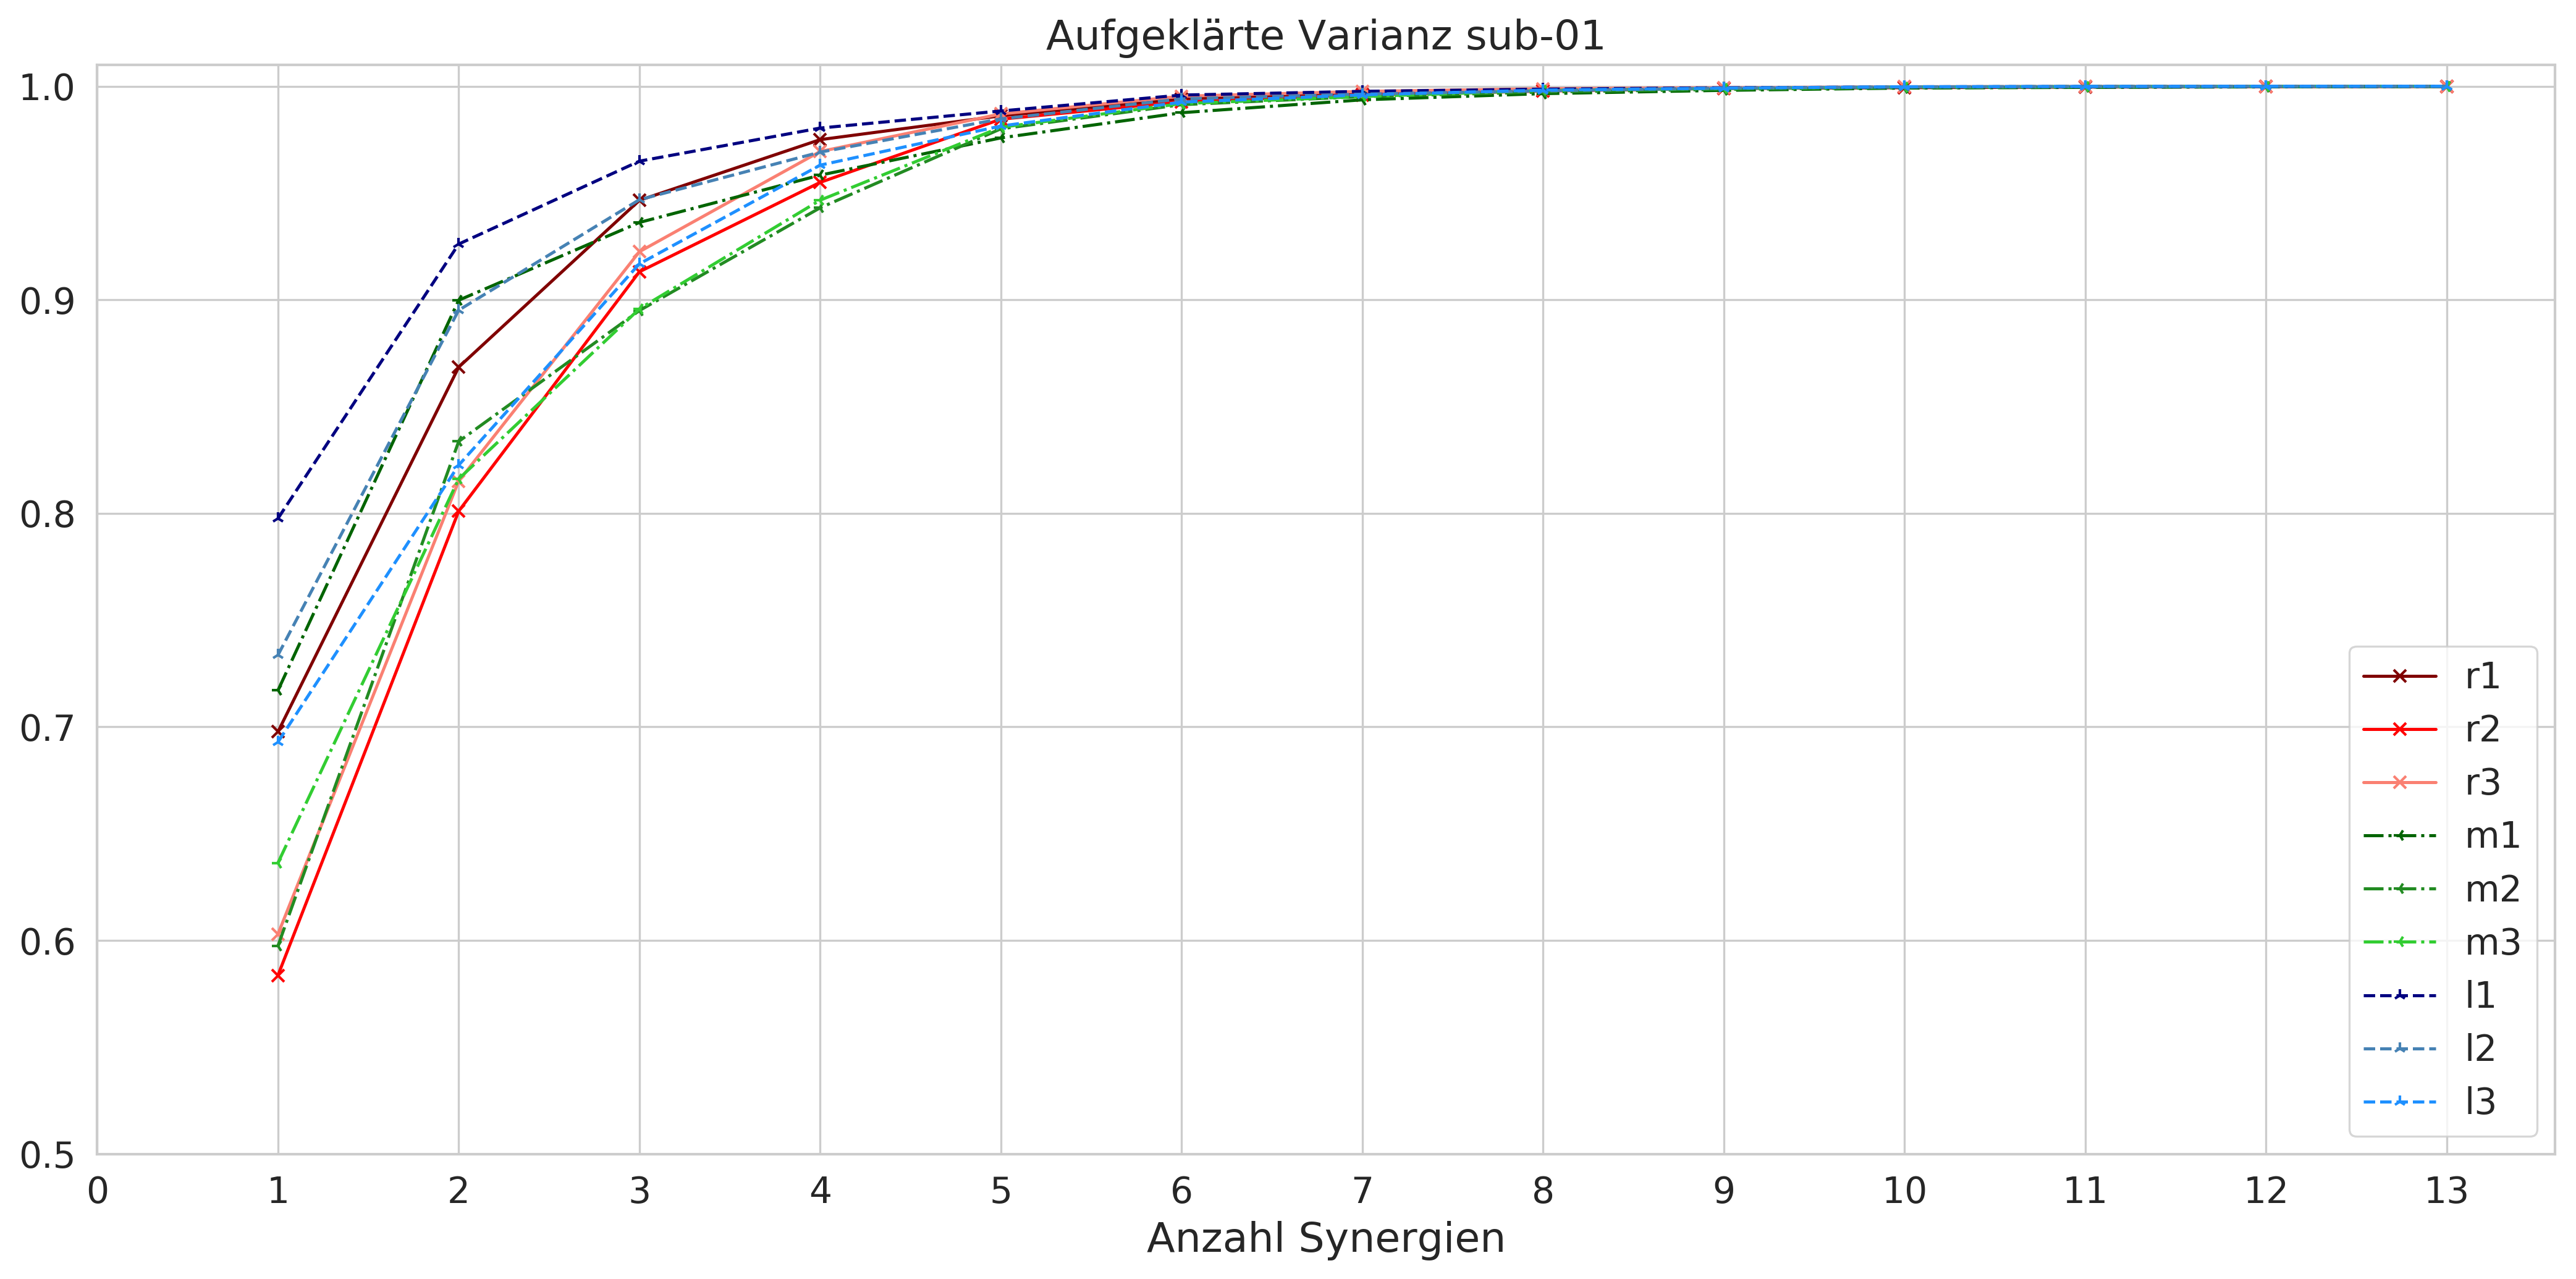

Subject Done!!
sub-05
/home/michael/Desktop/model_evd/1H/sub-05/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


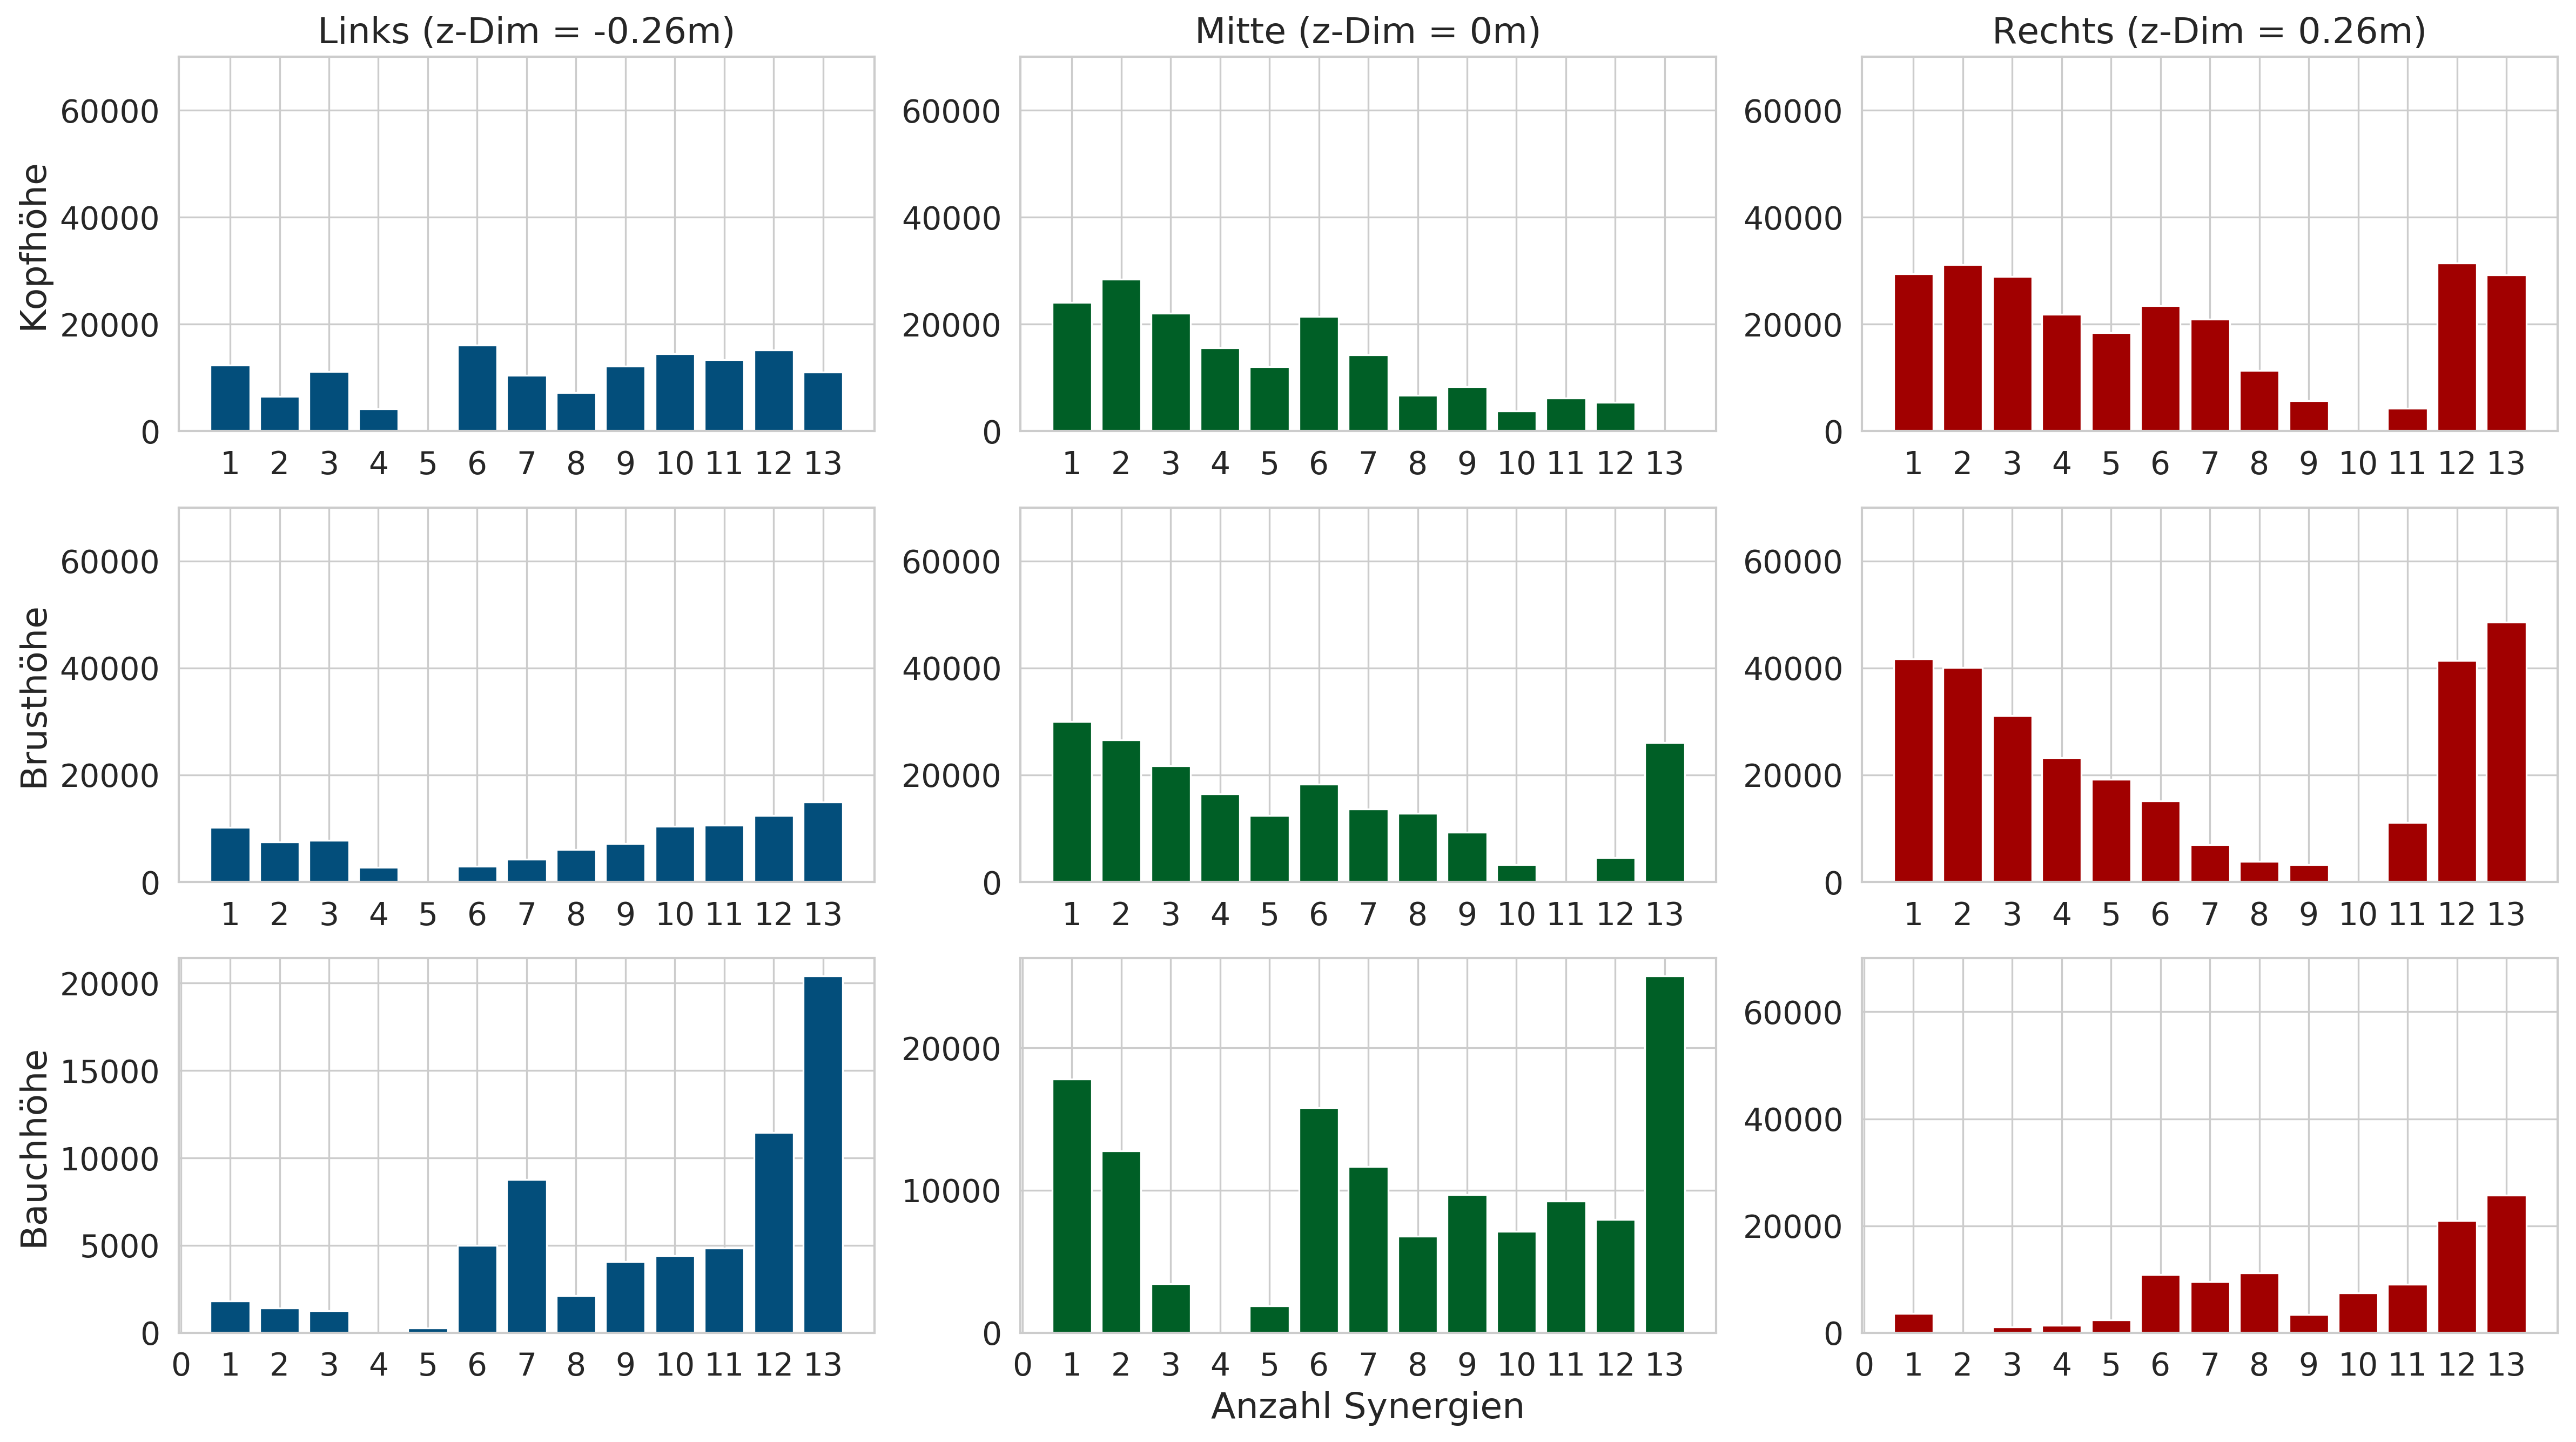

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


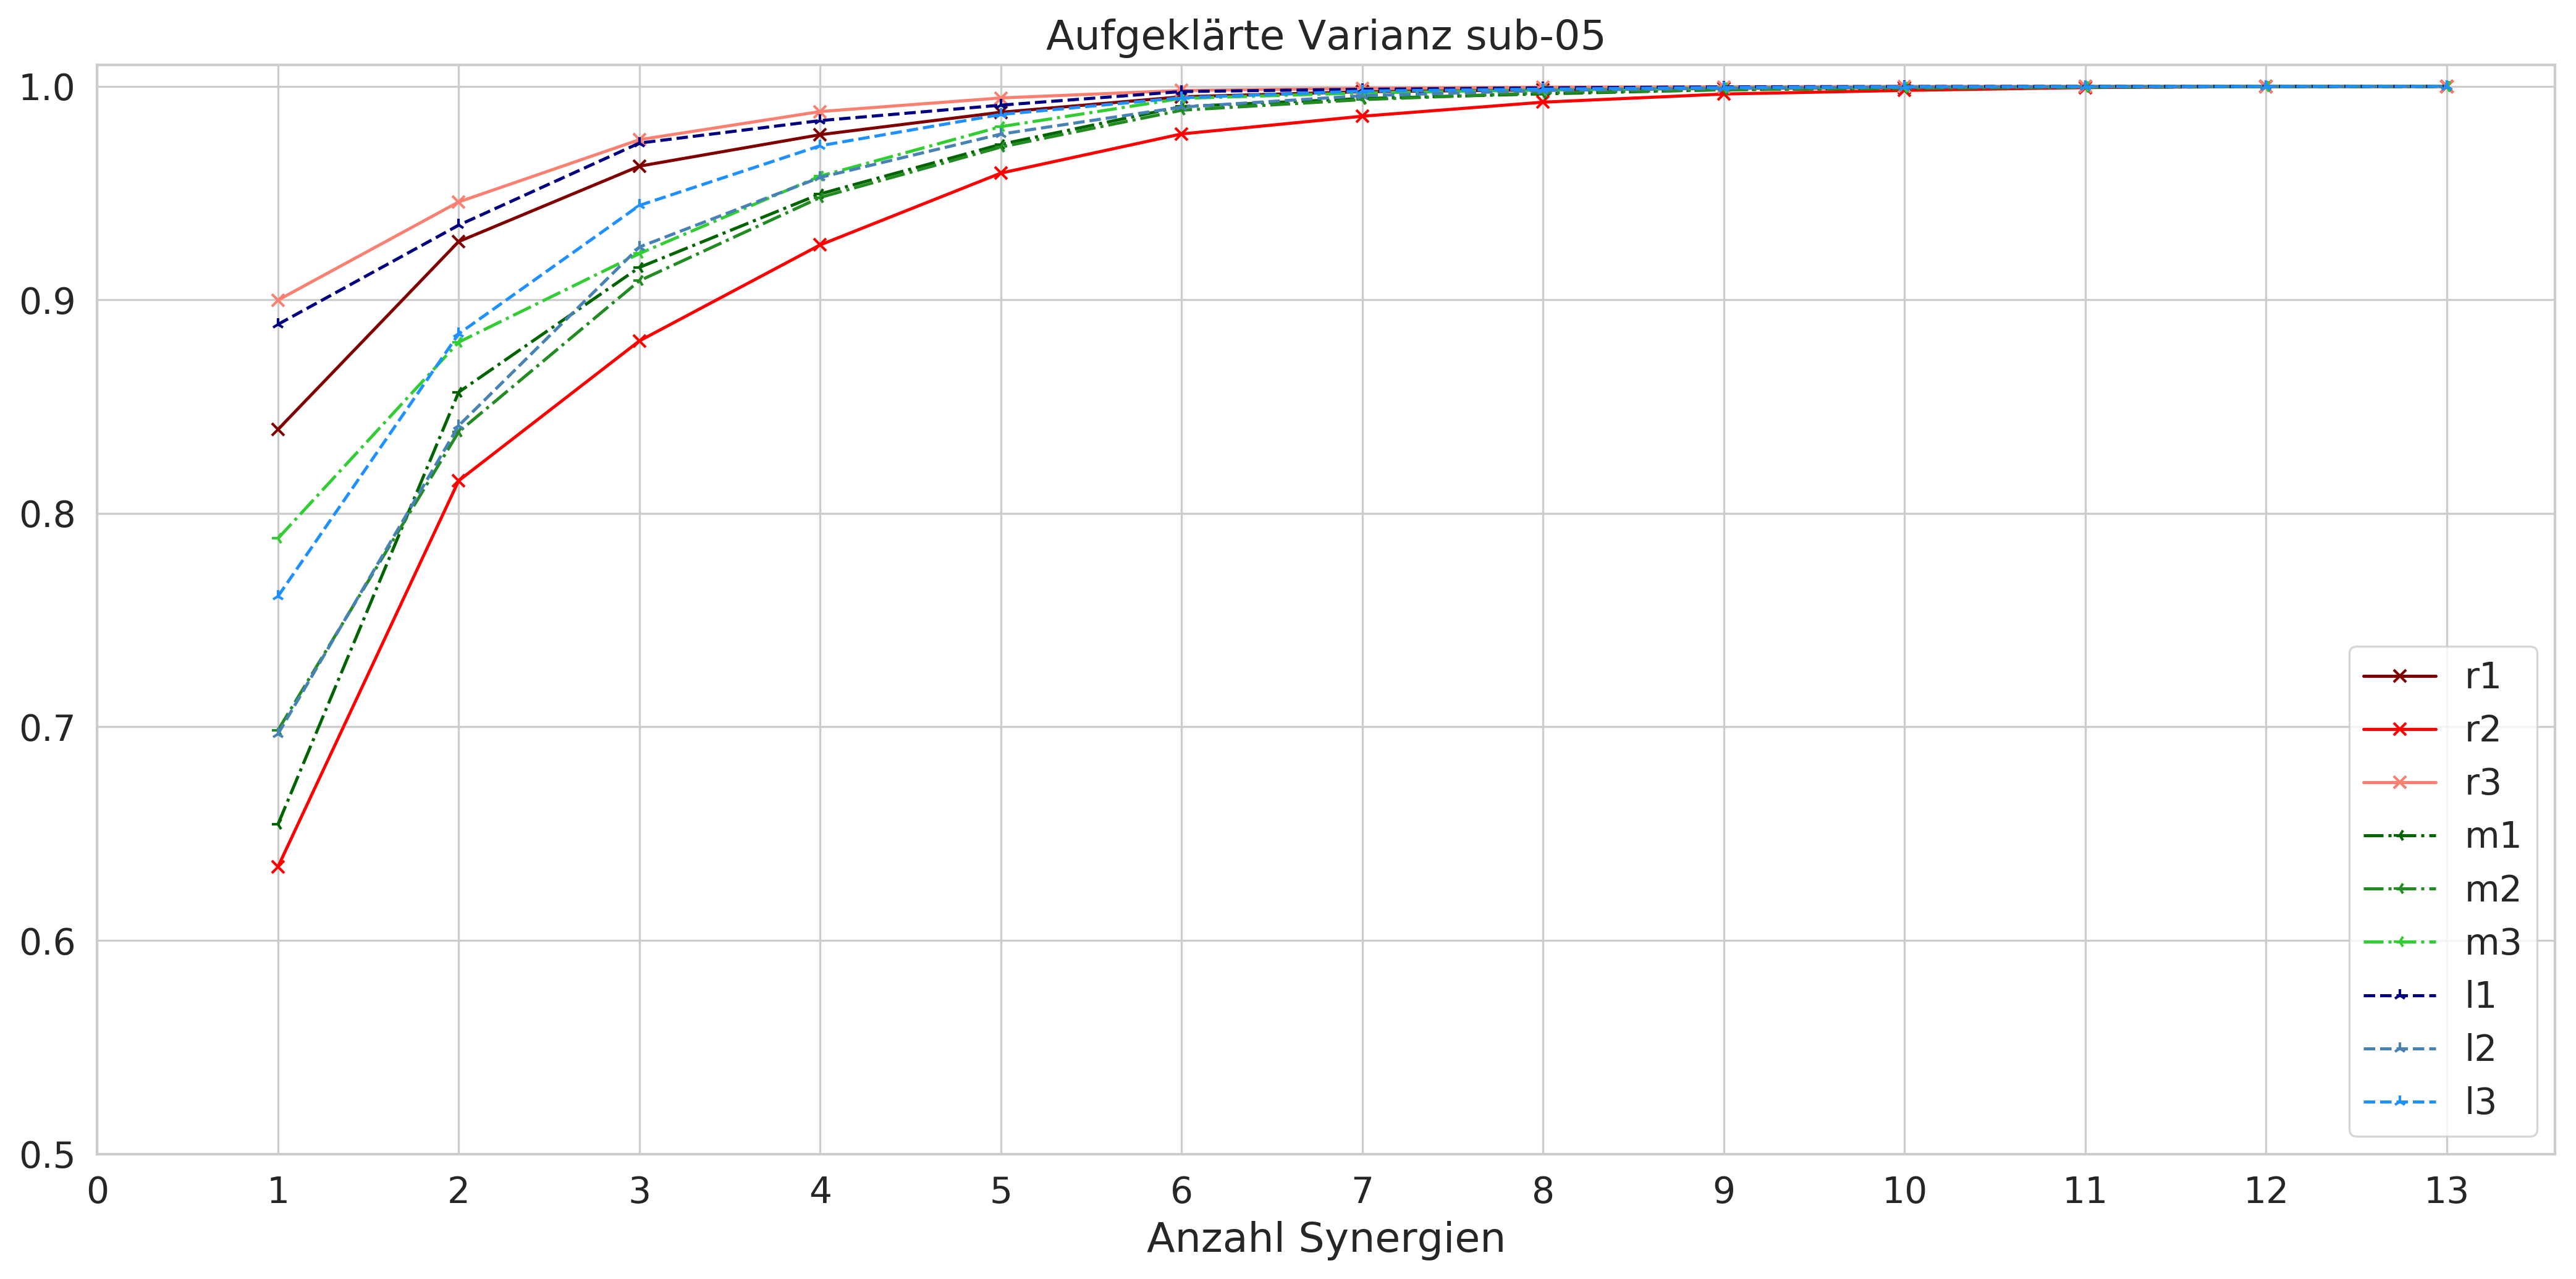

Subject Done!!
sub-06
/home/michael/Desktop/model_evd/1H/sub-06/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


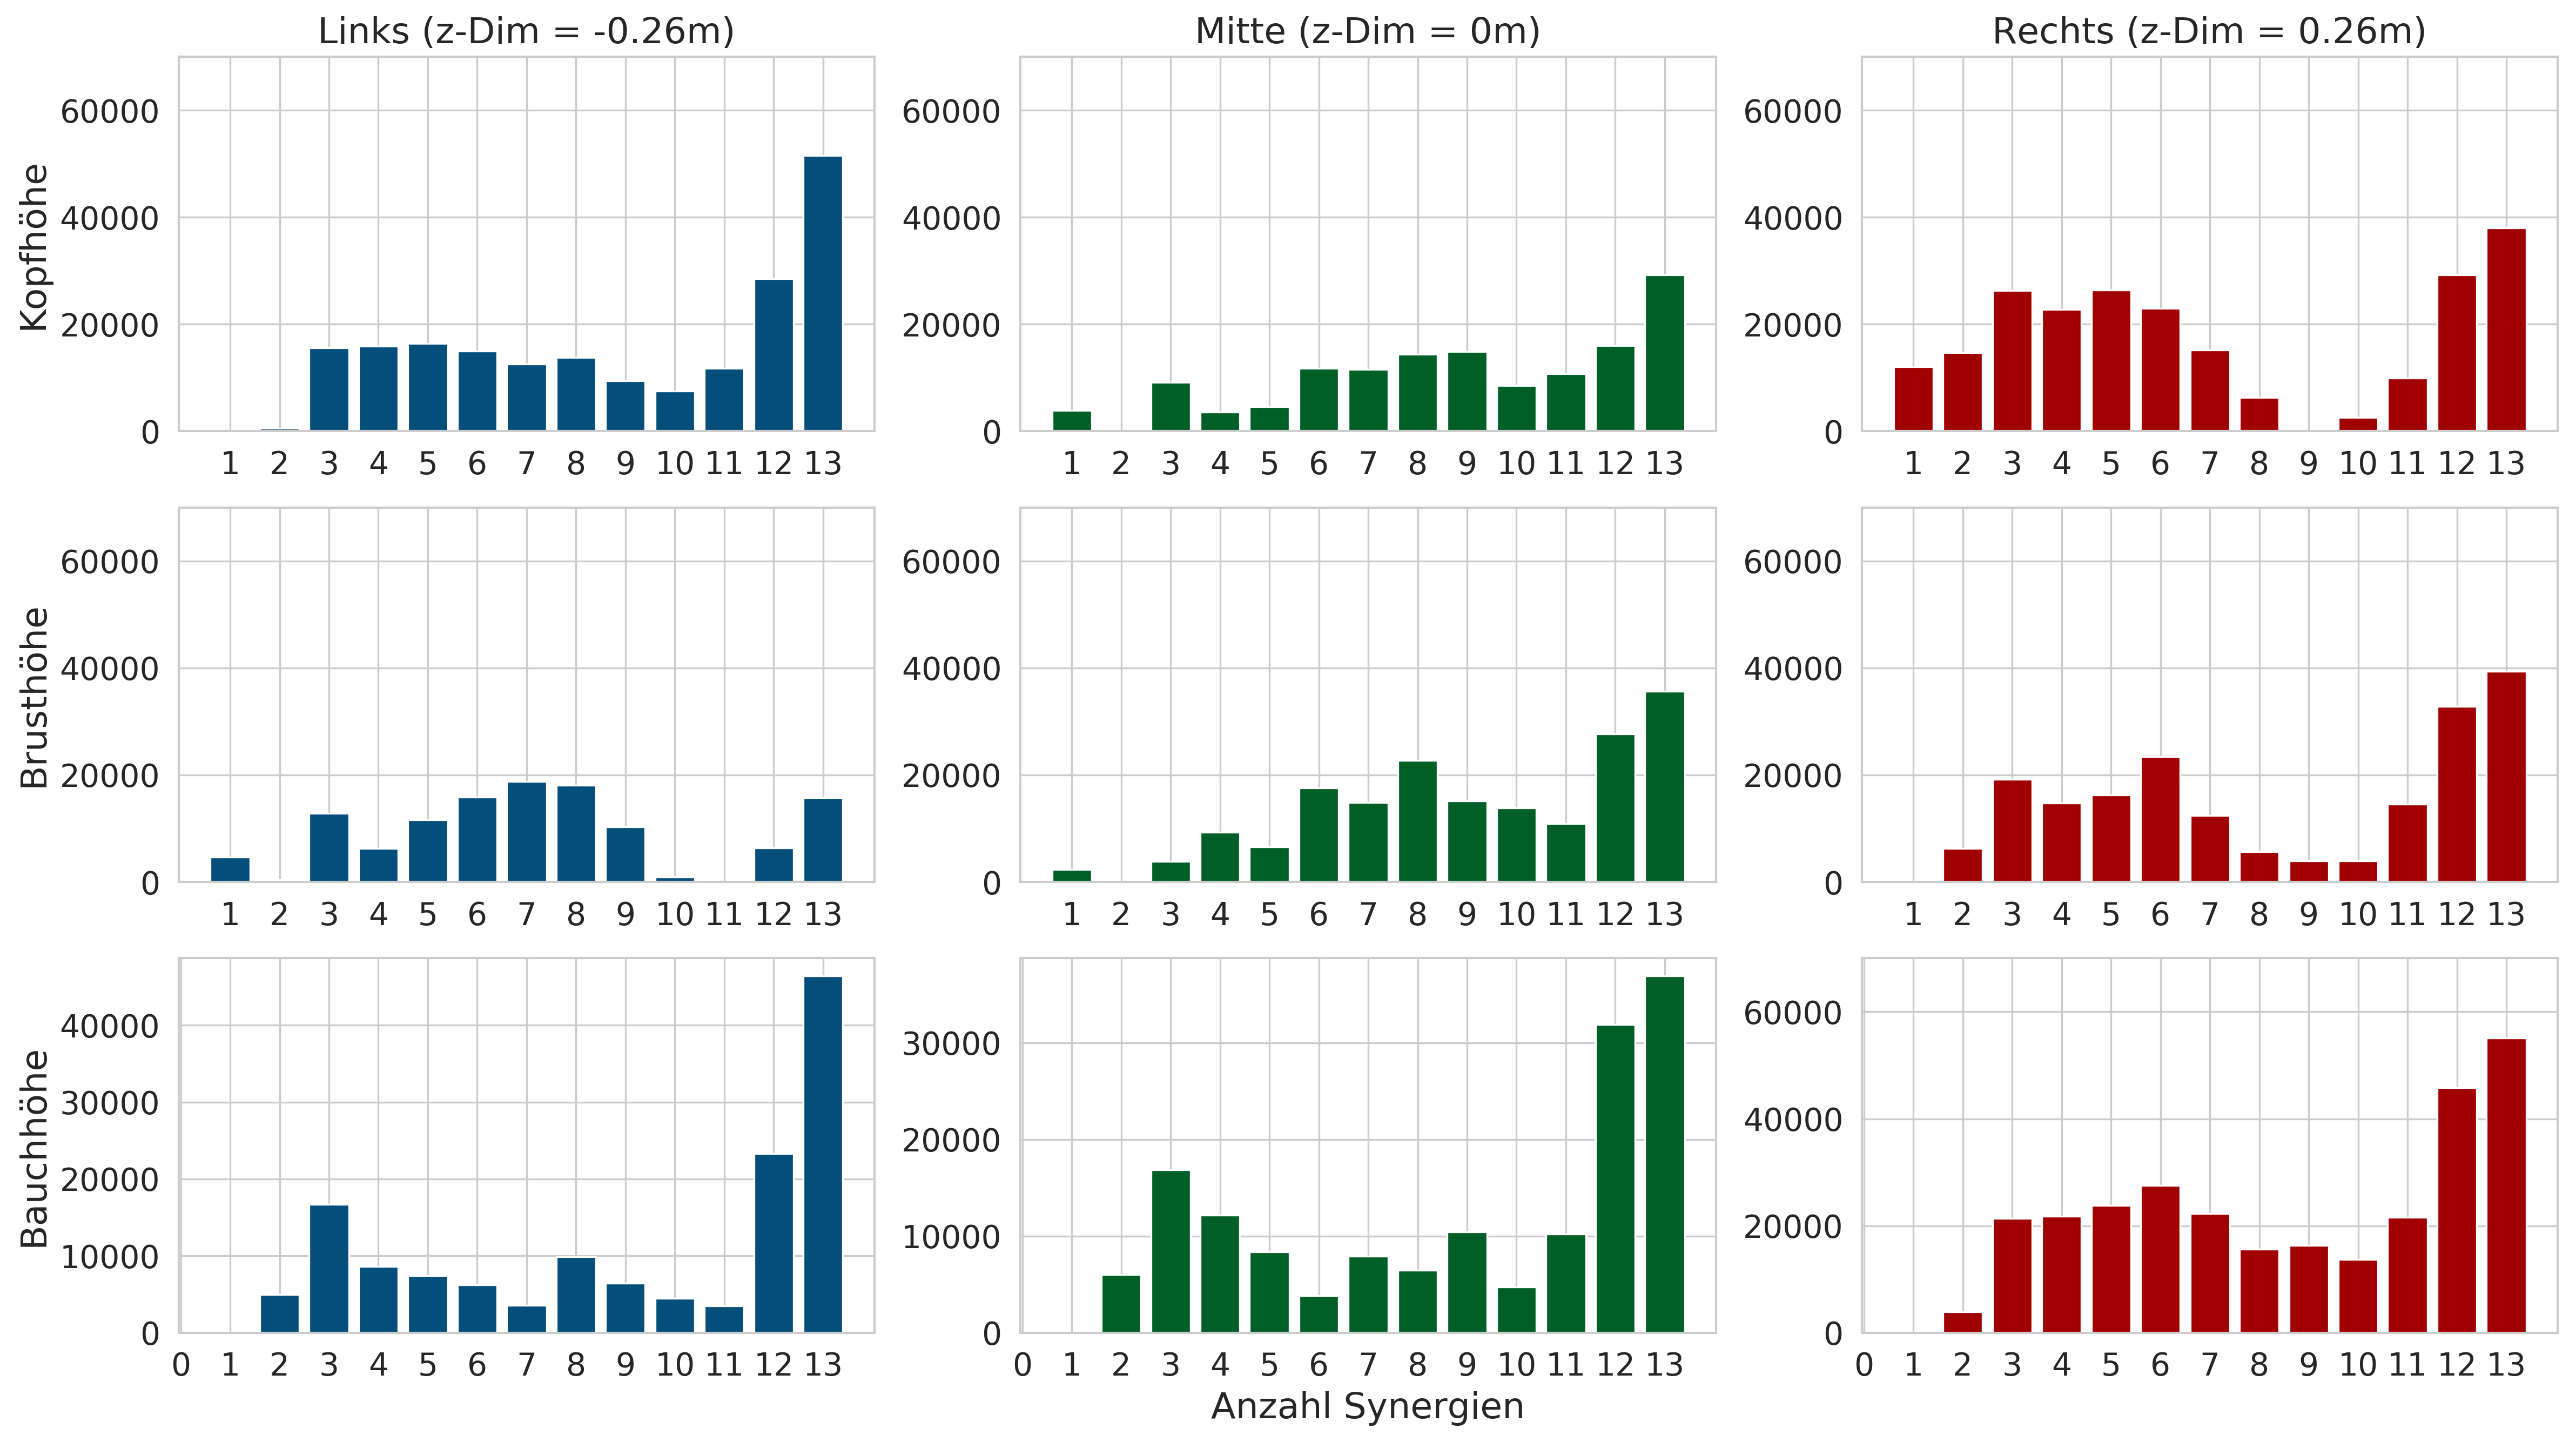

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


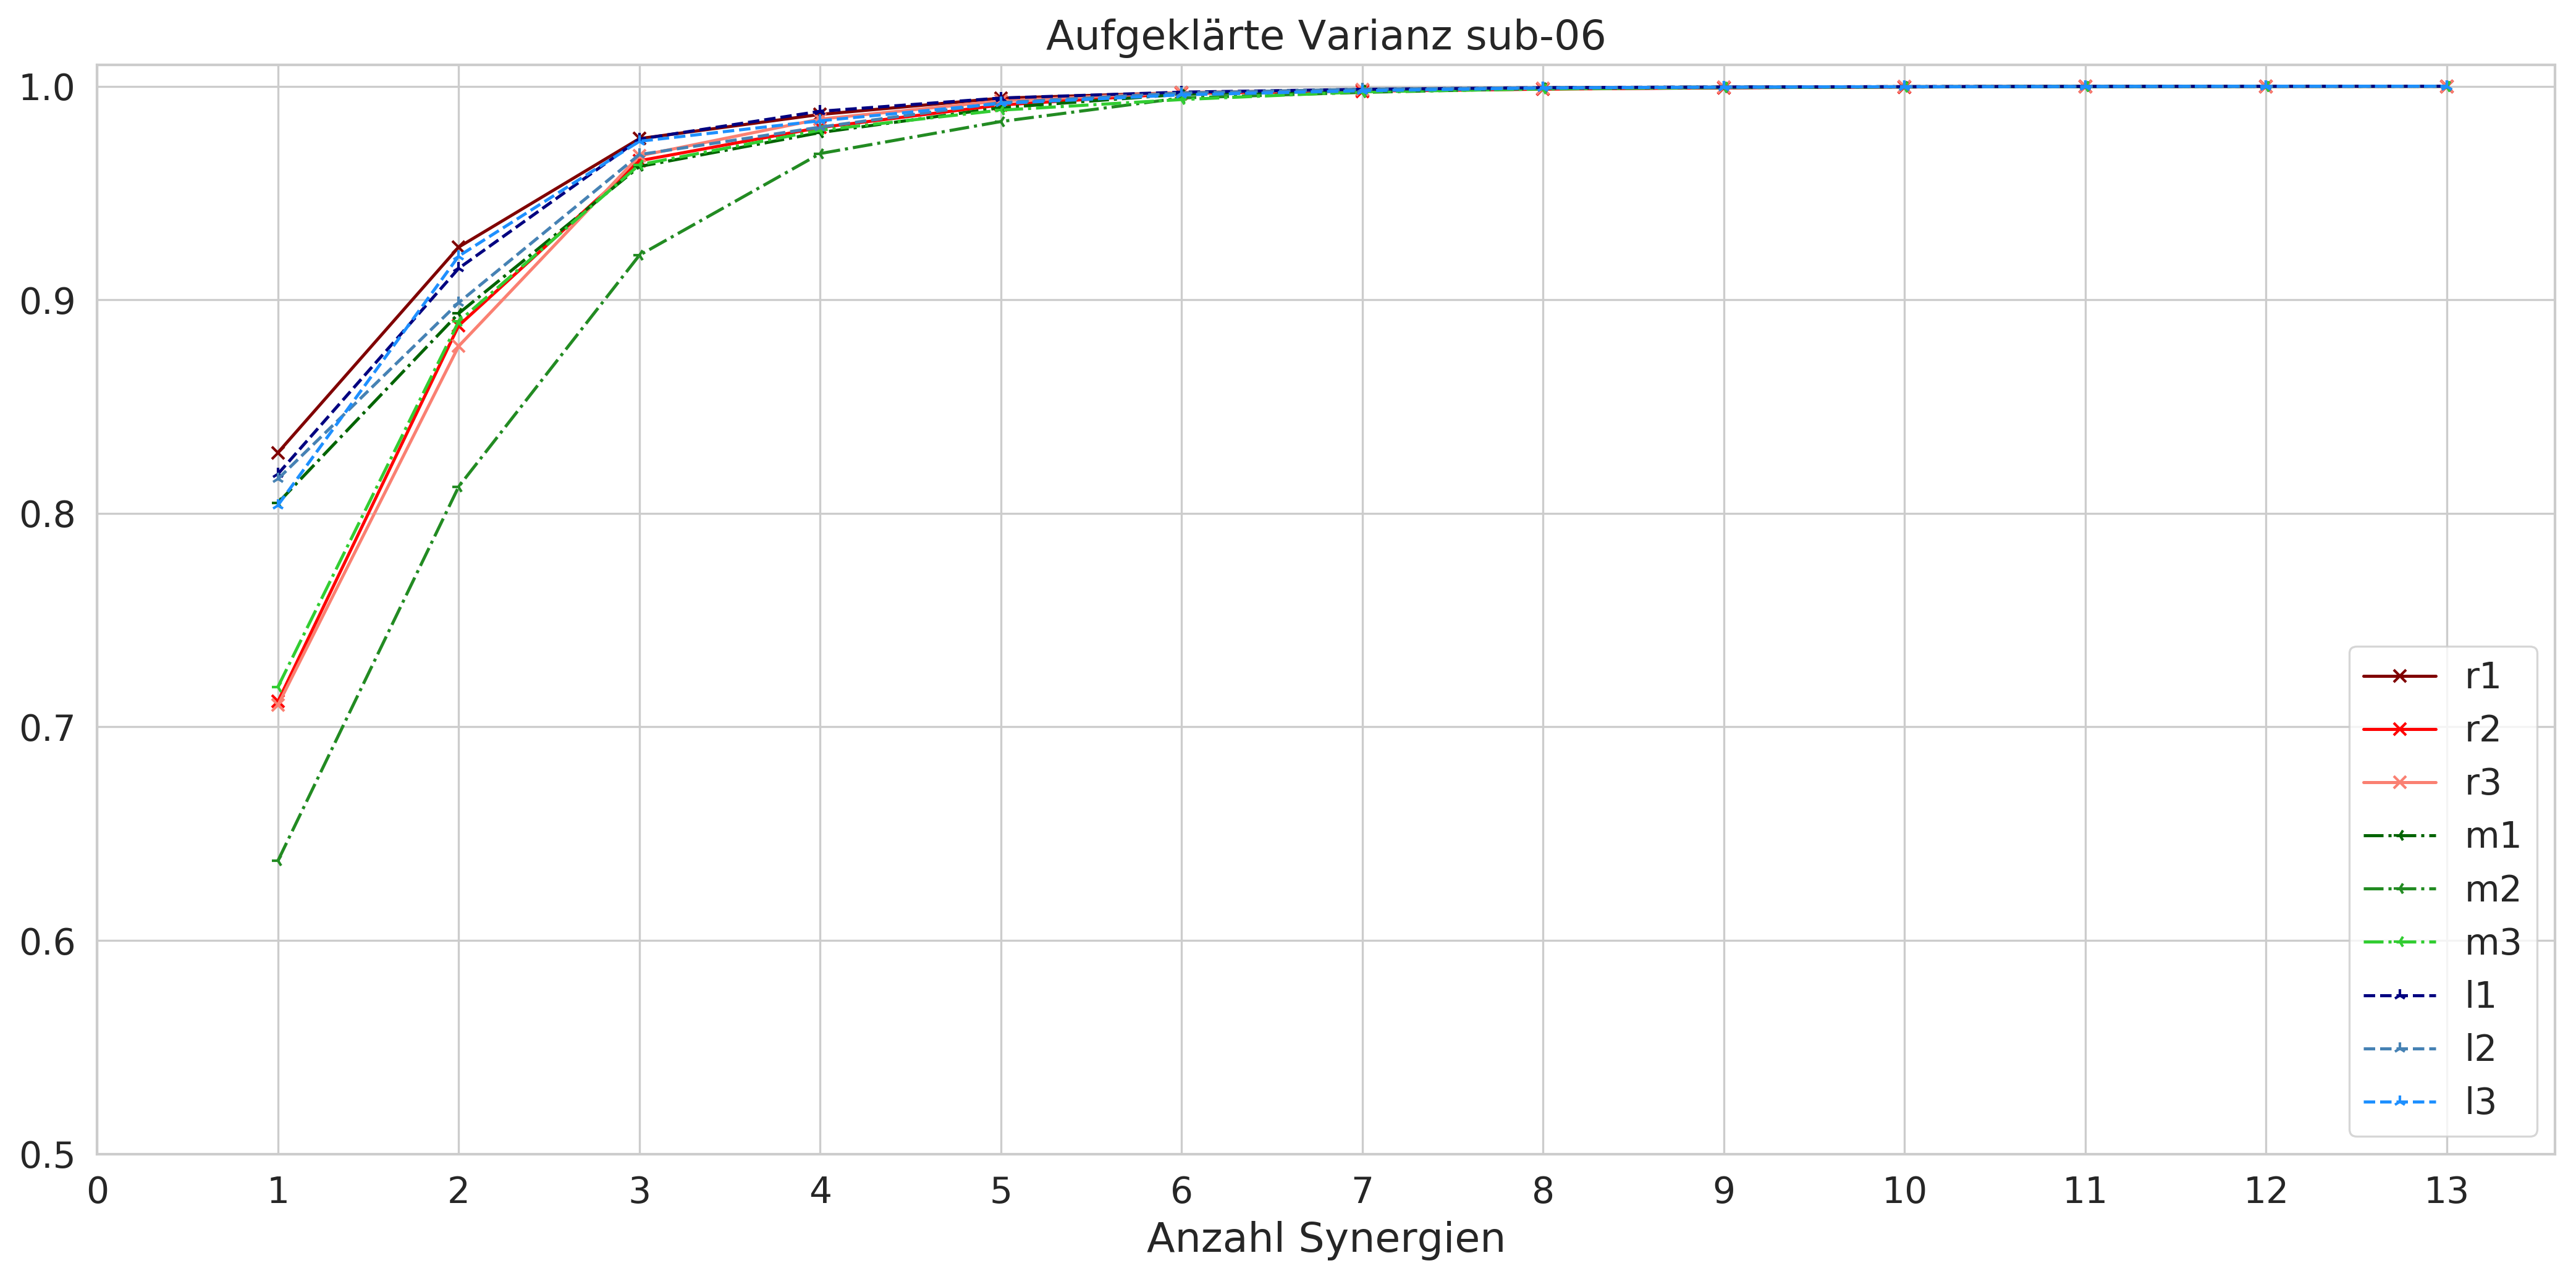

Subject Done!!
sub-12
/home/michael/Desktop/model_evd/1H/sub-12/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


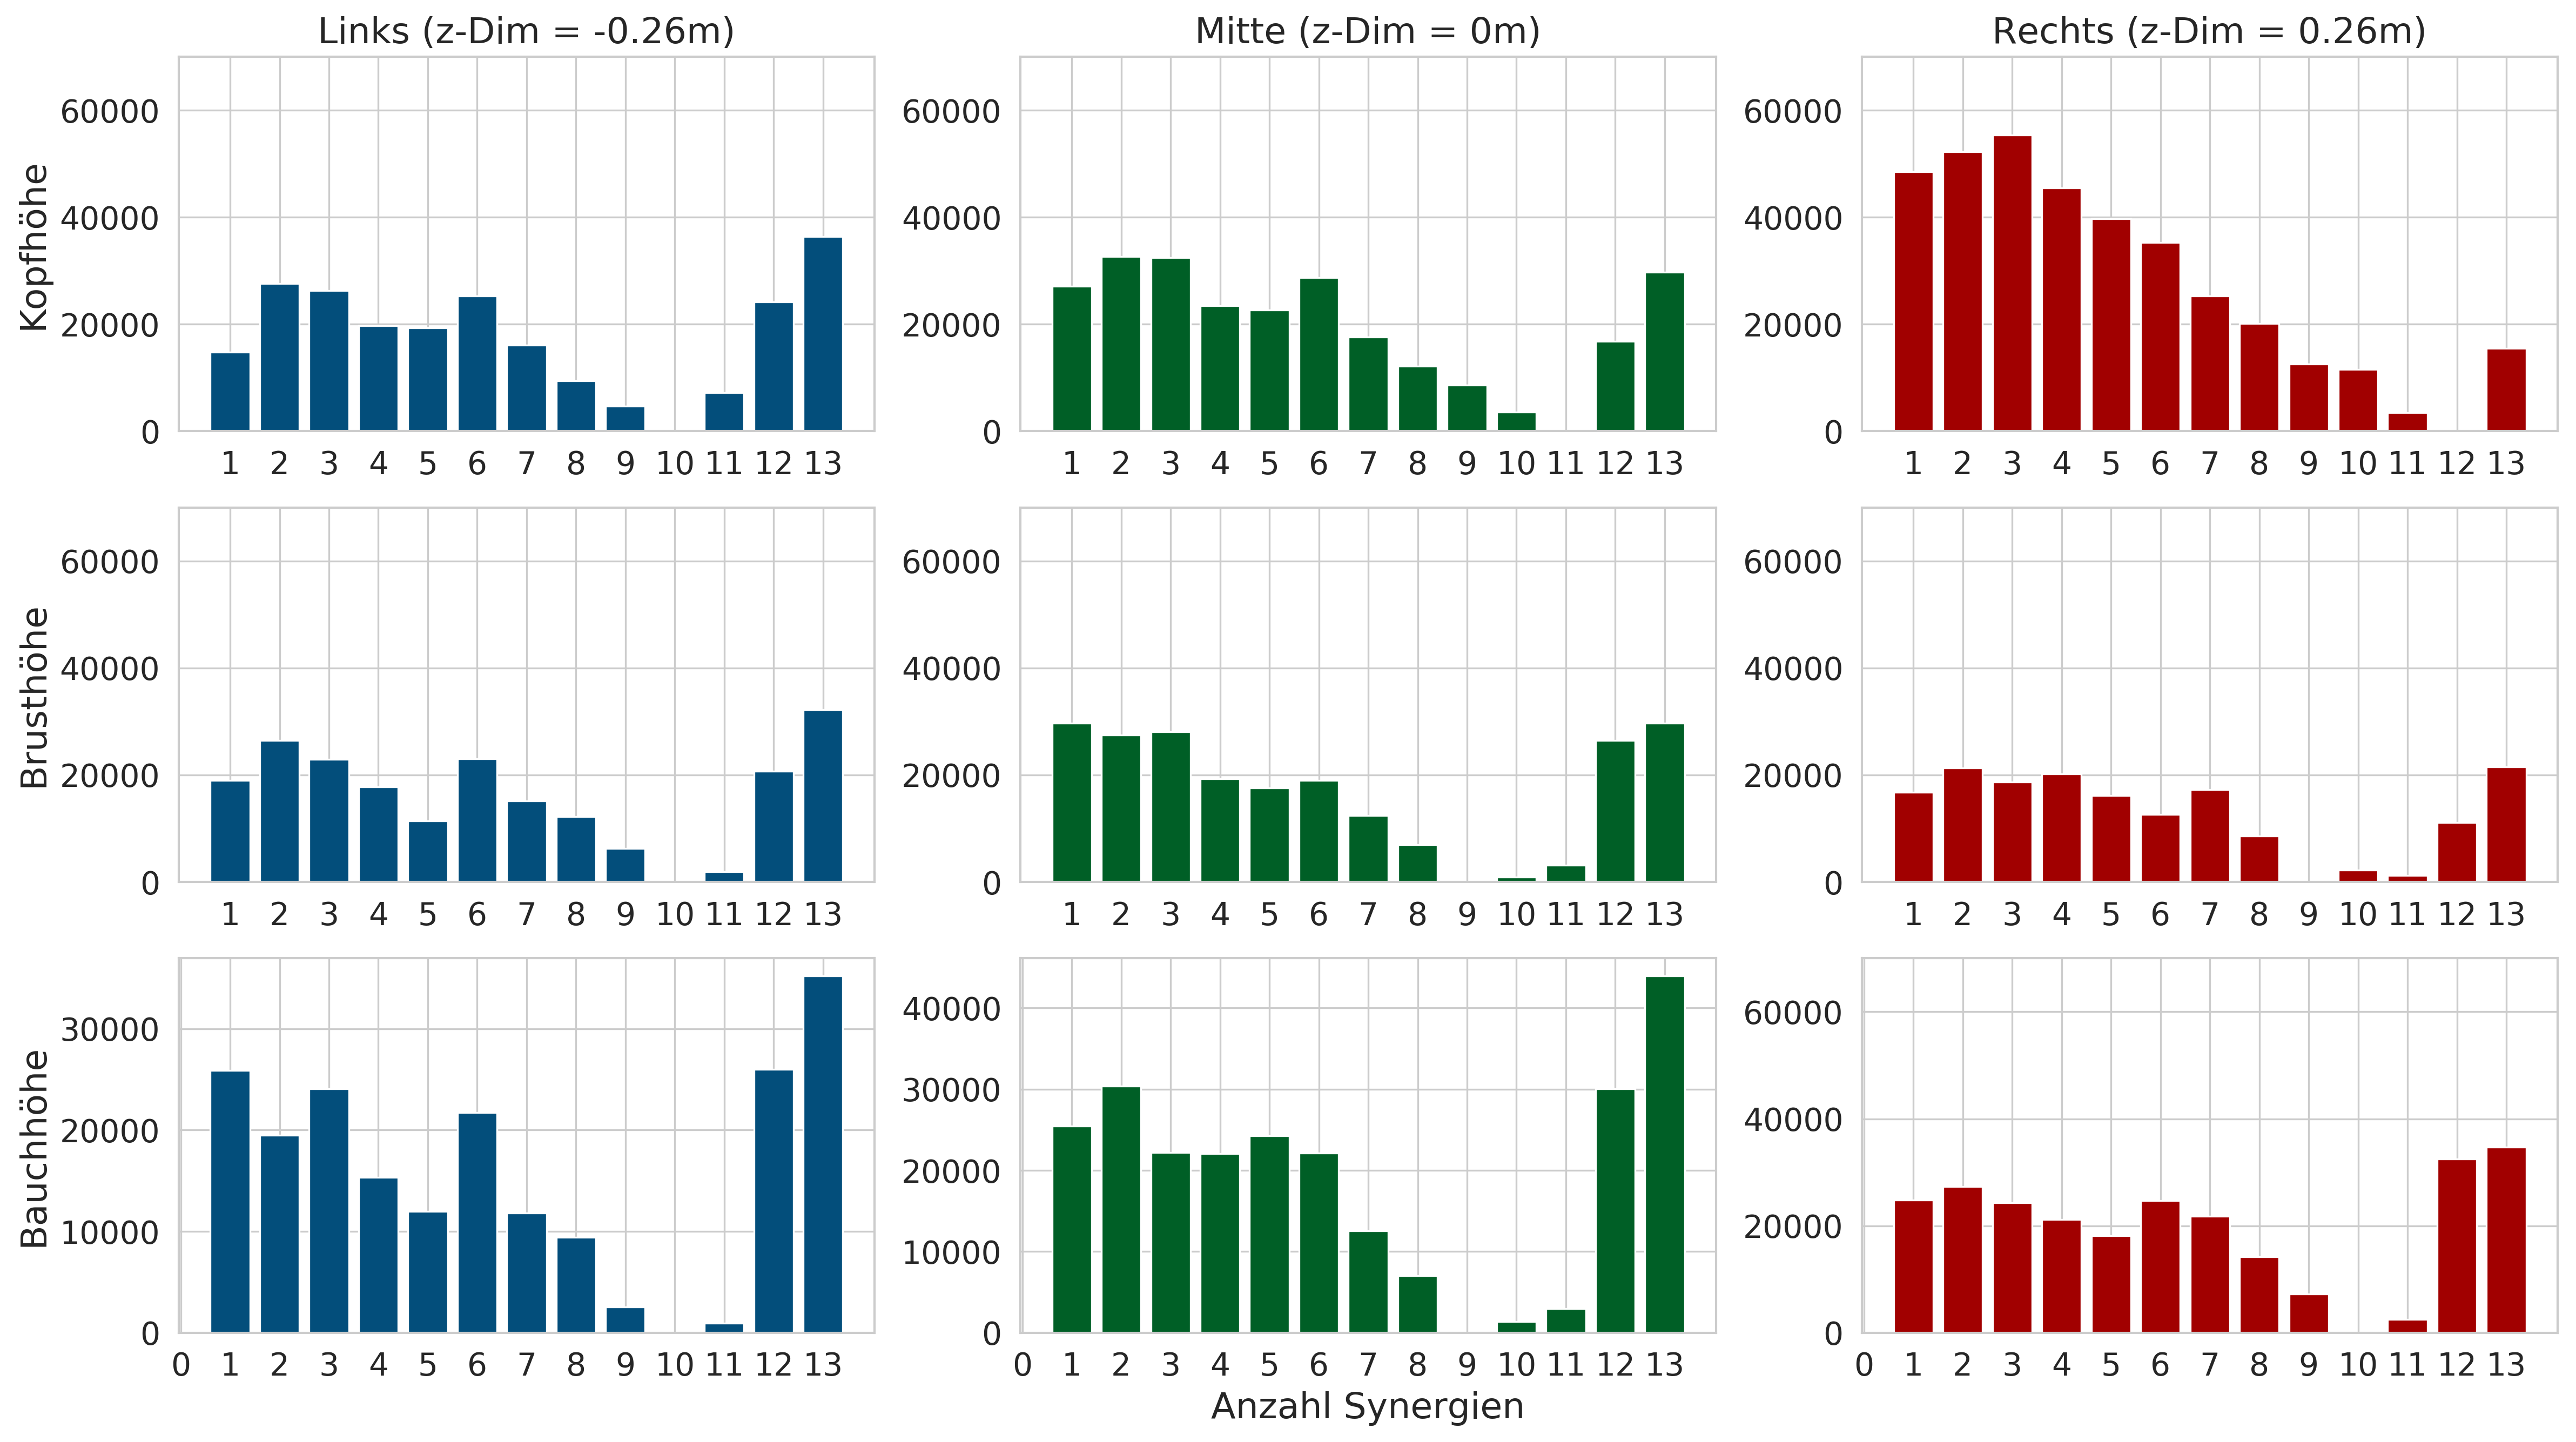

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


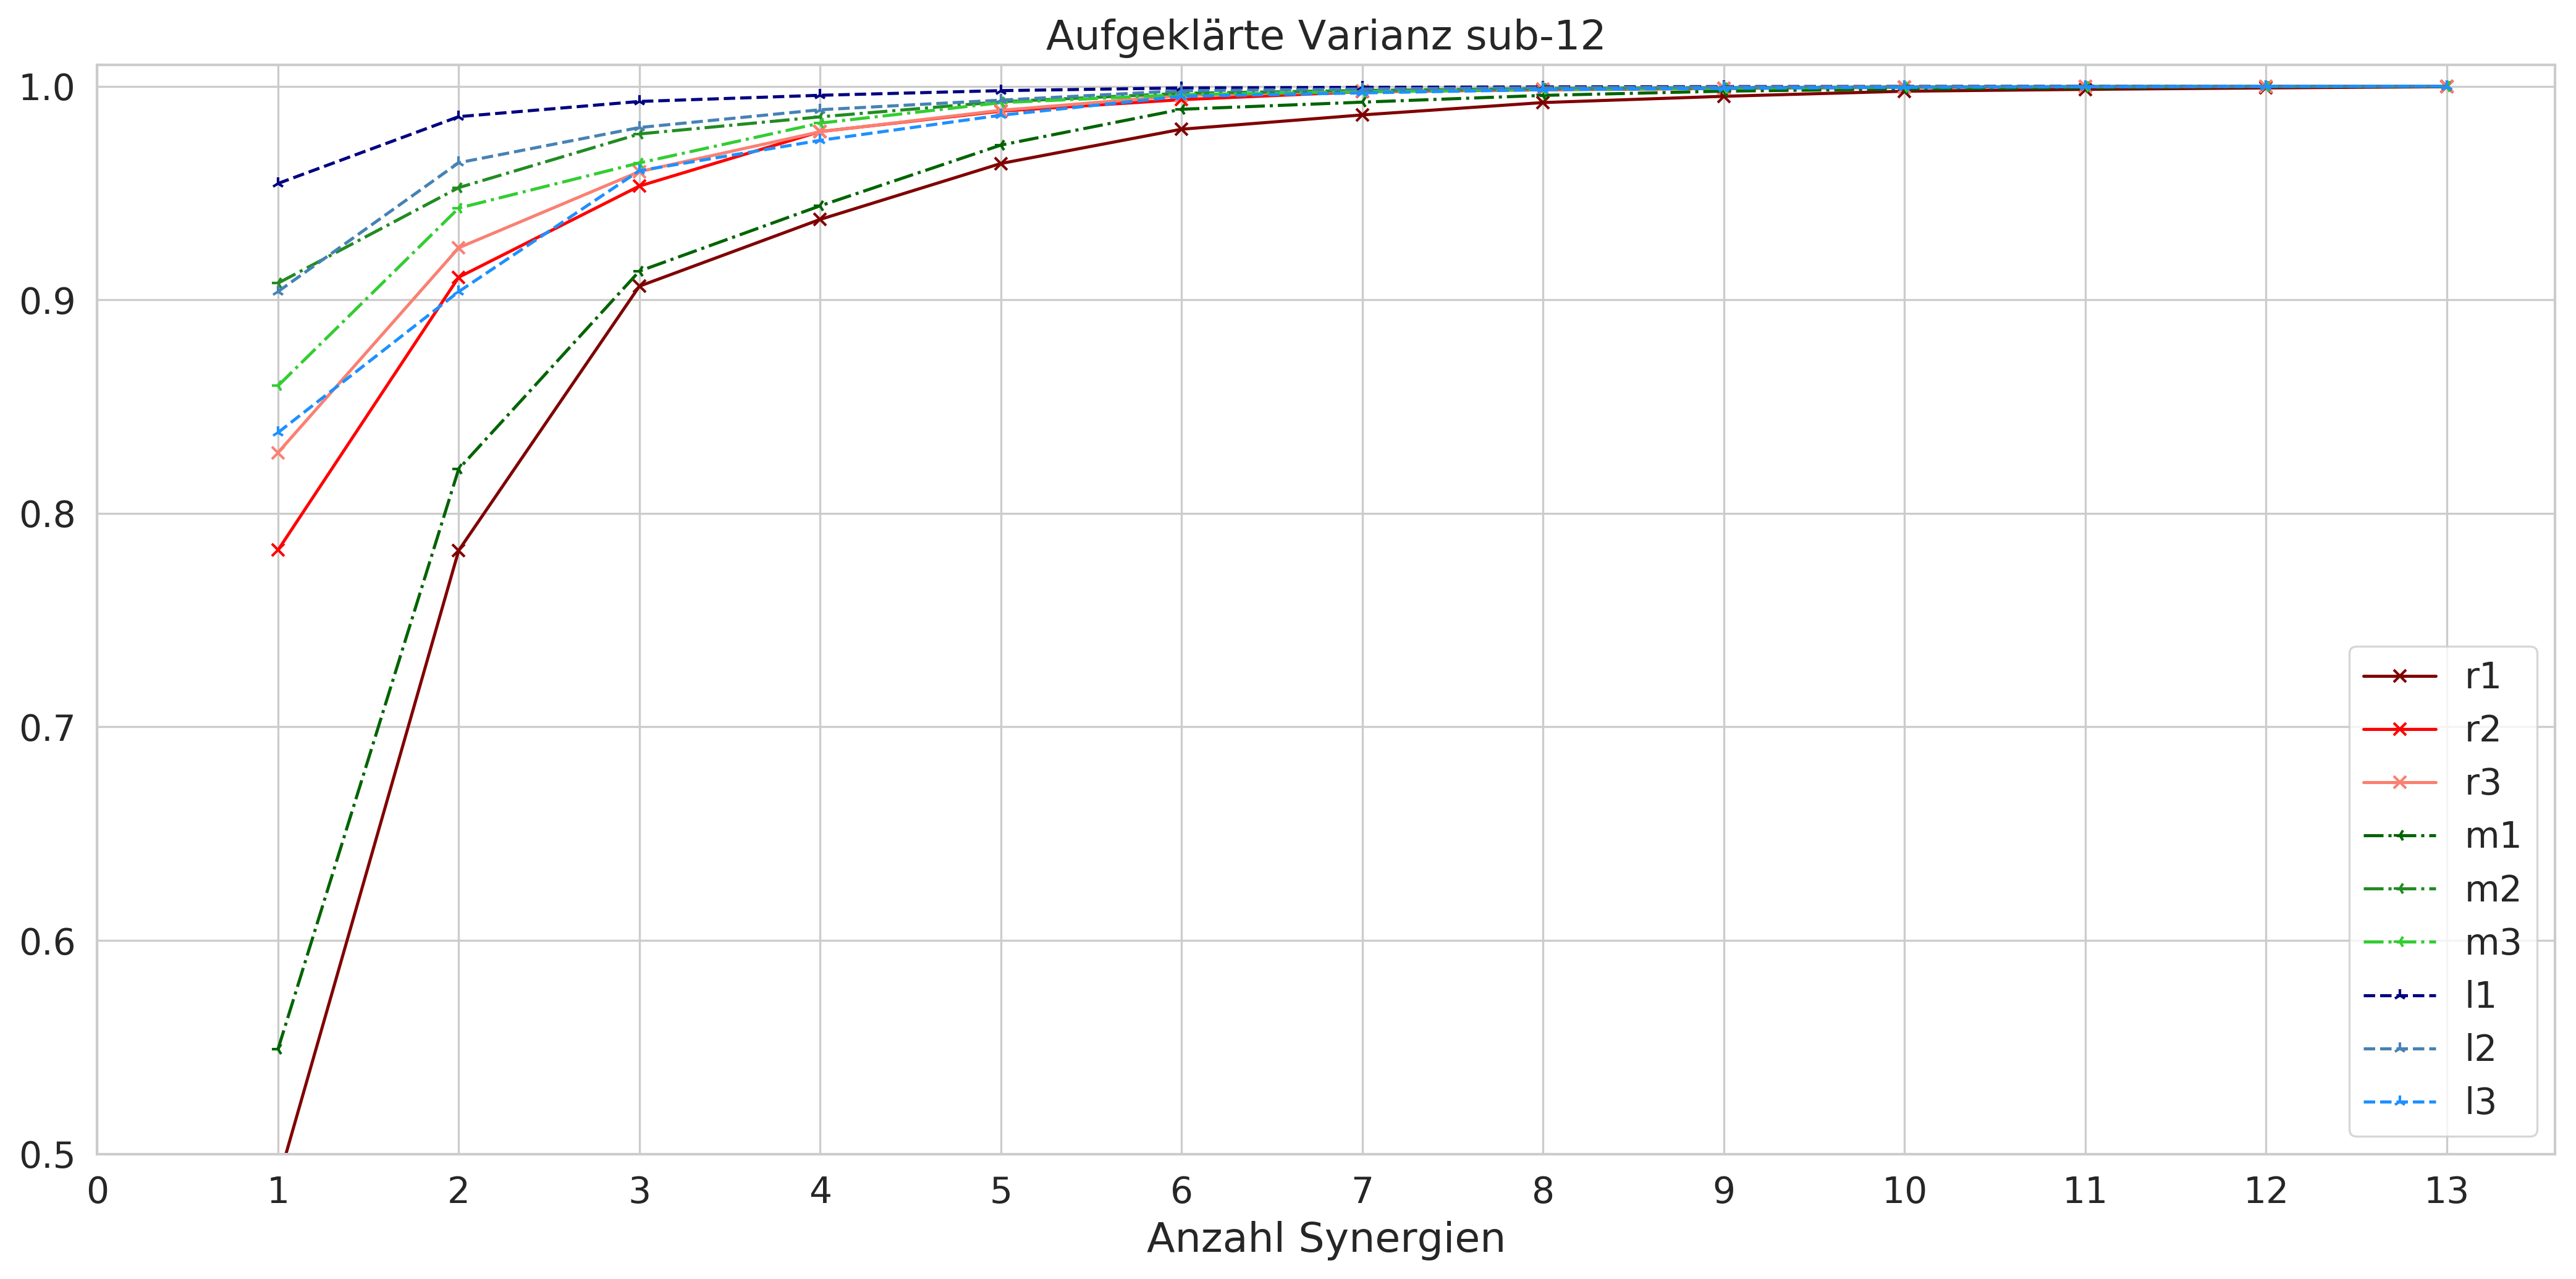

Subject Done!!
sub-04
/home/michael/Desktop/model_evd/1H/sub-04/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


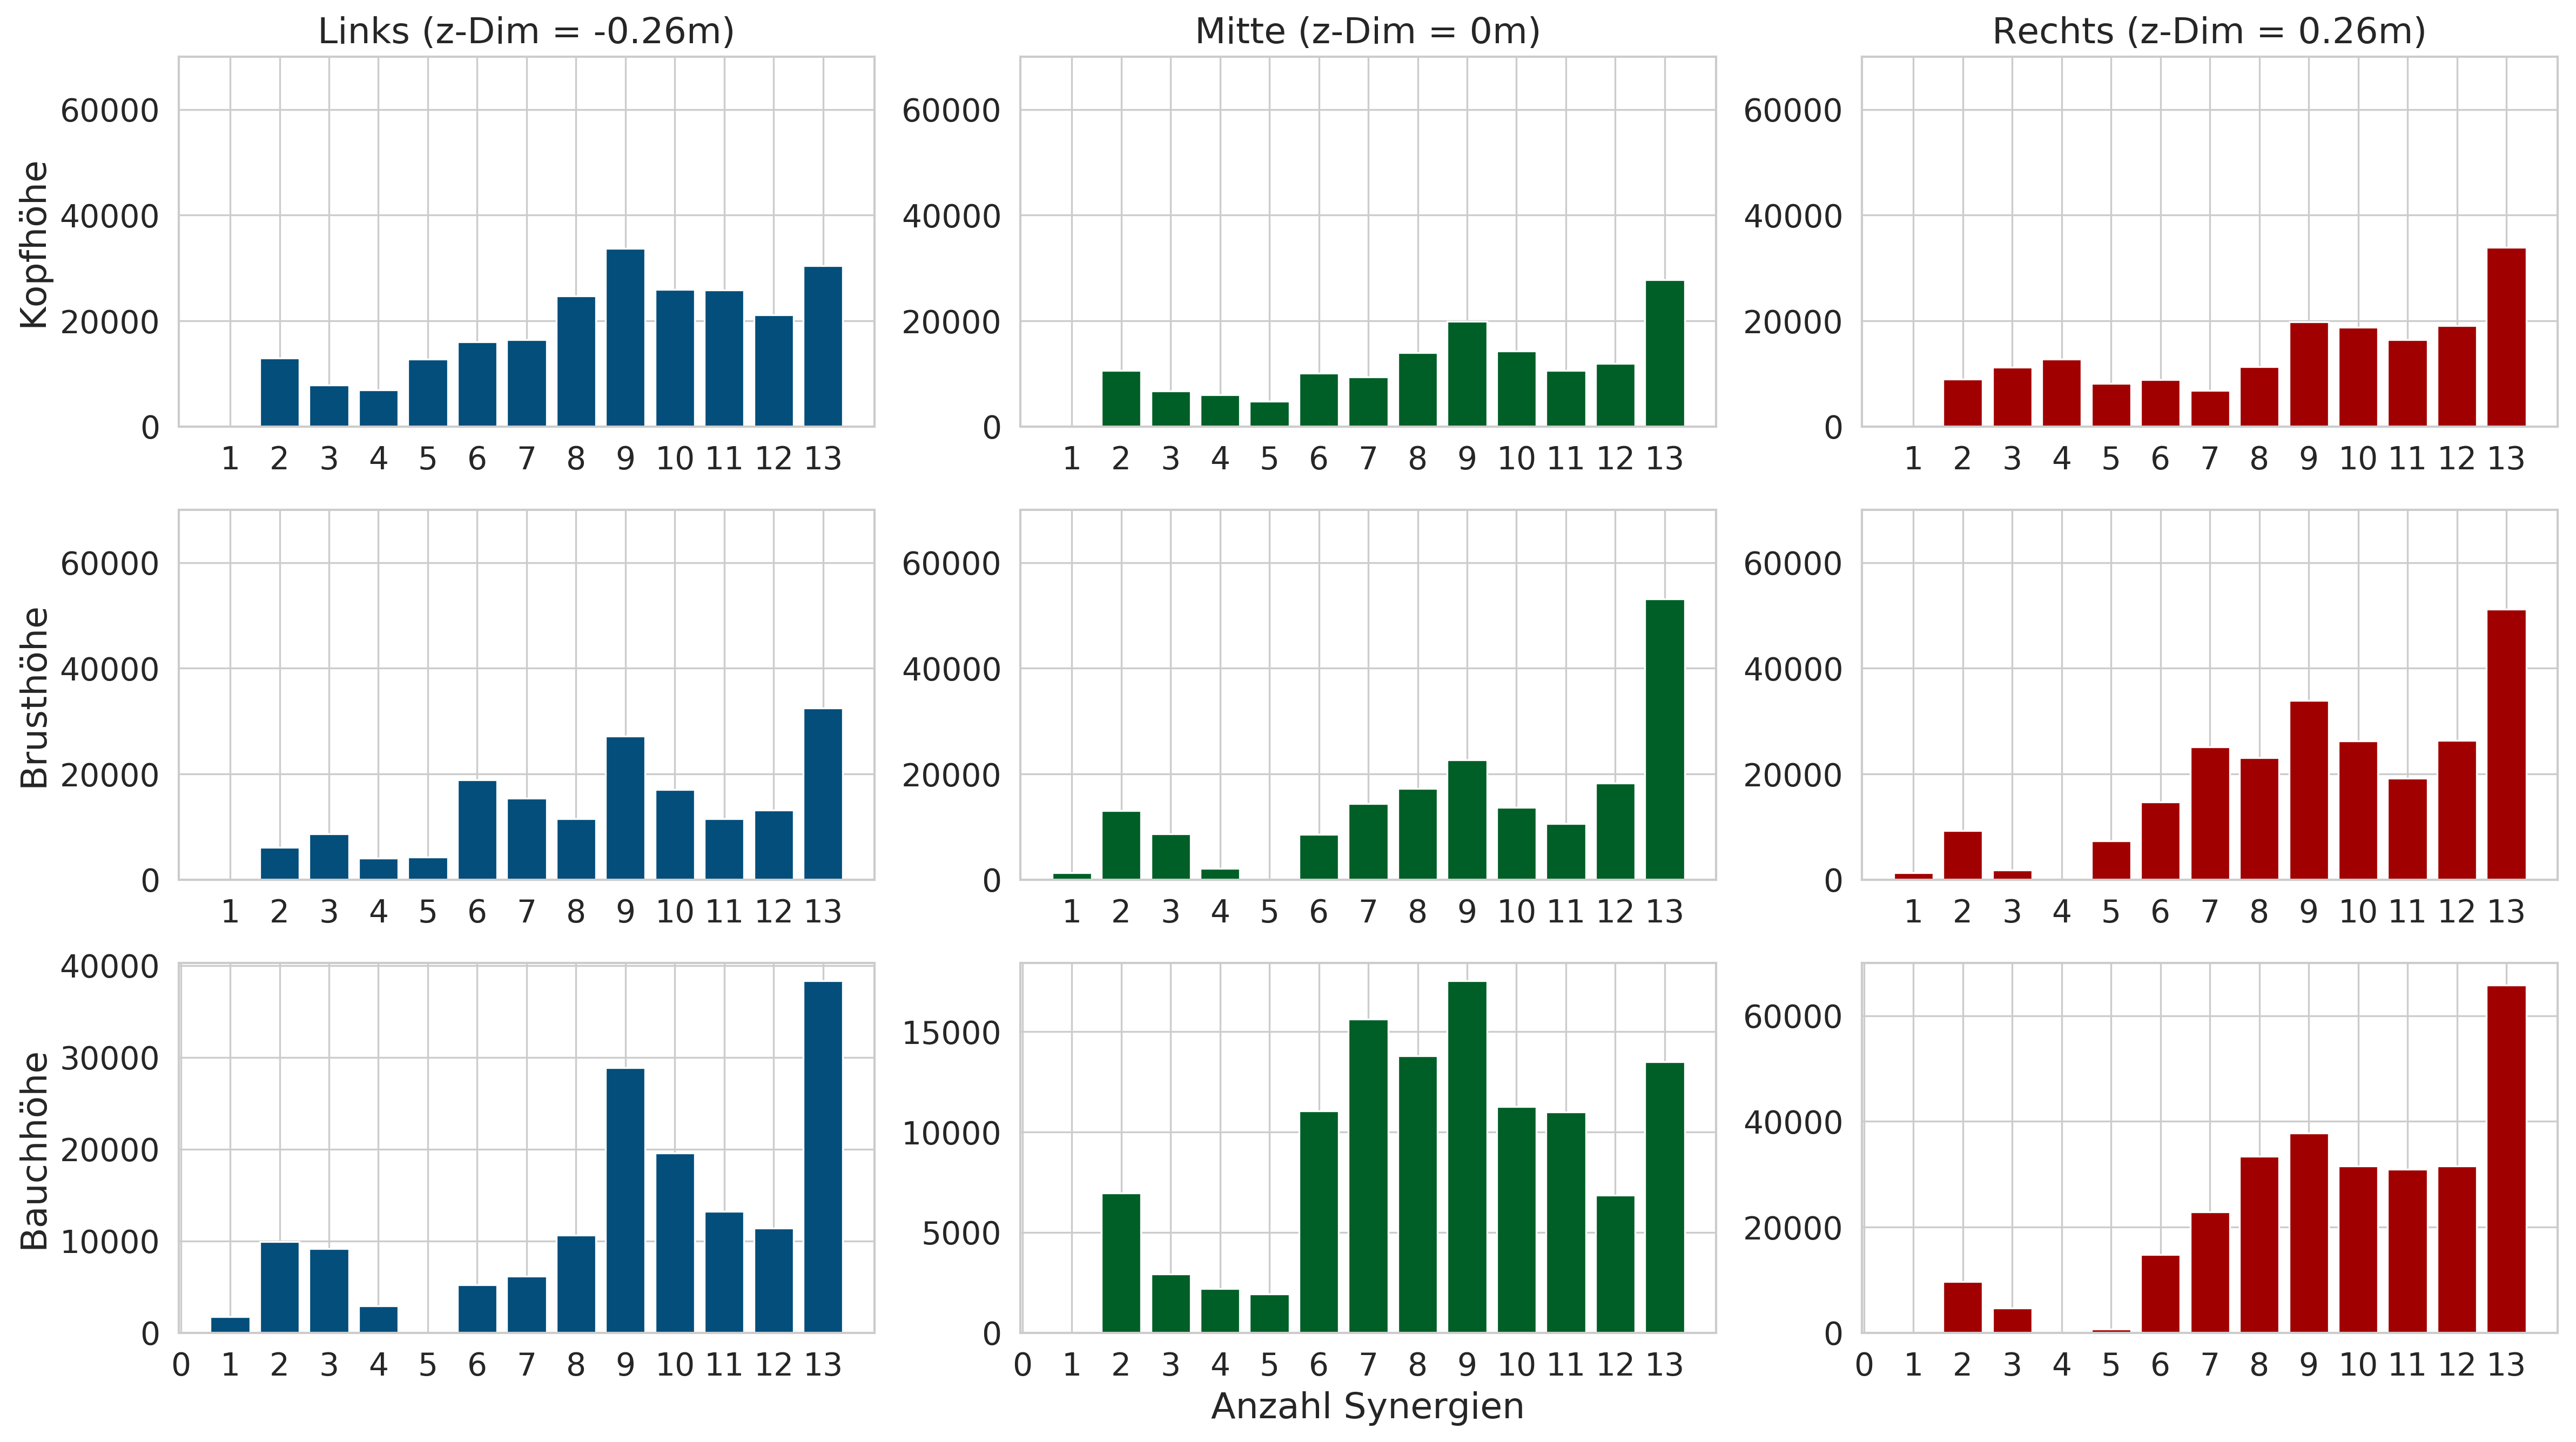

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


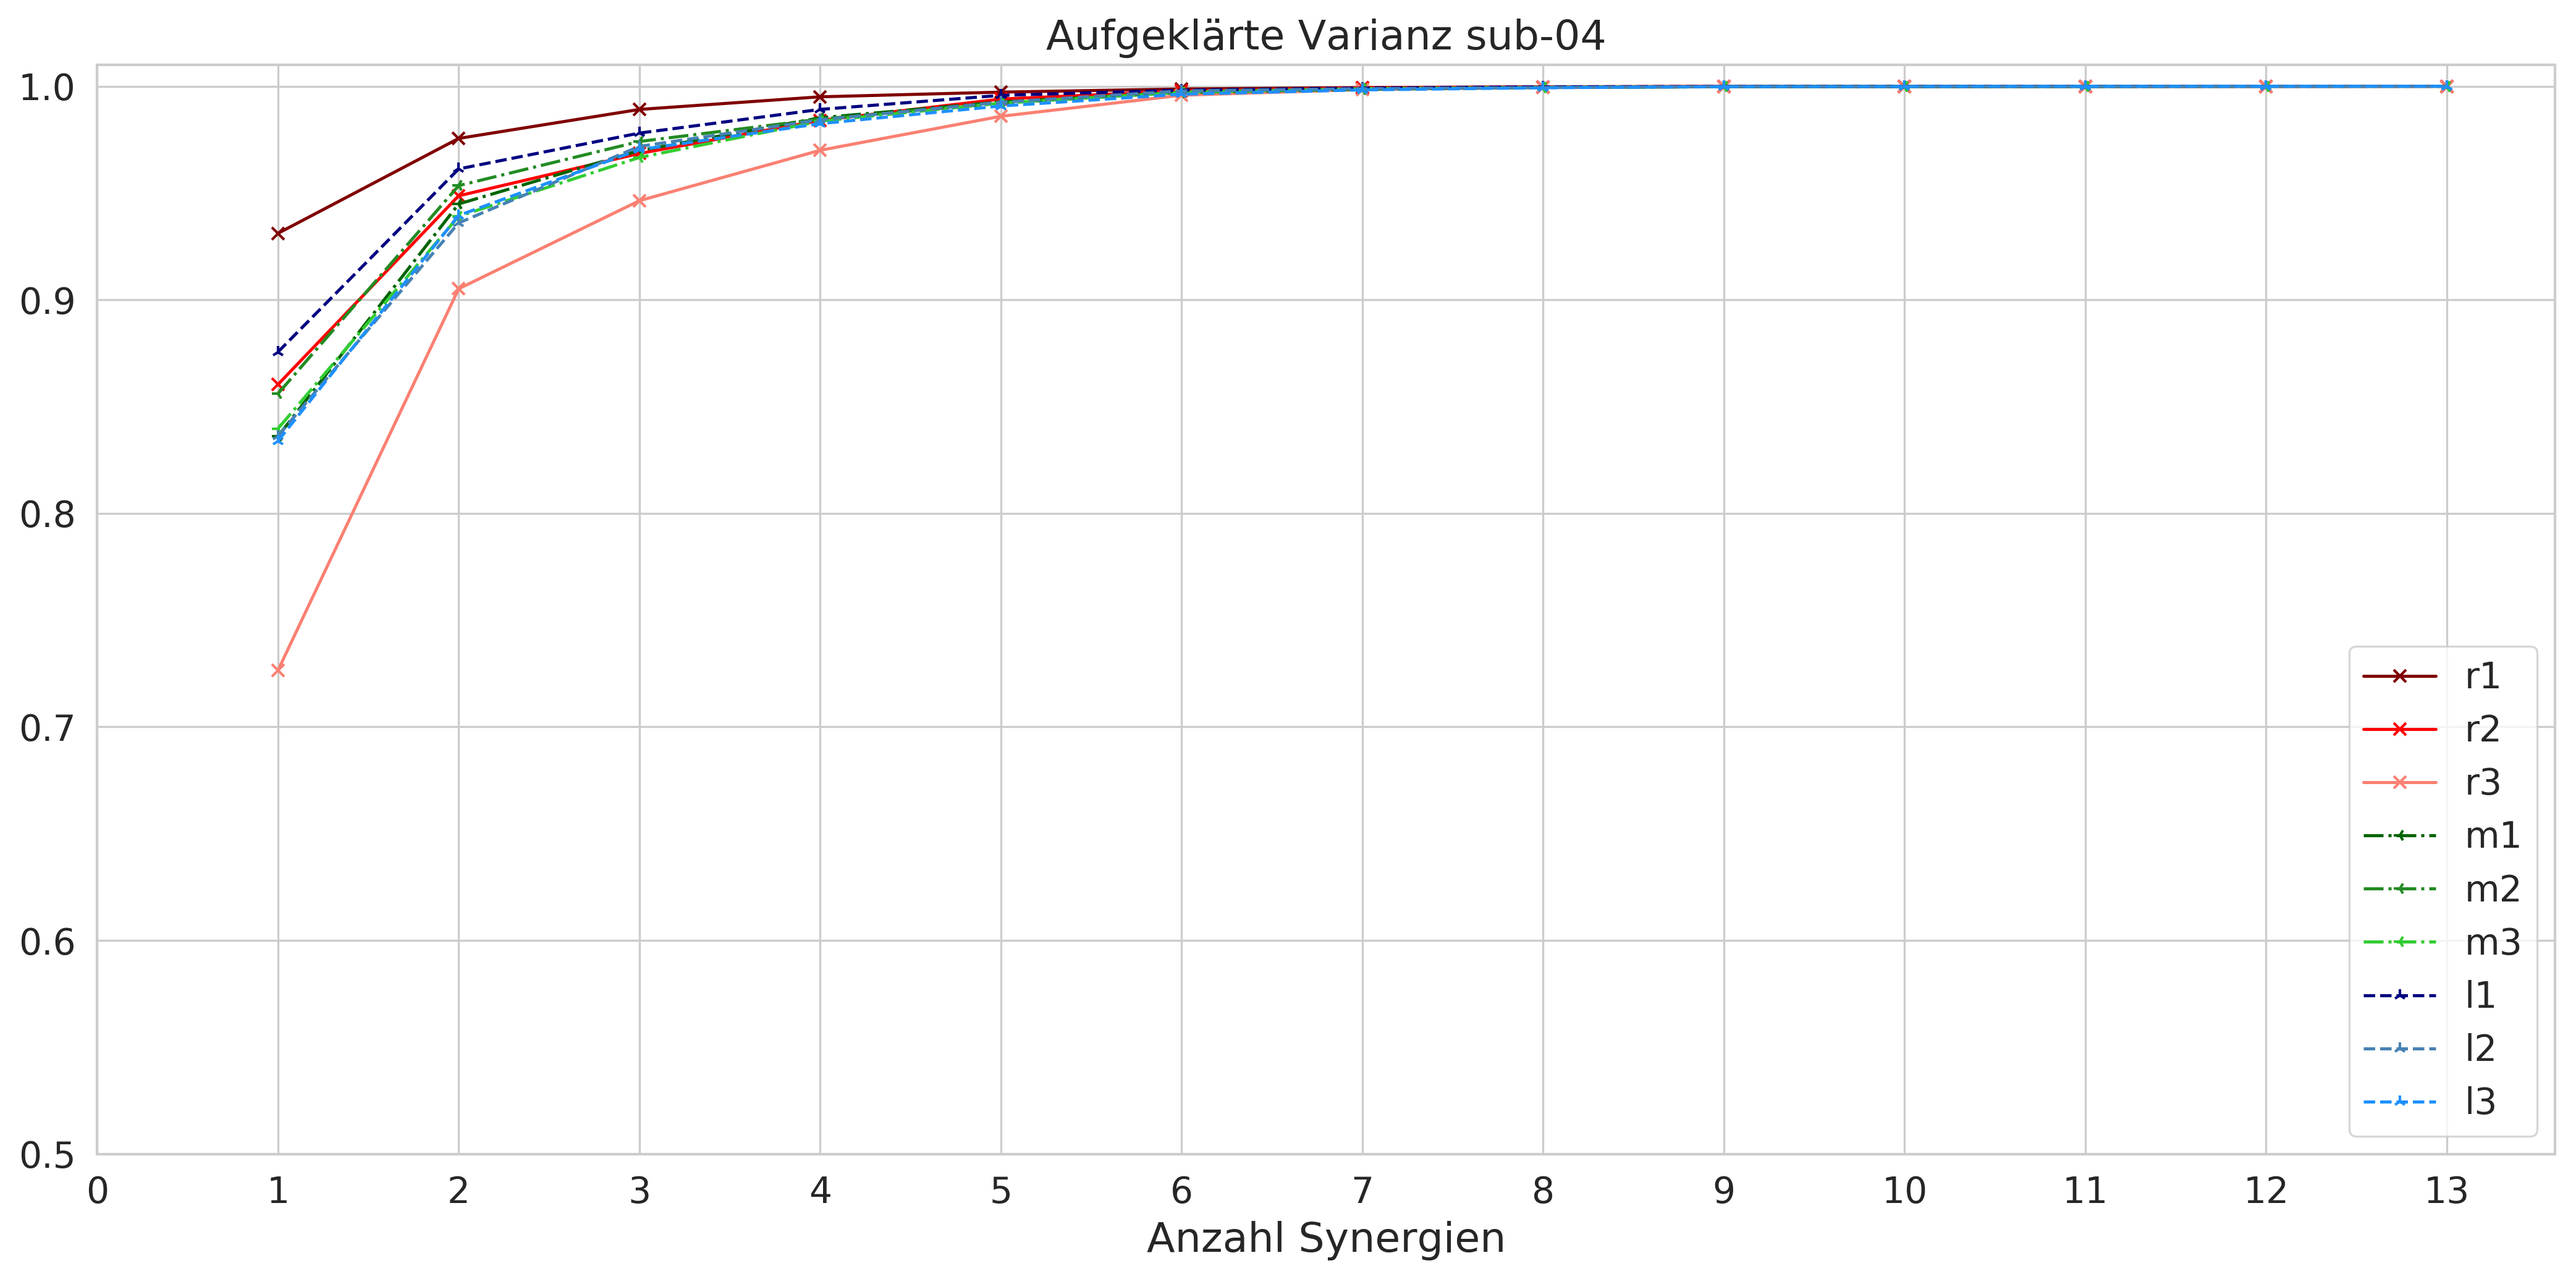

Subject Done!!
sub-09
/home/michael/Desktop/model_evd/1H/sub-09/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


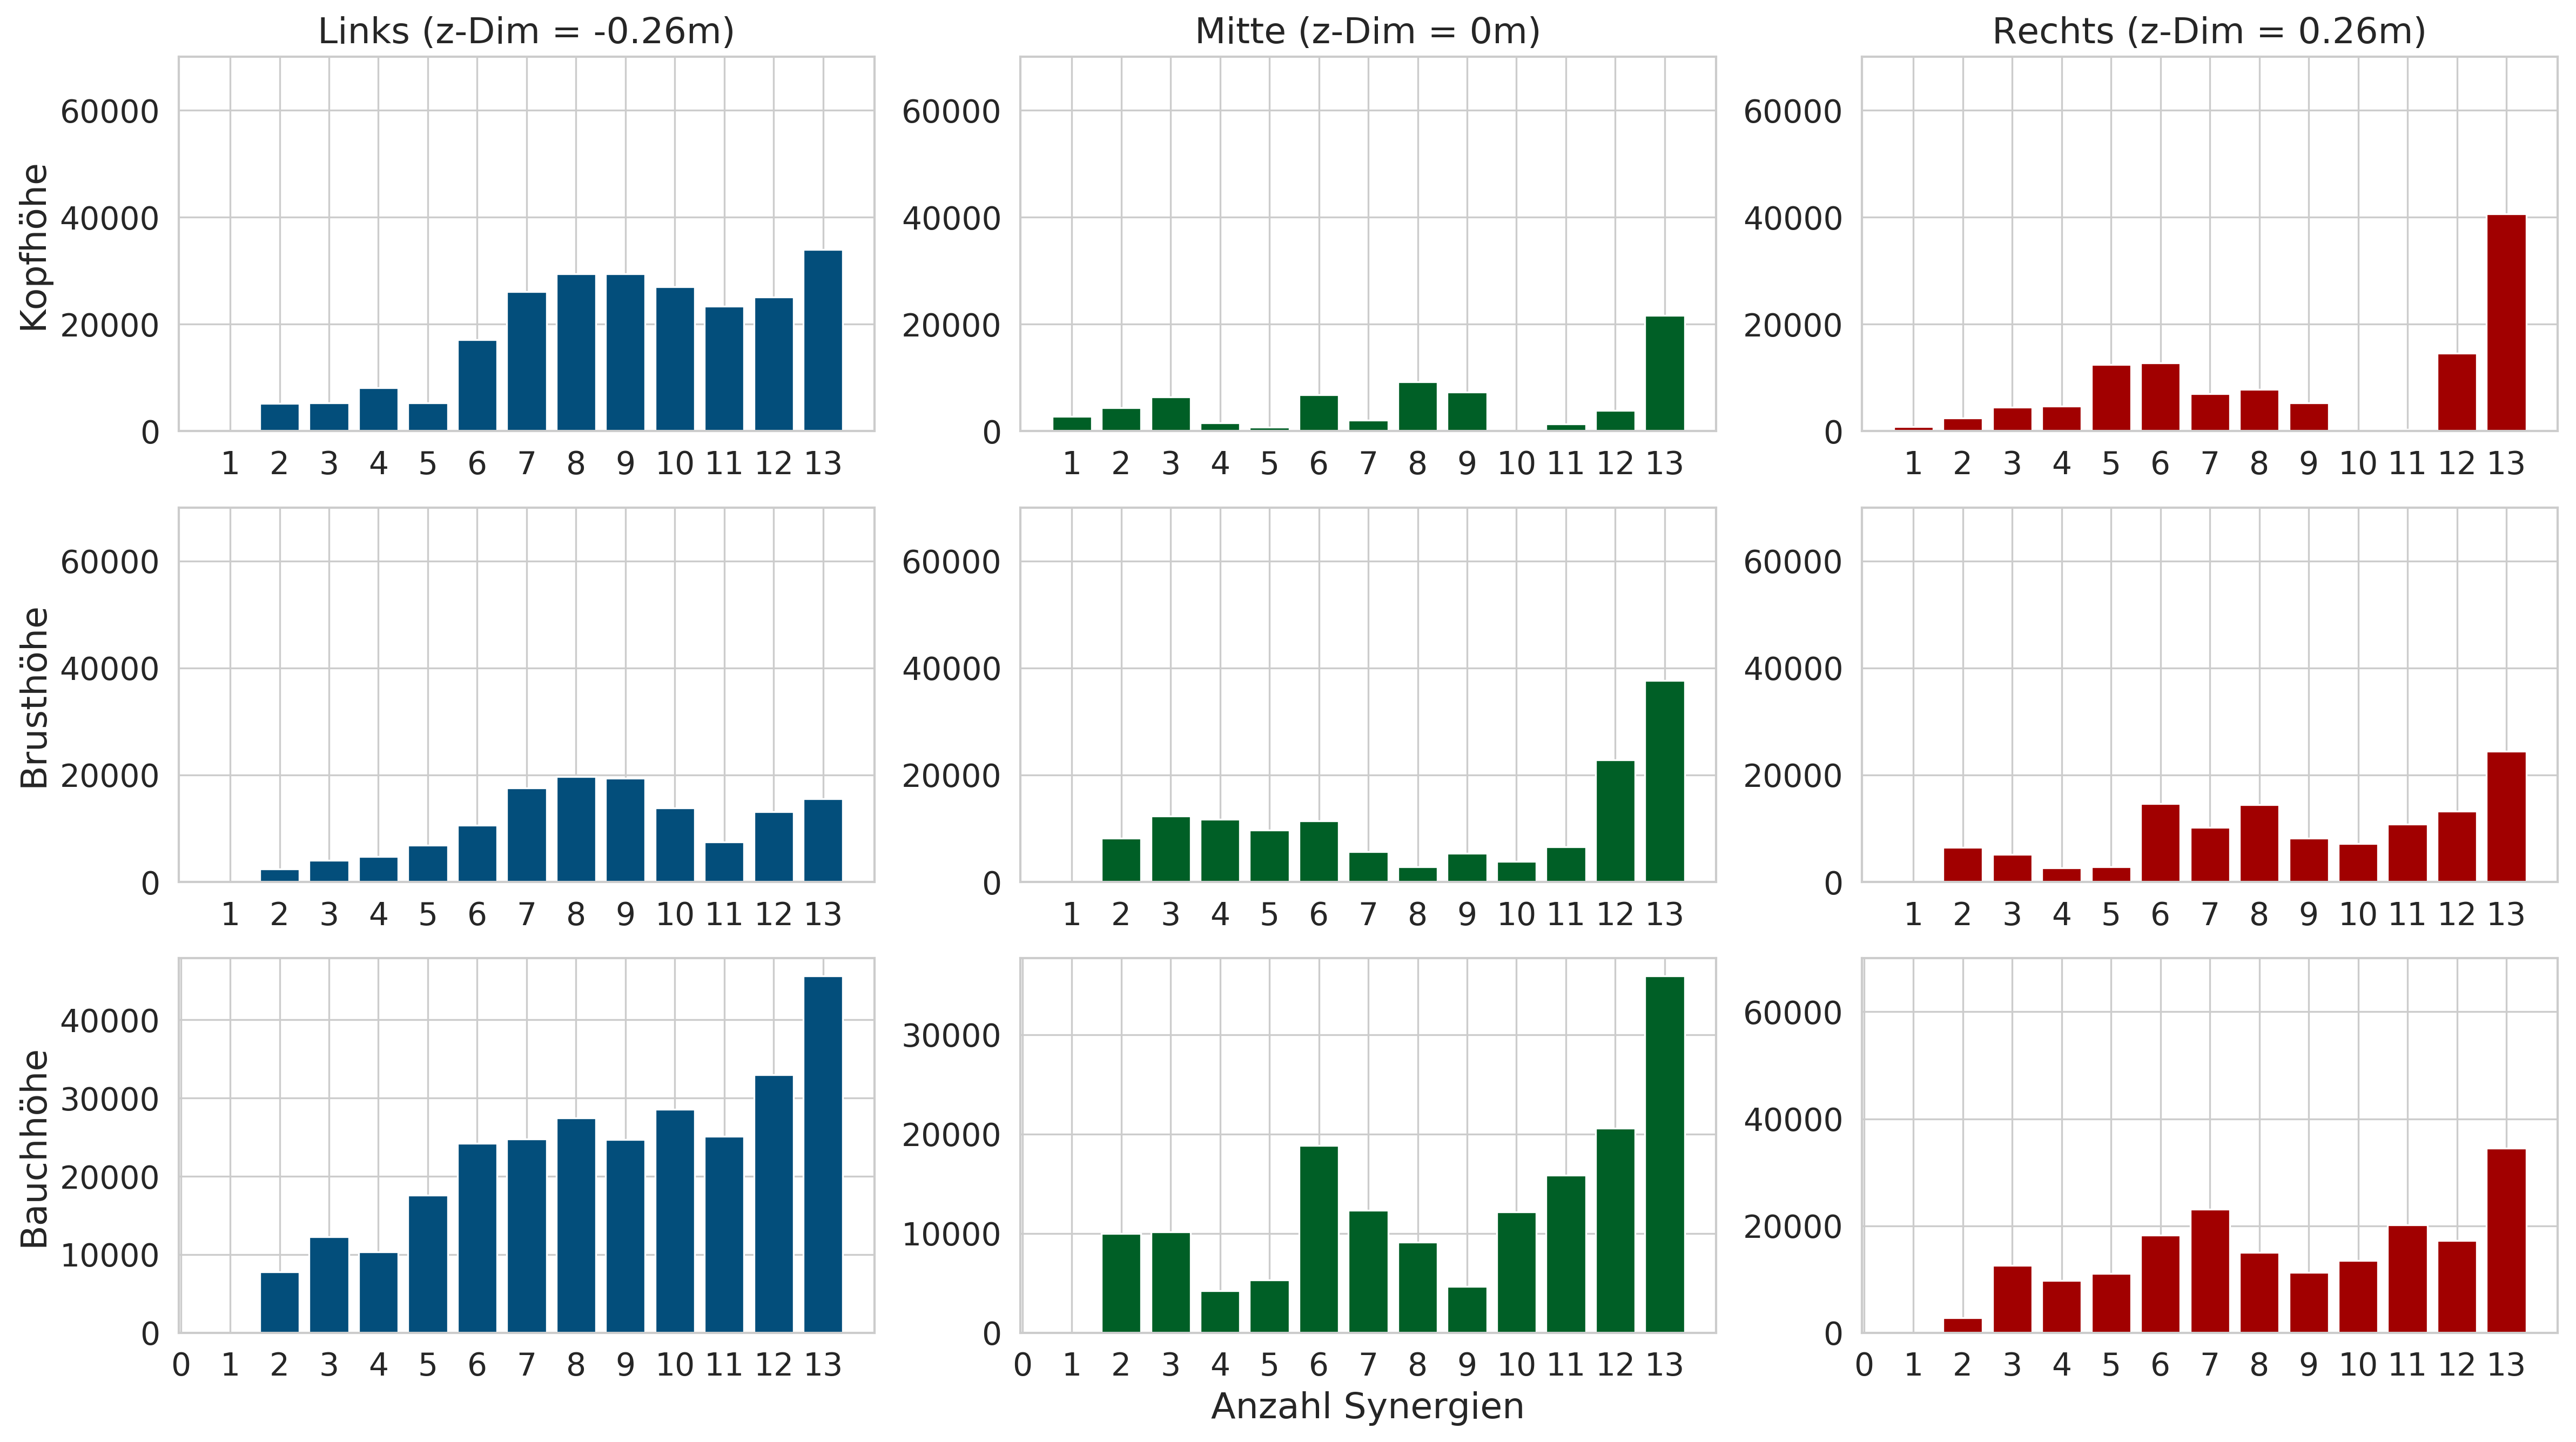

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


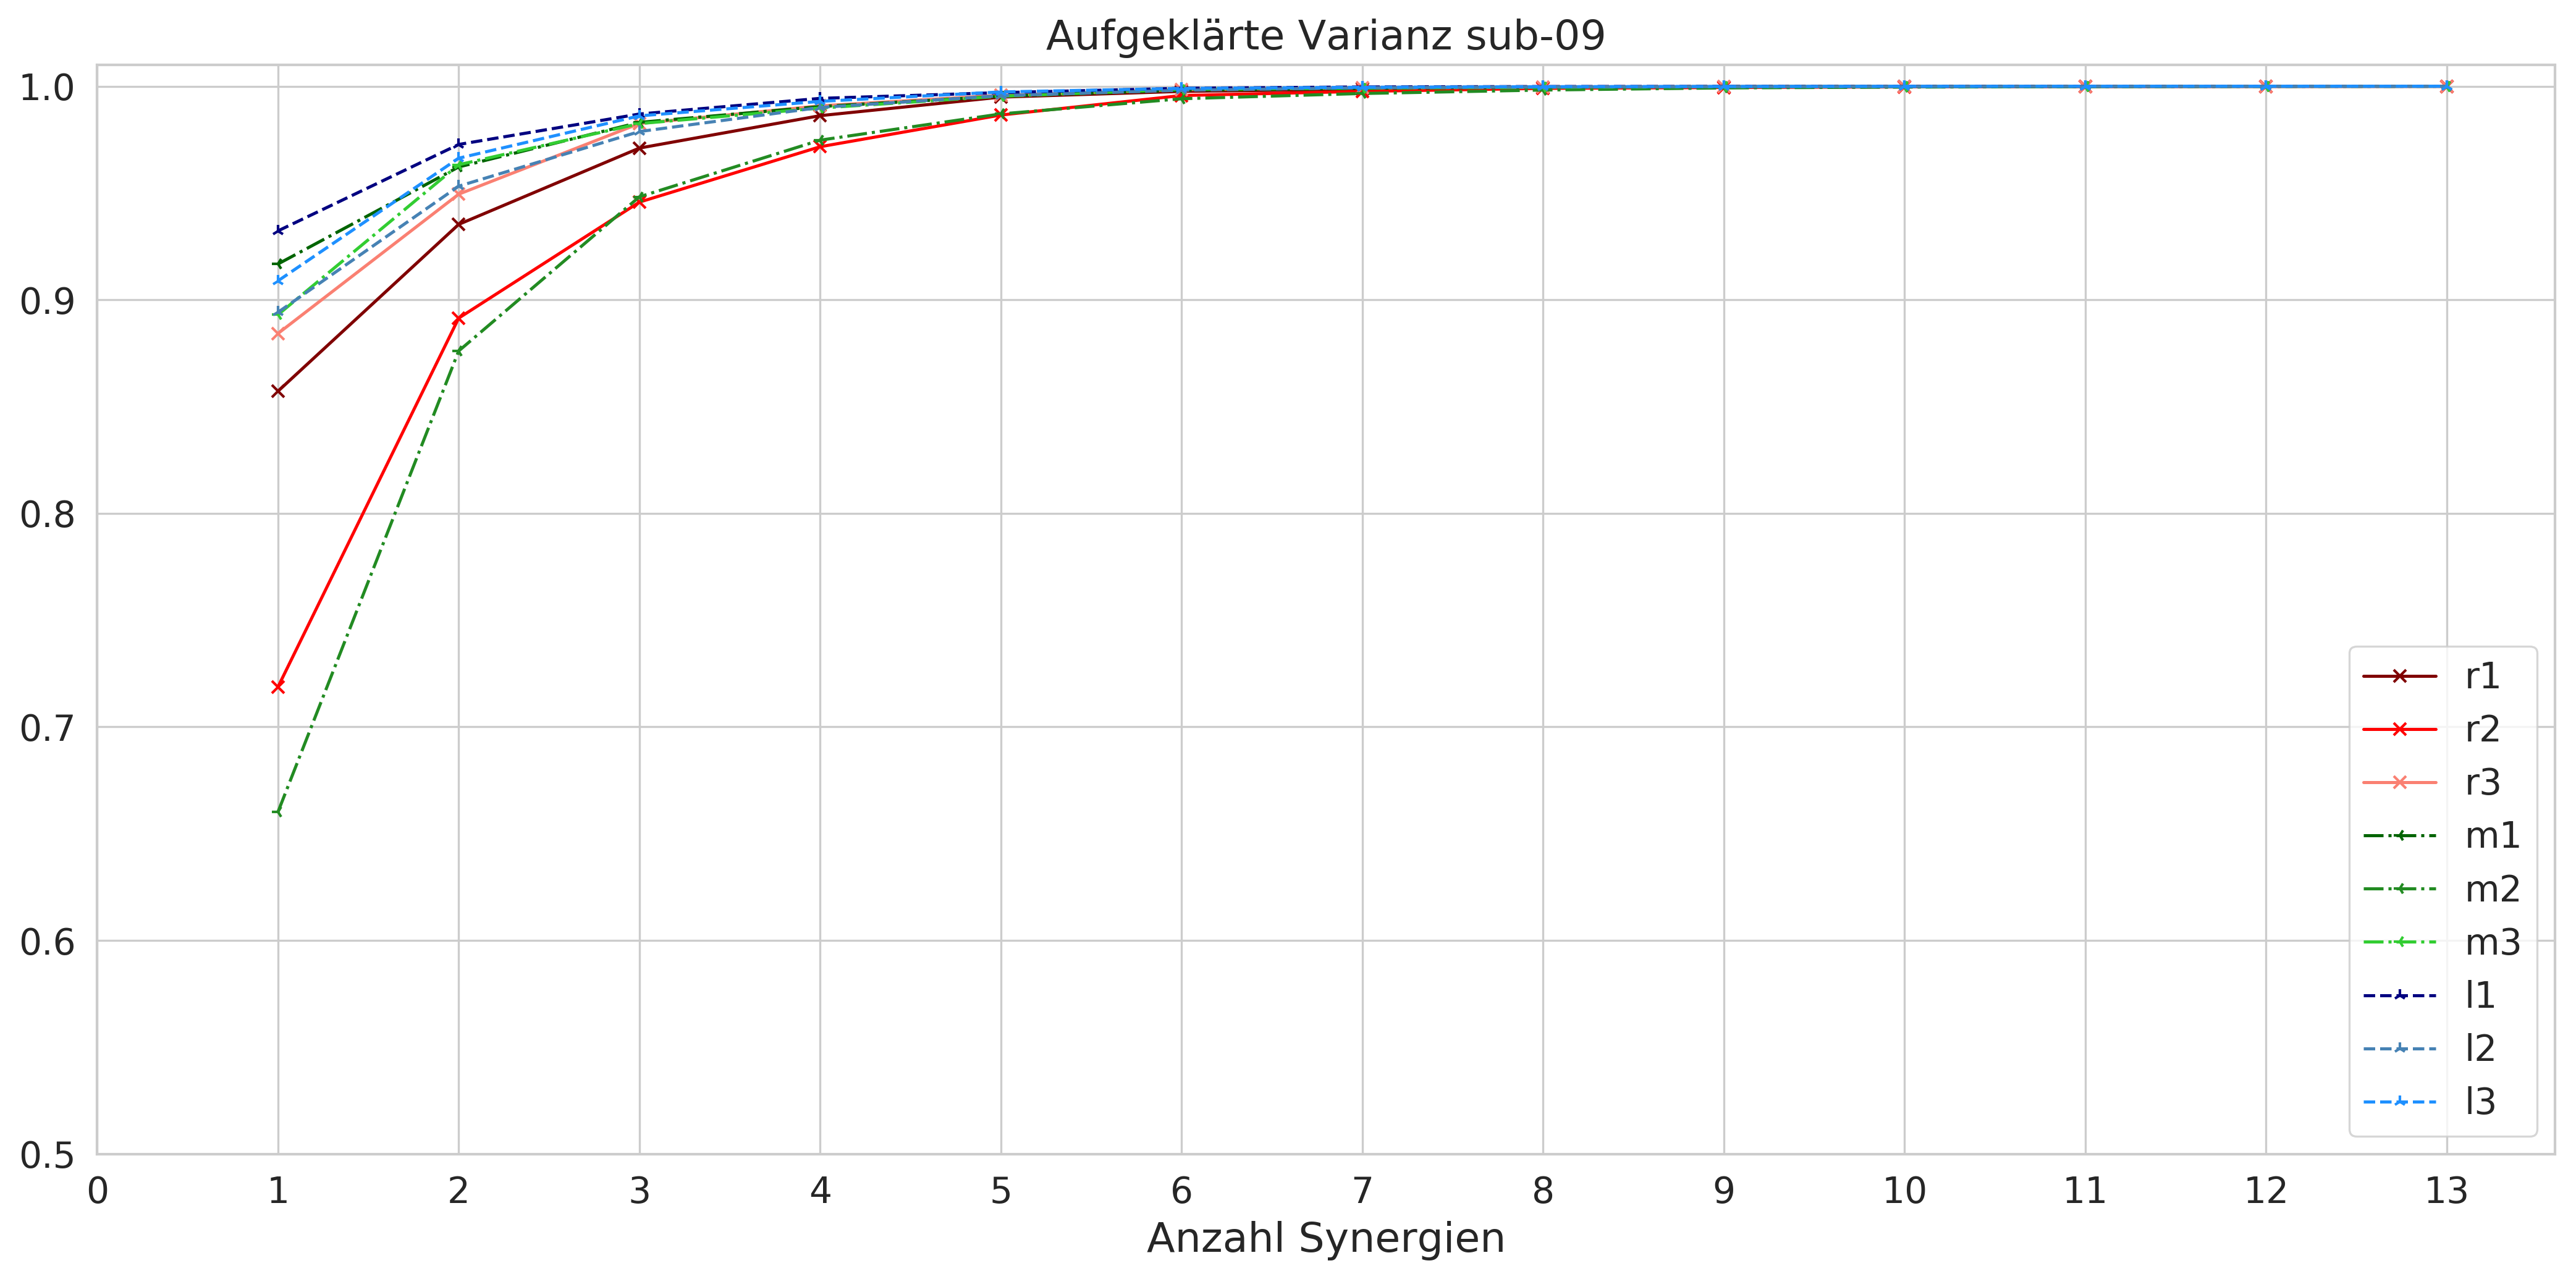

Subject Done!!
sub-03
/home/michael/Desktop/model_evd/1H/sub-03/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


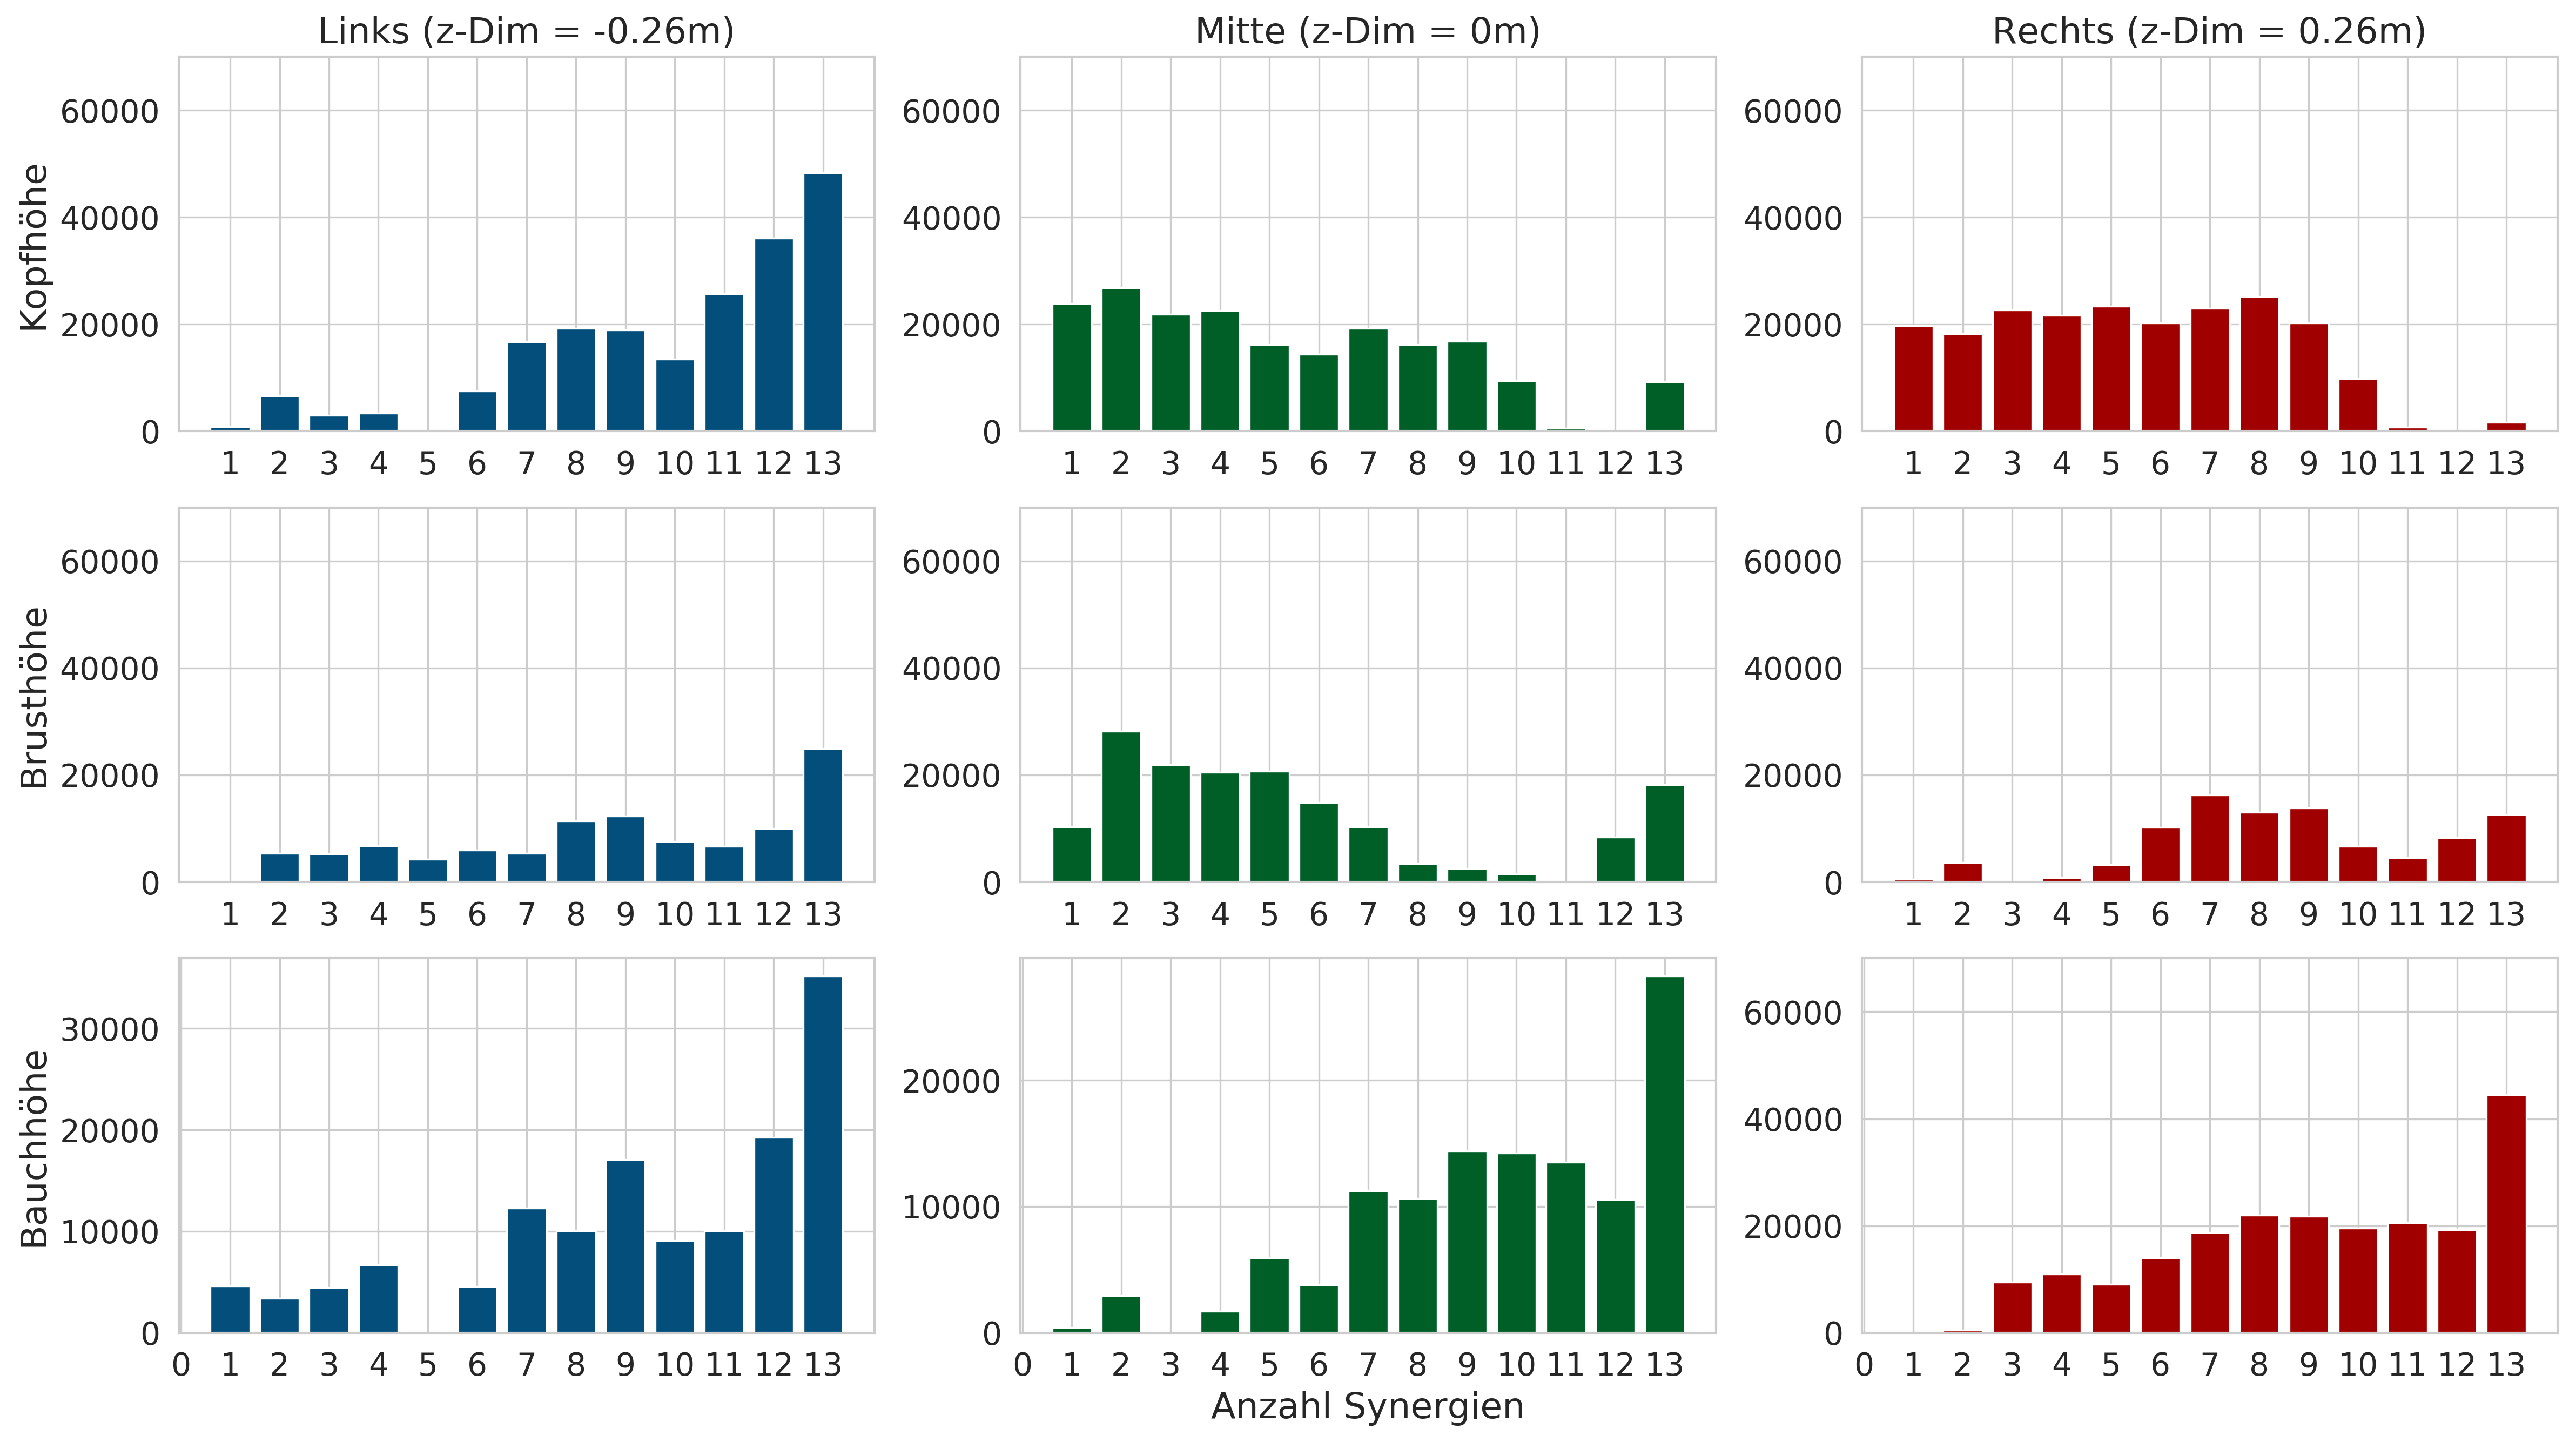

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


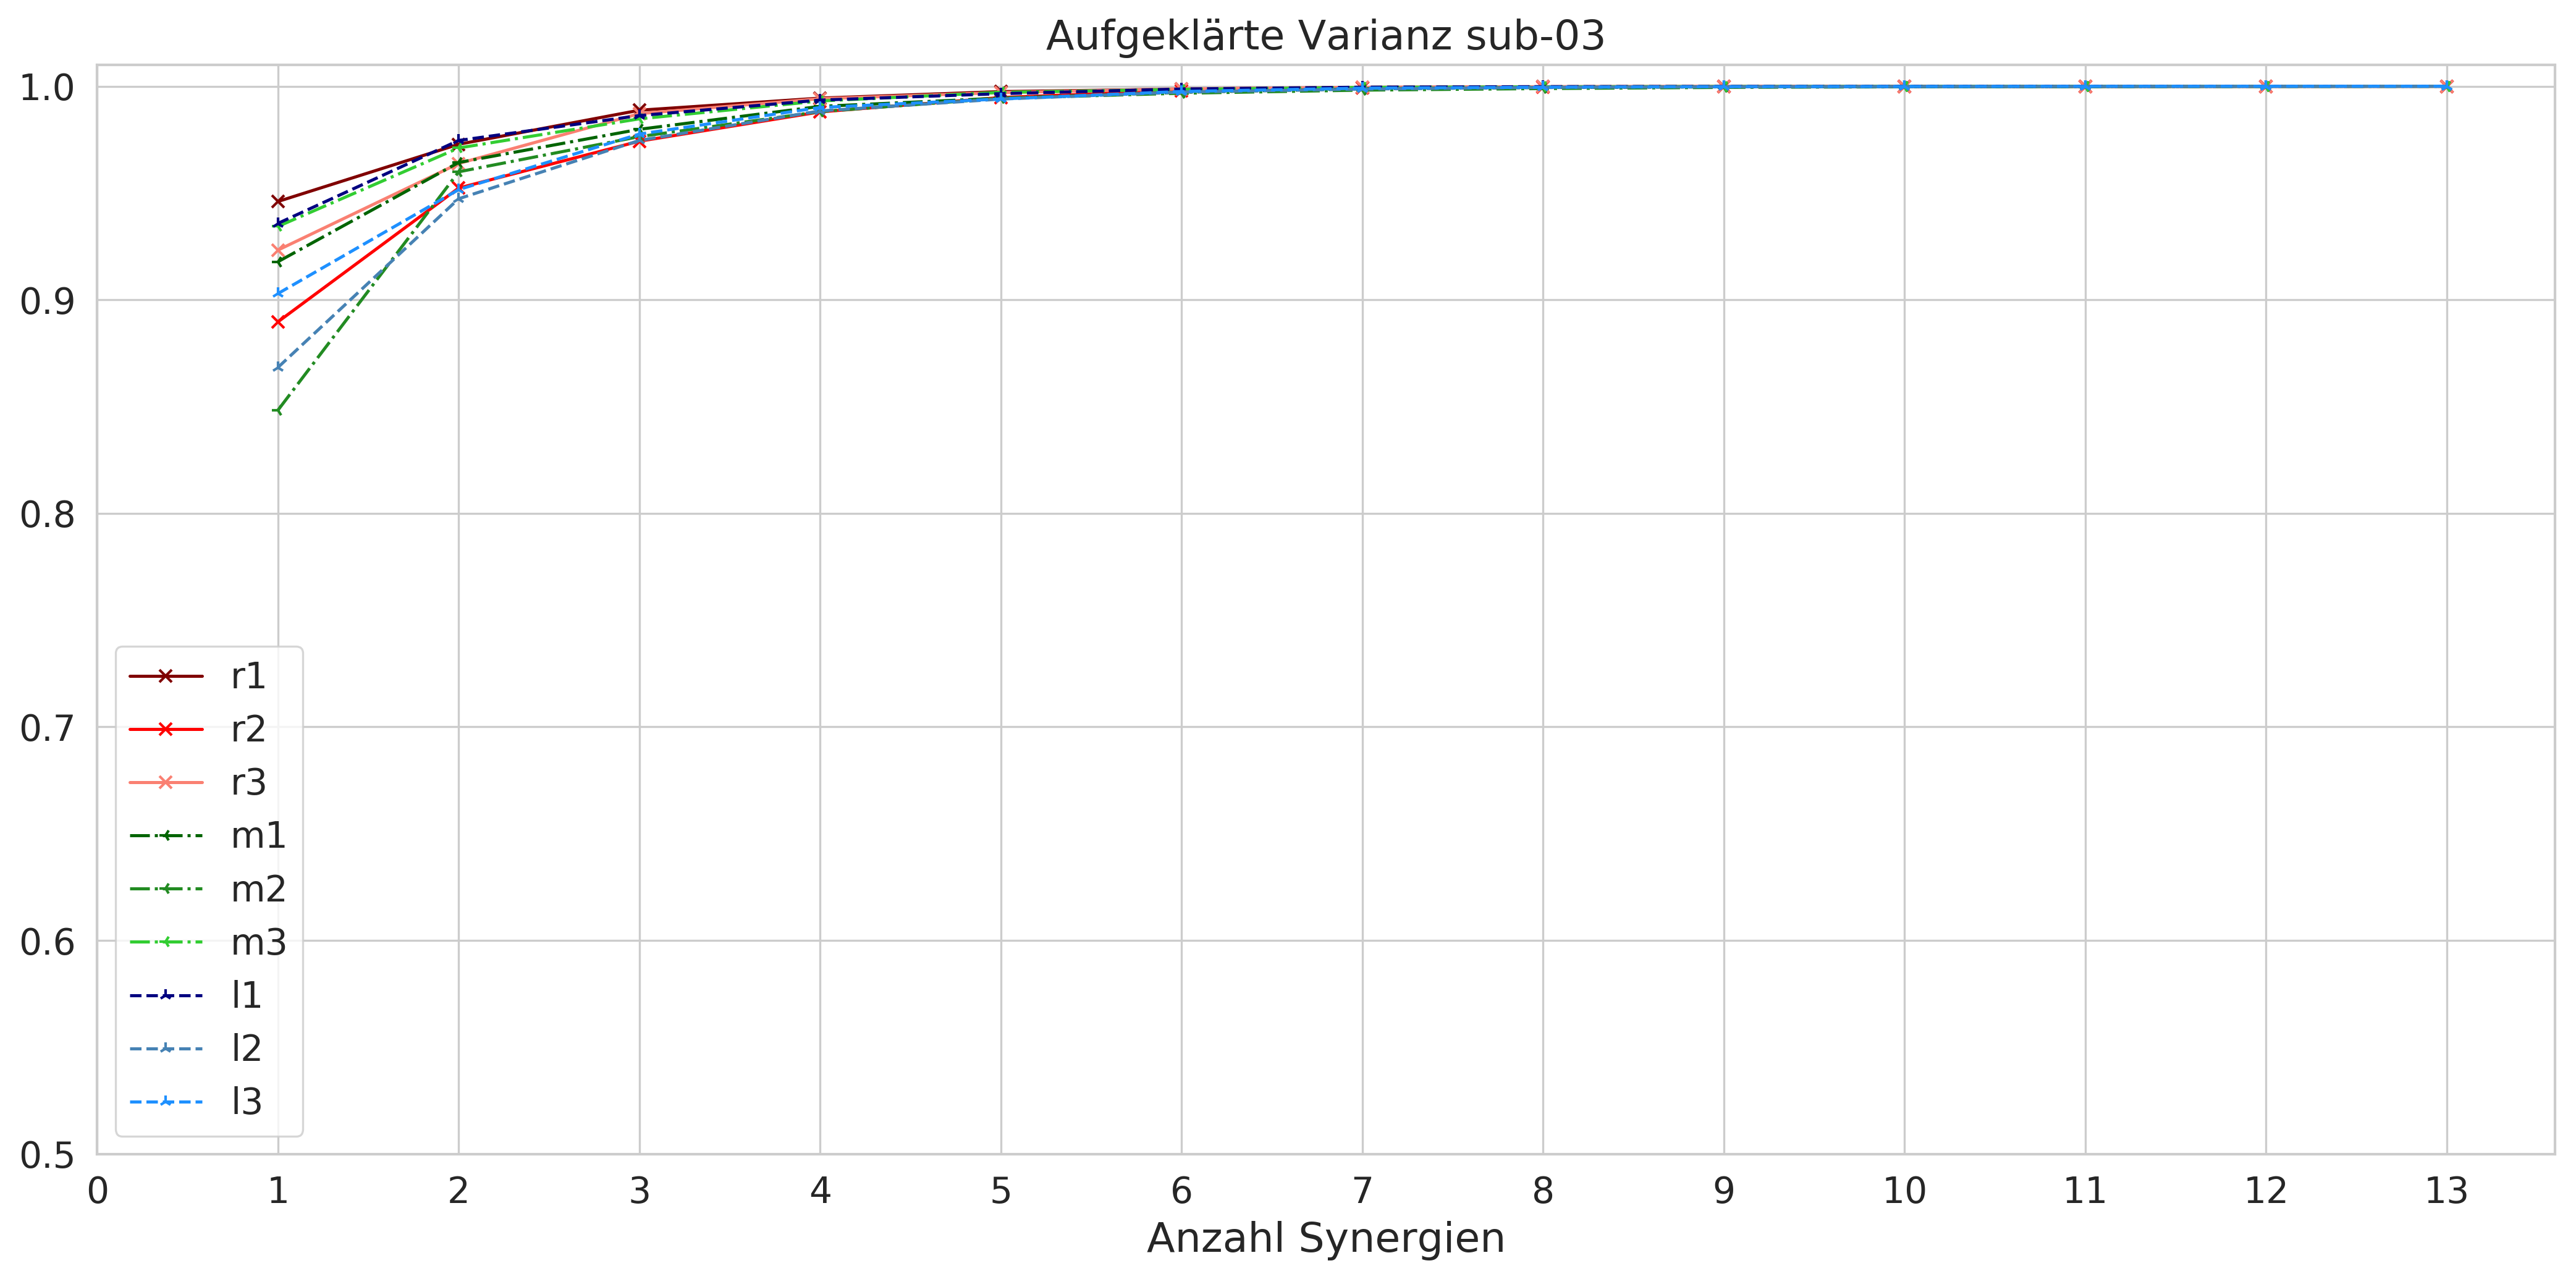

Subject Done!!
group_level
/home/michael/Desktop/model_evd/1H/group_level/sub-07_model_evidences.png
sub-07_model_evidences.png
/home/michael/Desktop/model_evd/1H/group_level/pcs
pcs
/home/michael/Desktop/model_evd/1H/group_level/sub-03_model_evidences.png
sub-03_model_evidences.png
/home/michael/Desktop/model_evd/1H/group_level/sub-01_vafs.png
sub-01_vafs.png
/home/michael/Desktop/model_evd/1H/group_level/sub-02_vafs.png
sub-02_vafs.png
/home/michael/Desktop/model_evd/1H/group_level/vaf
vaf
/home/michael/Desktop/model_evd/1H/group_level/sub-05_vafs.png
sub-05_vafs.png
/home/michael/Desktop/model_evd/1H/group_level/sub-06_model_evidences.png
sub-06_model_evidences.png
/home/michael/Desktop/model_evd/1H/group_level/sub-05_model_evidences.png
sub-05_model_evidences.png
/home/michael/Desktop/model_evd/1H/group_level/sub-04_model_evidences.png
sub-04_model_evidences.png
/home/michael/Desktop/model_evd/1H/group_level/sub-11_model_evidences.png
sub-11_model_evidences.png
/home/michael/Deskto

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


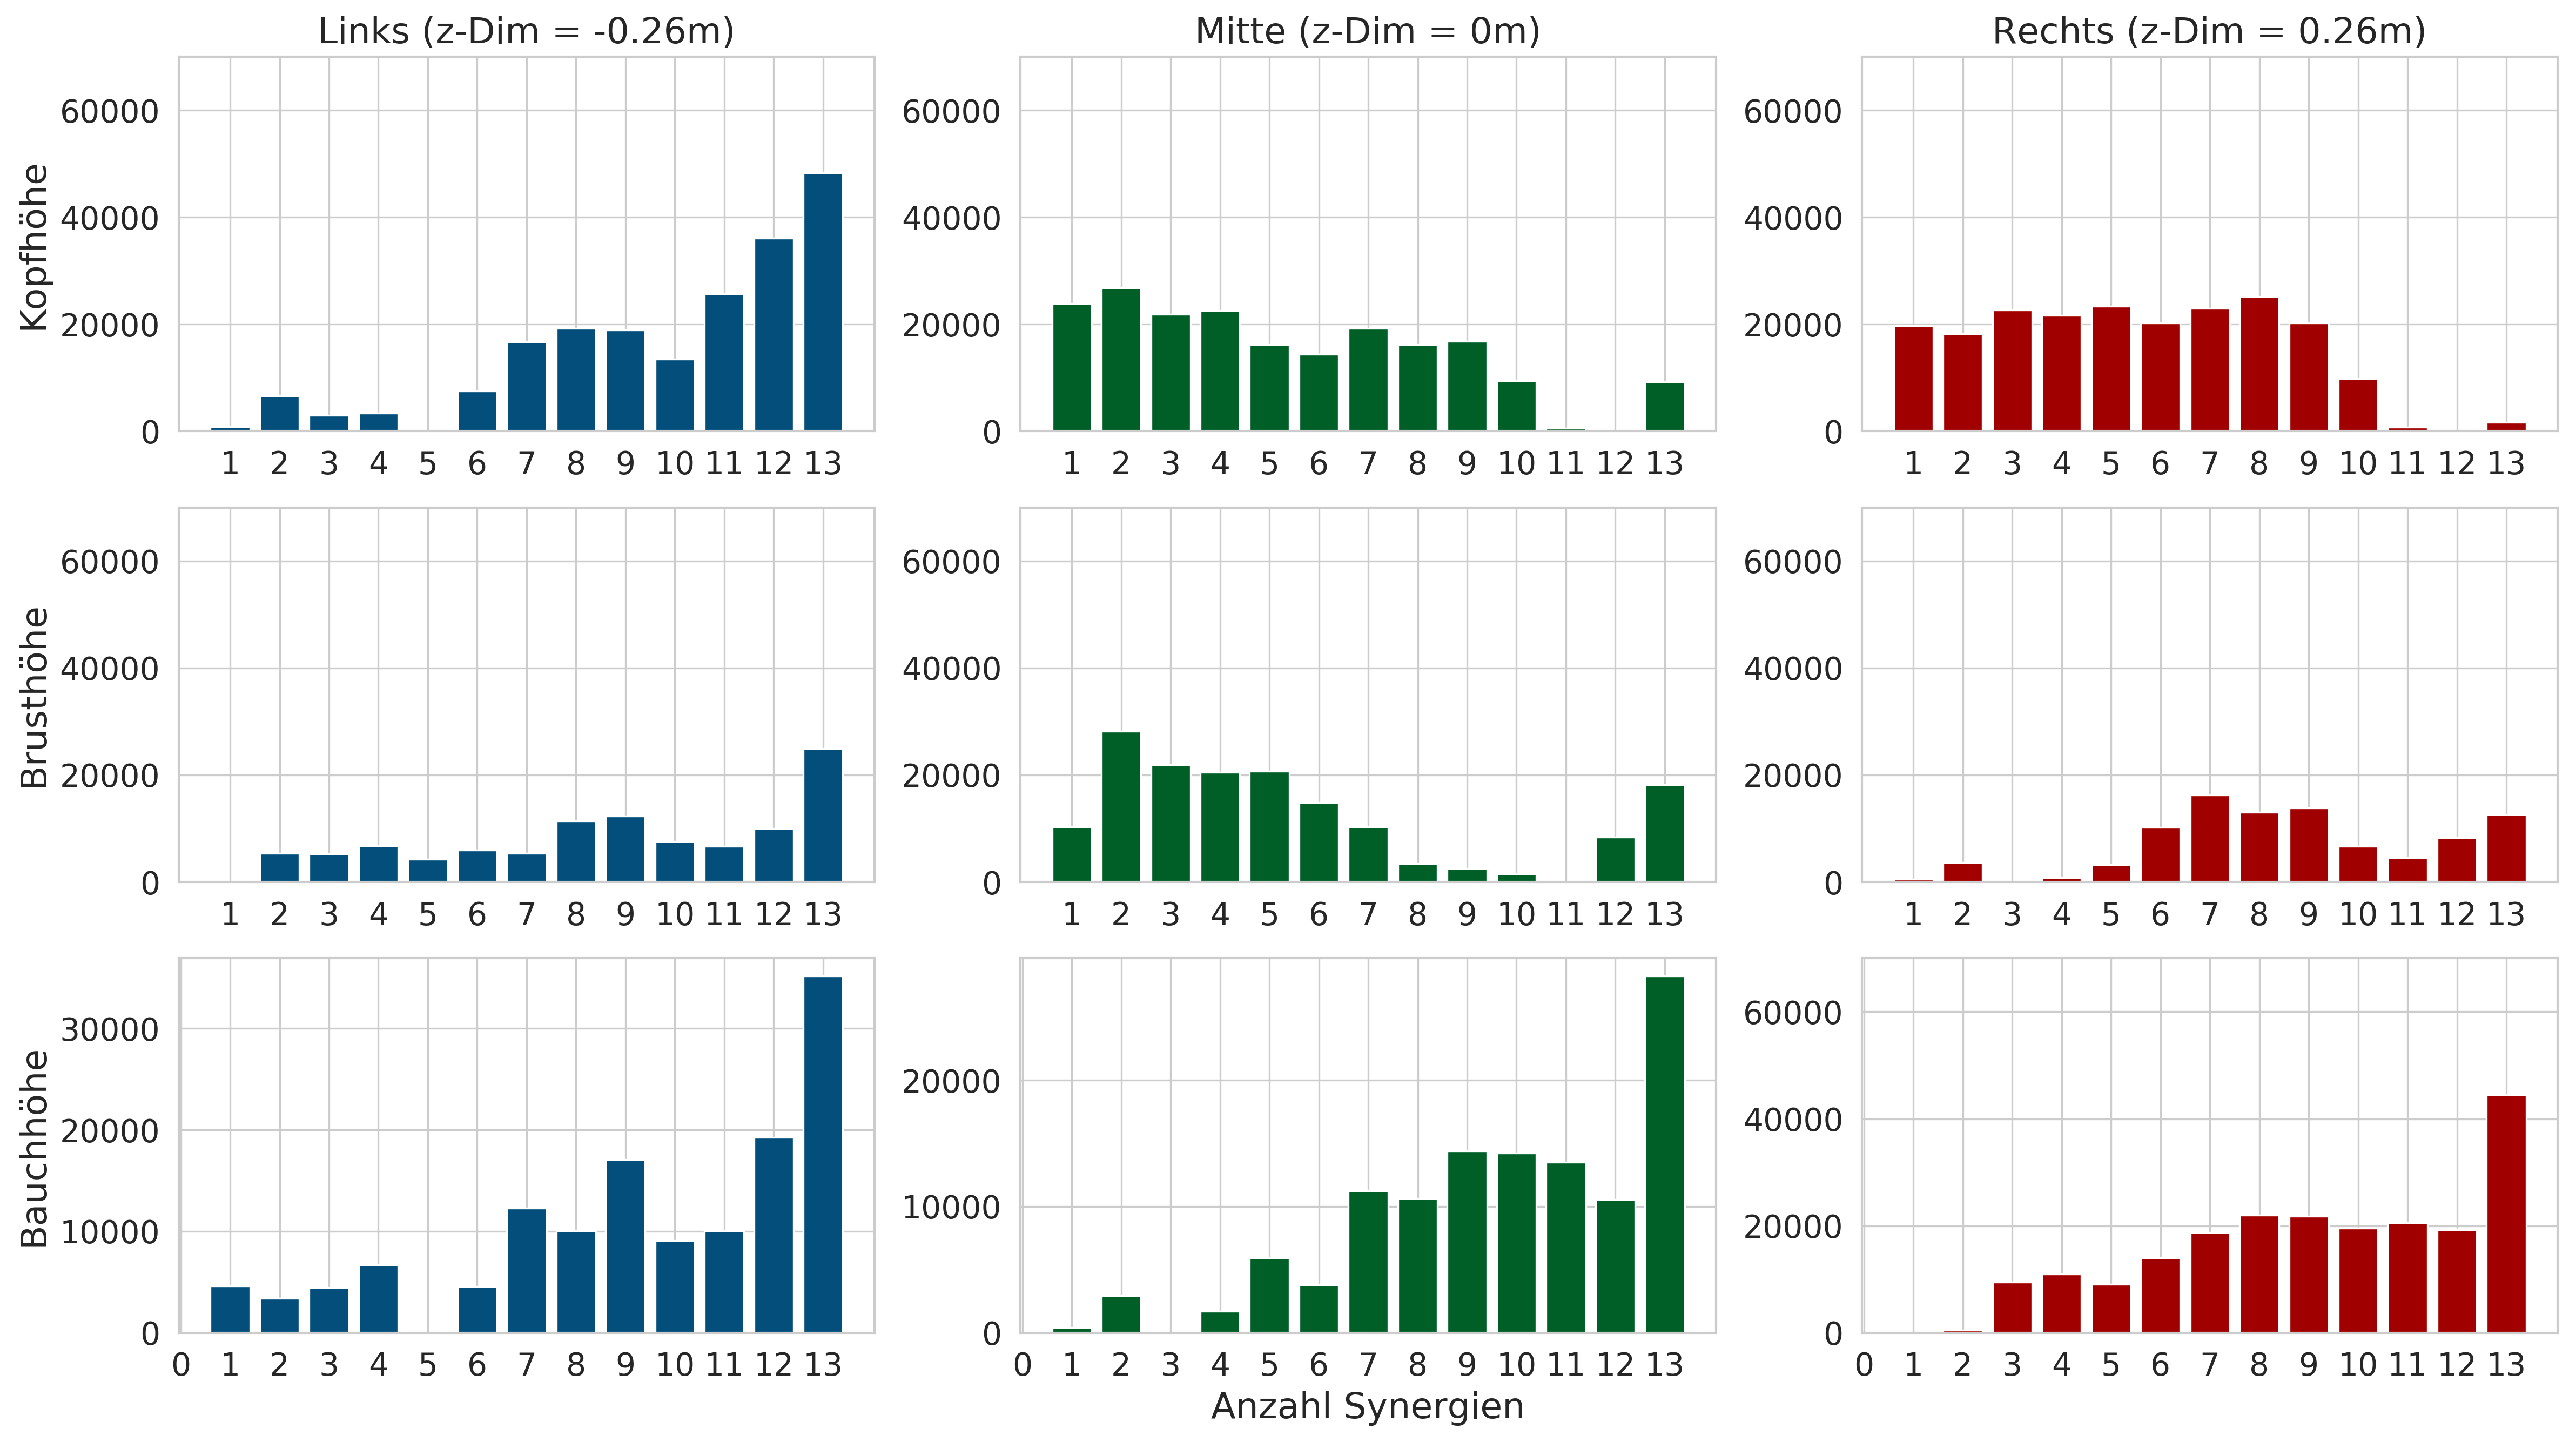

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


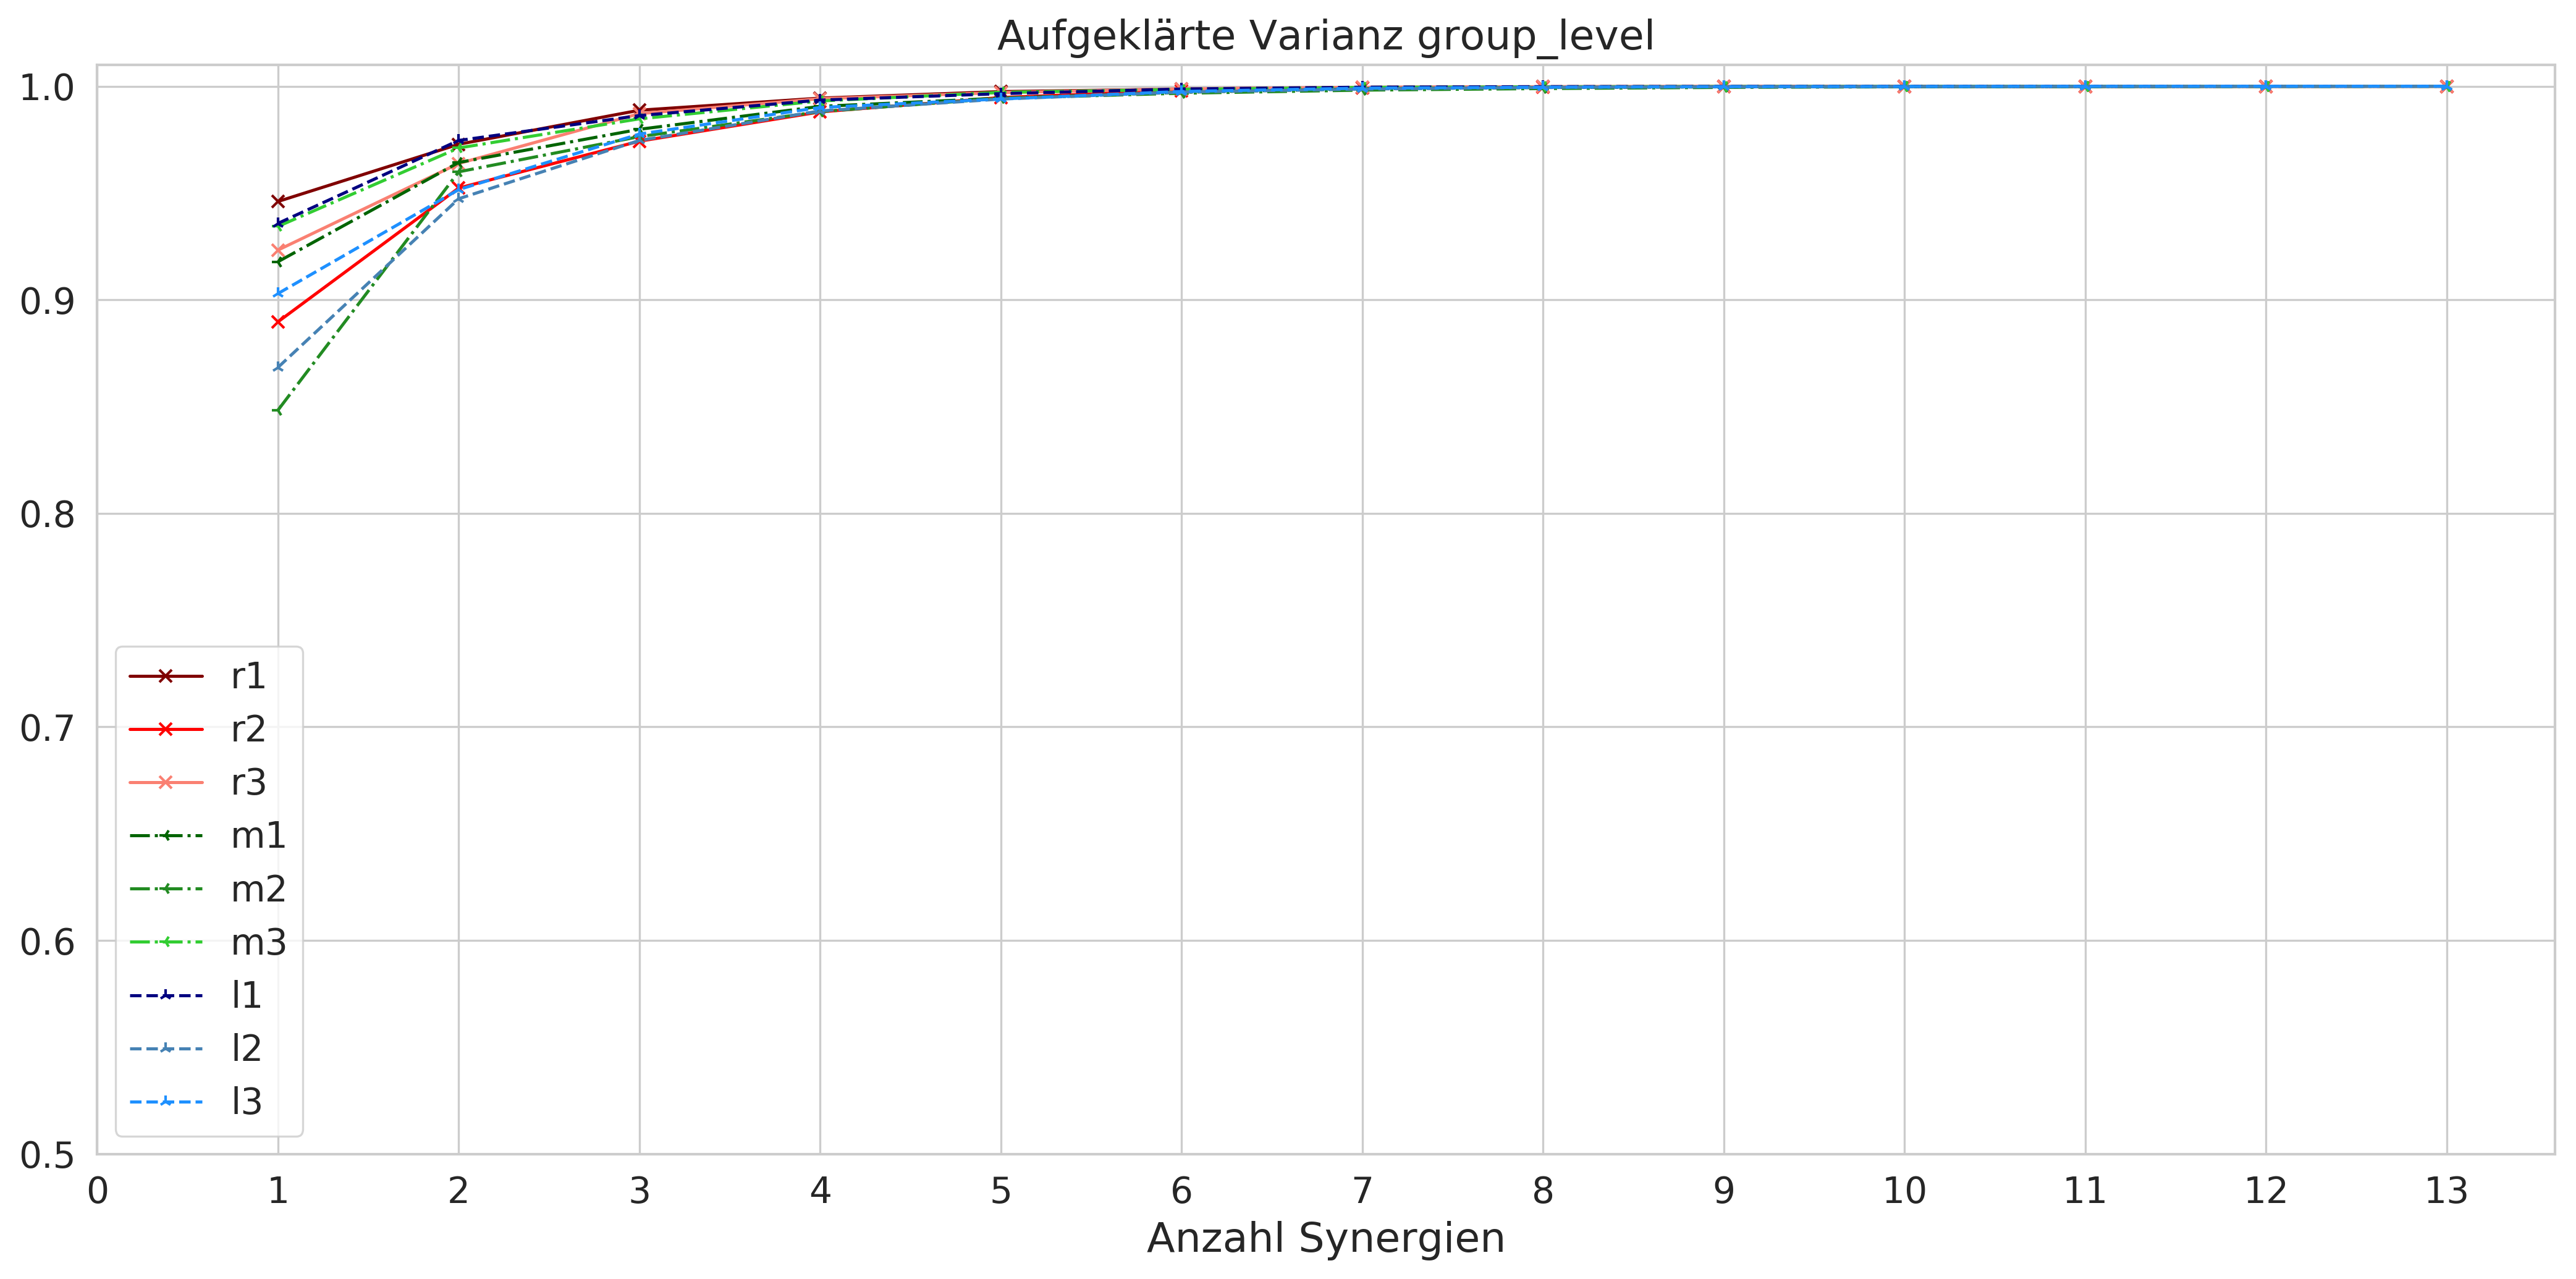

Subject Done!!
sub-08
/home/michael/Desktop/model_evd/1H/sub-08/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


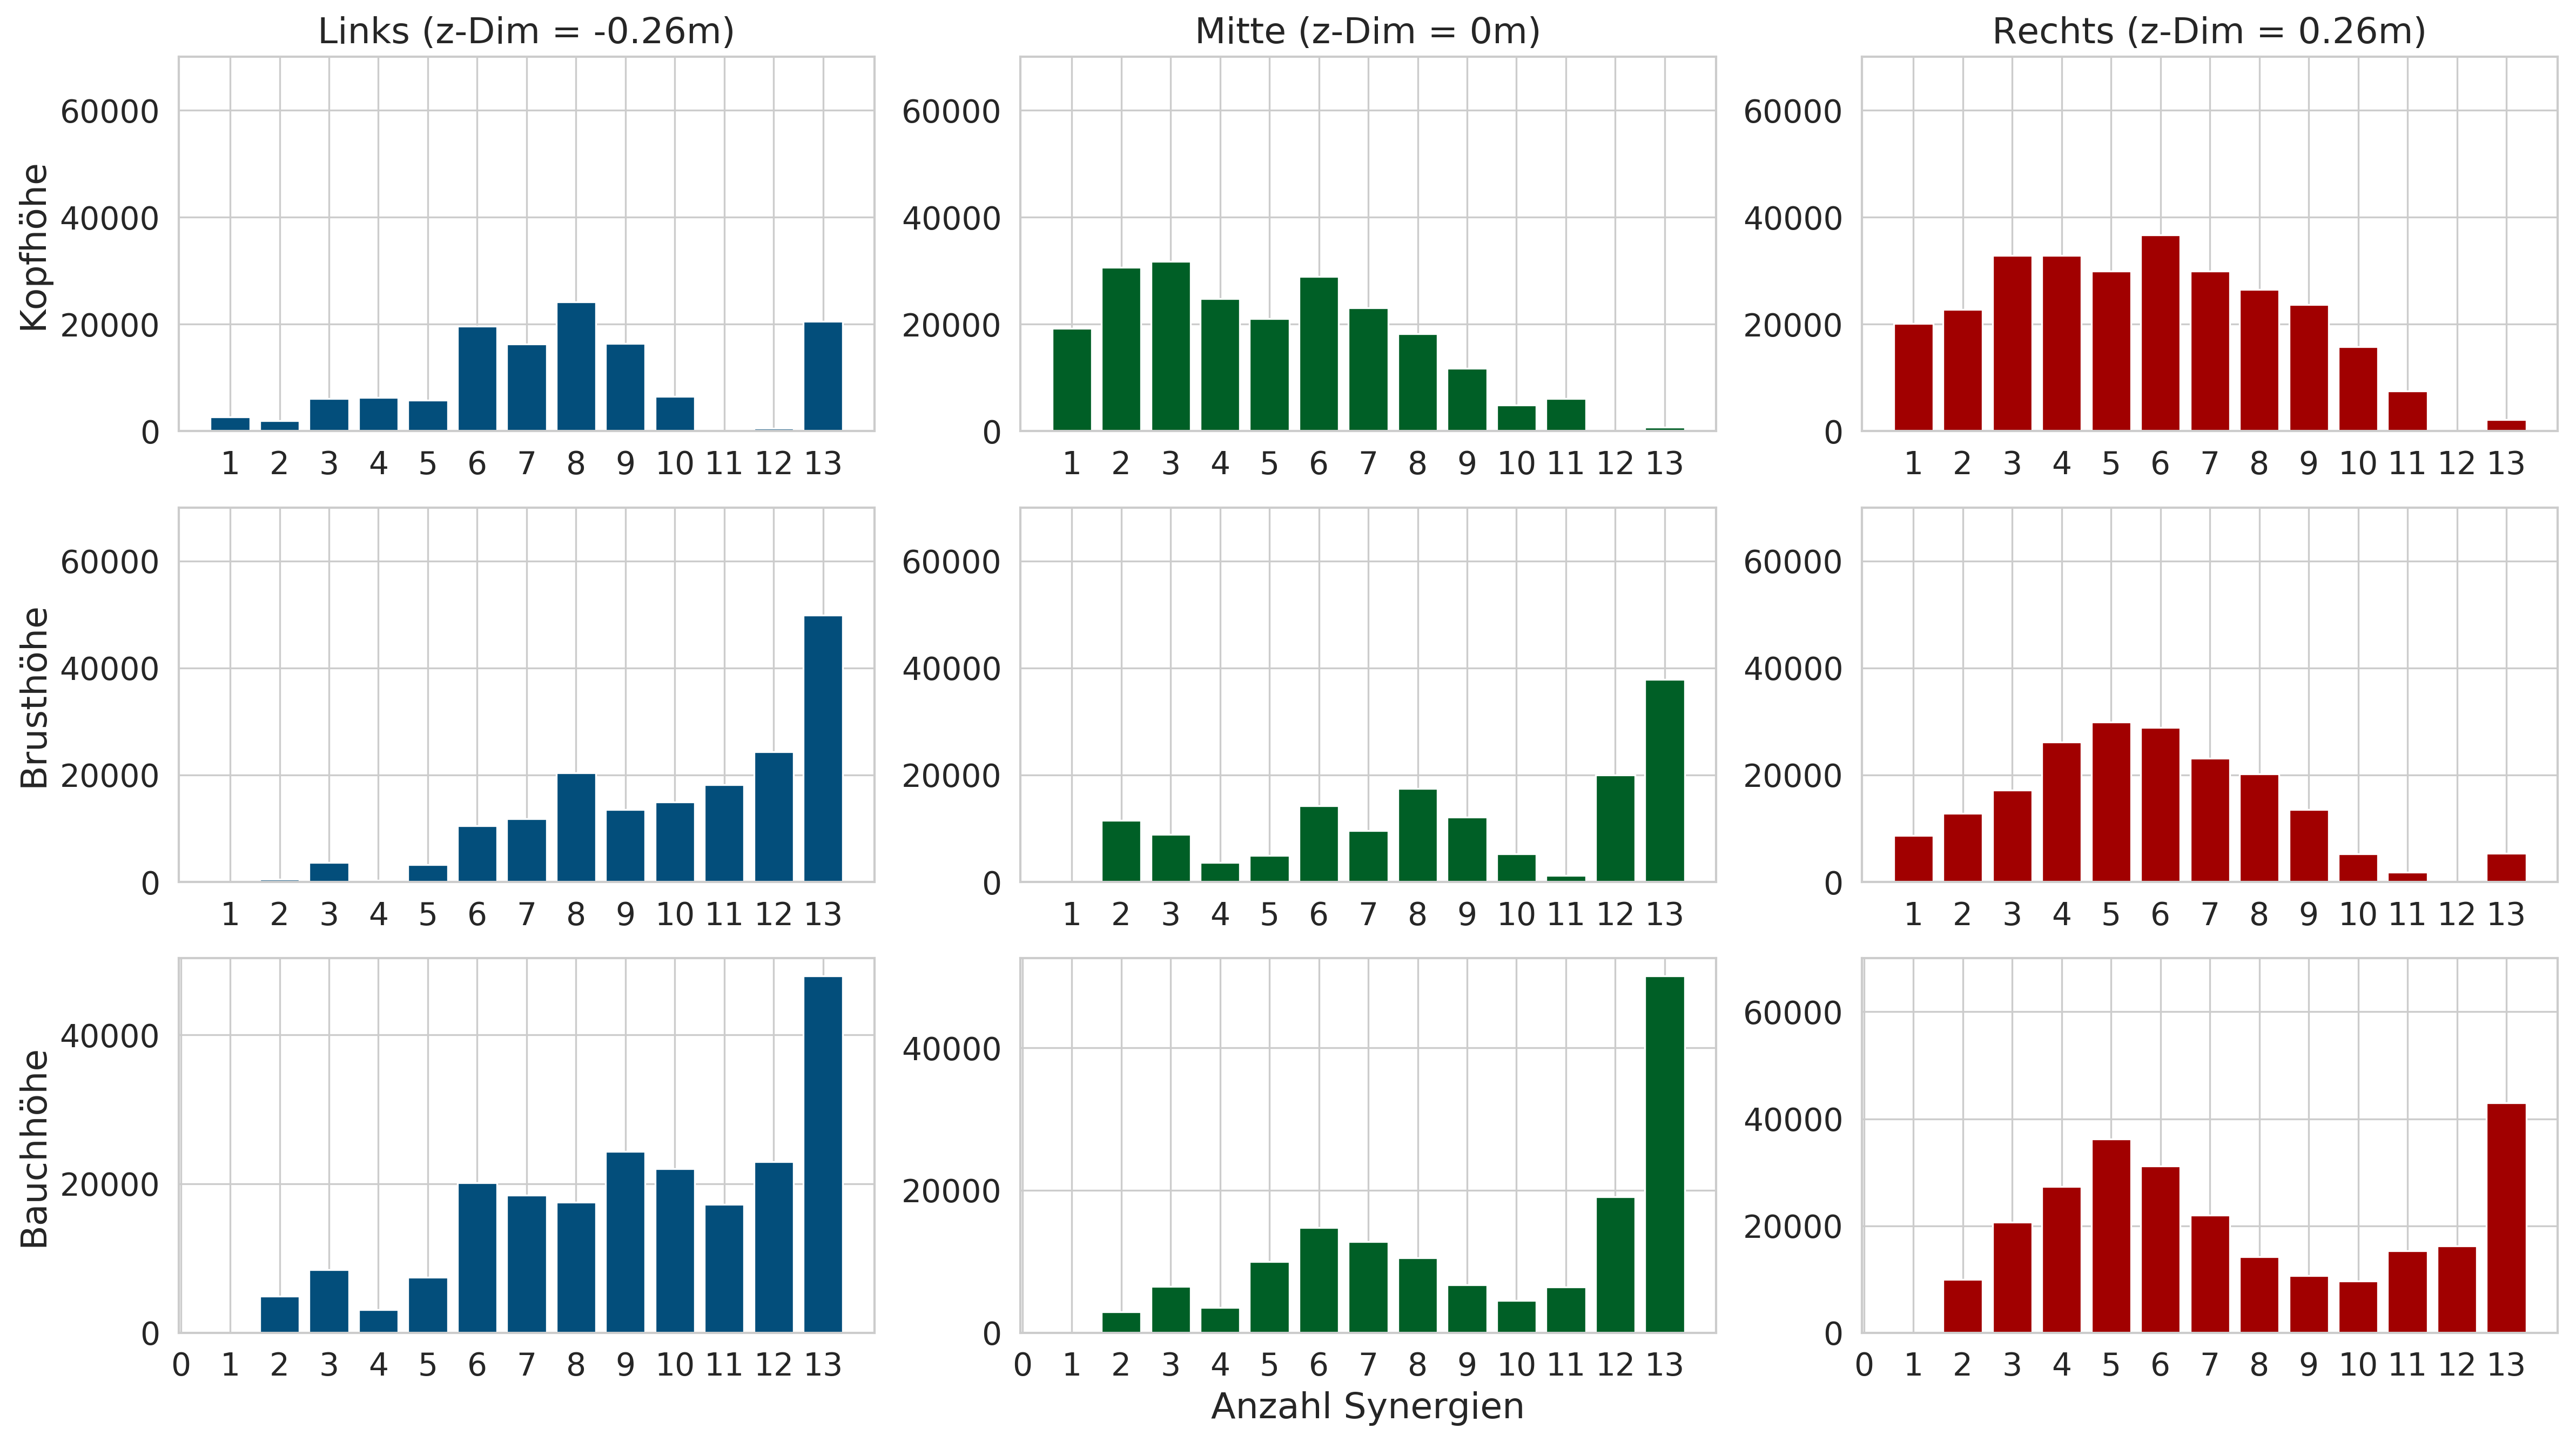

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


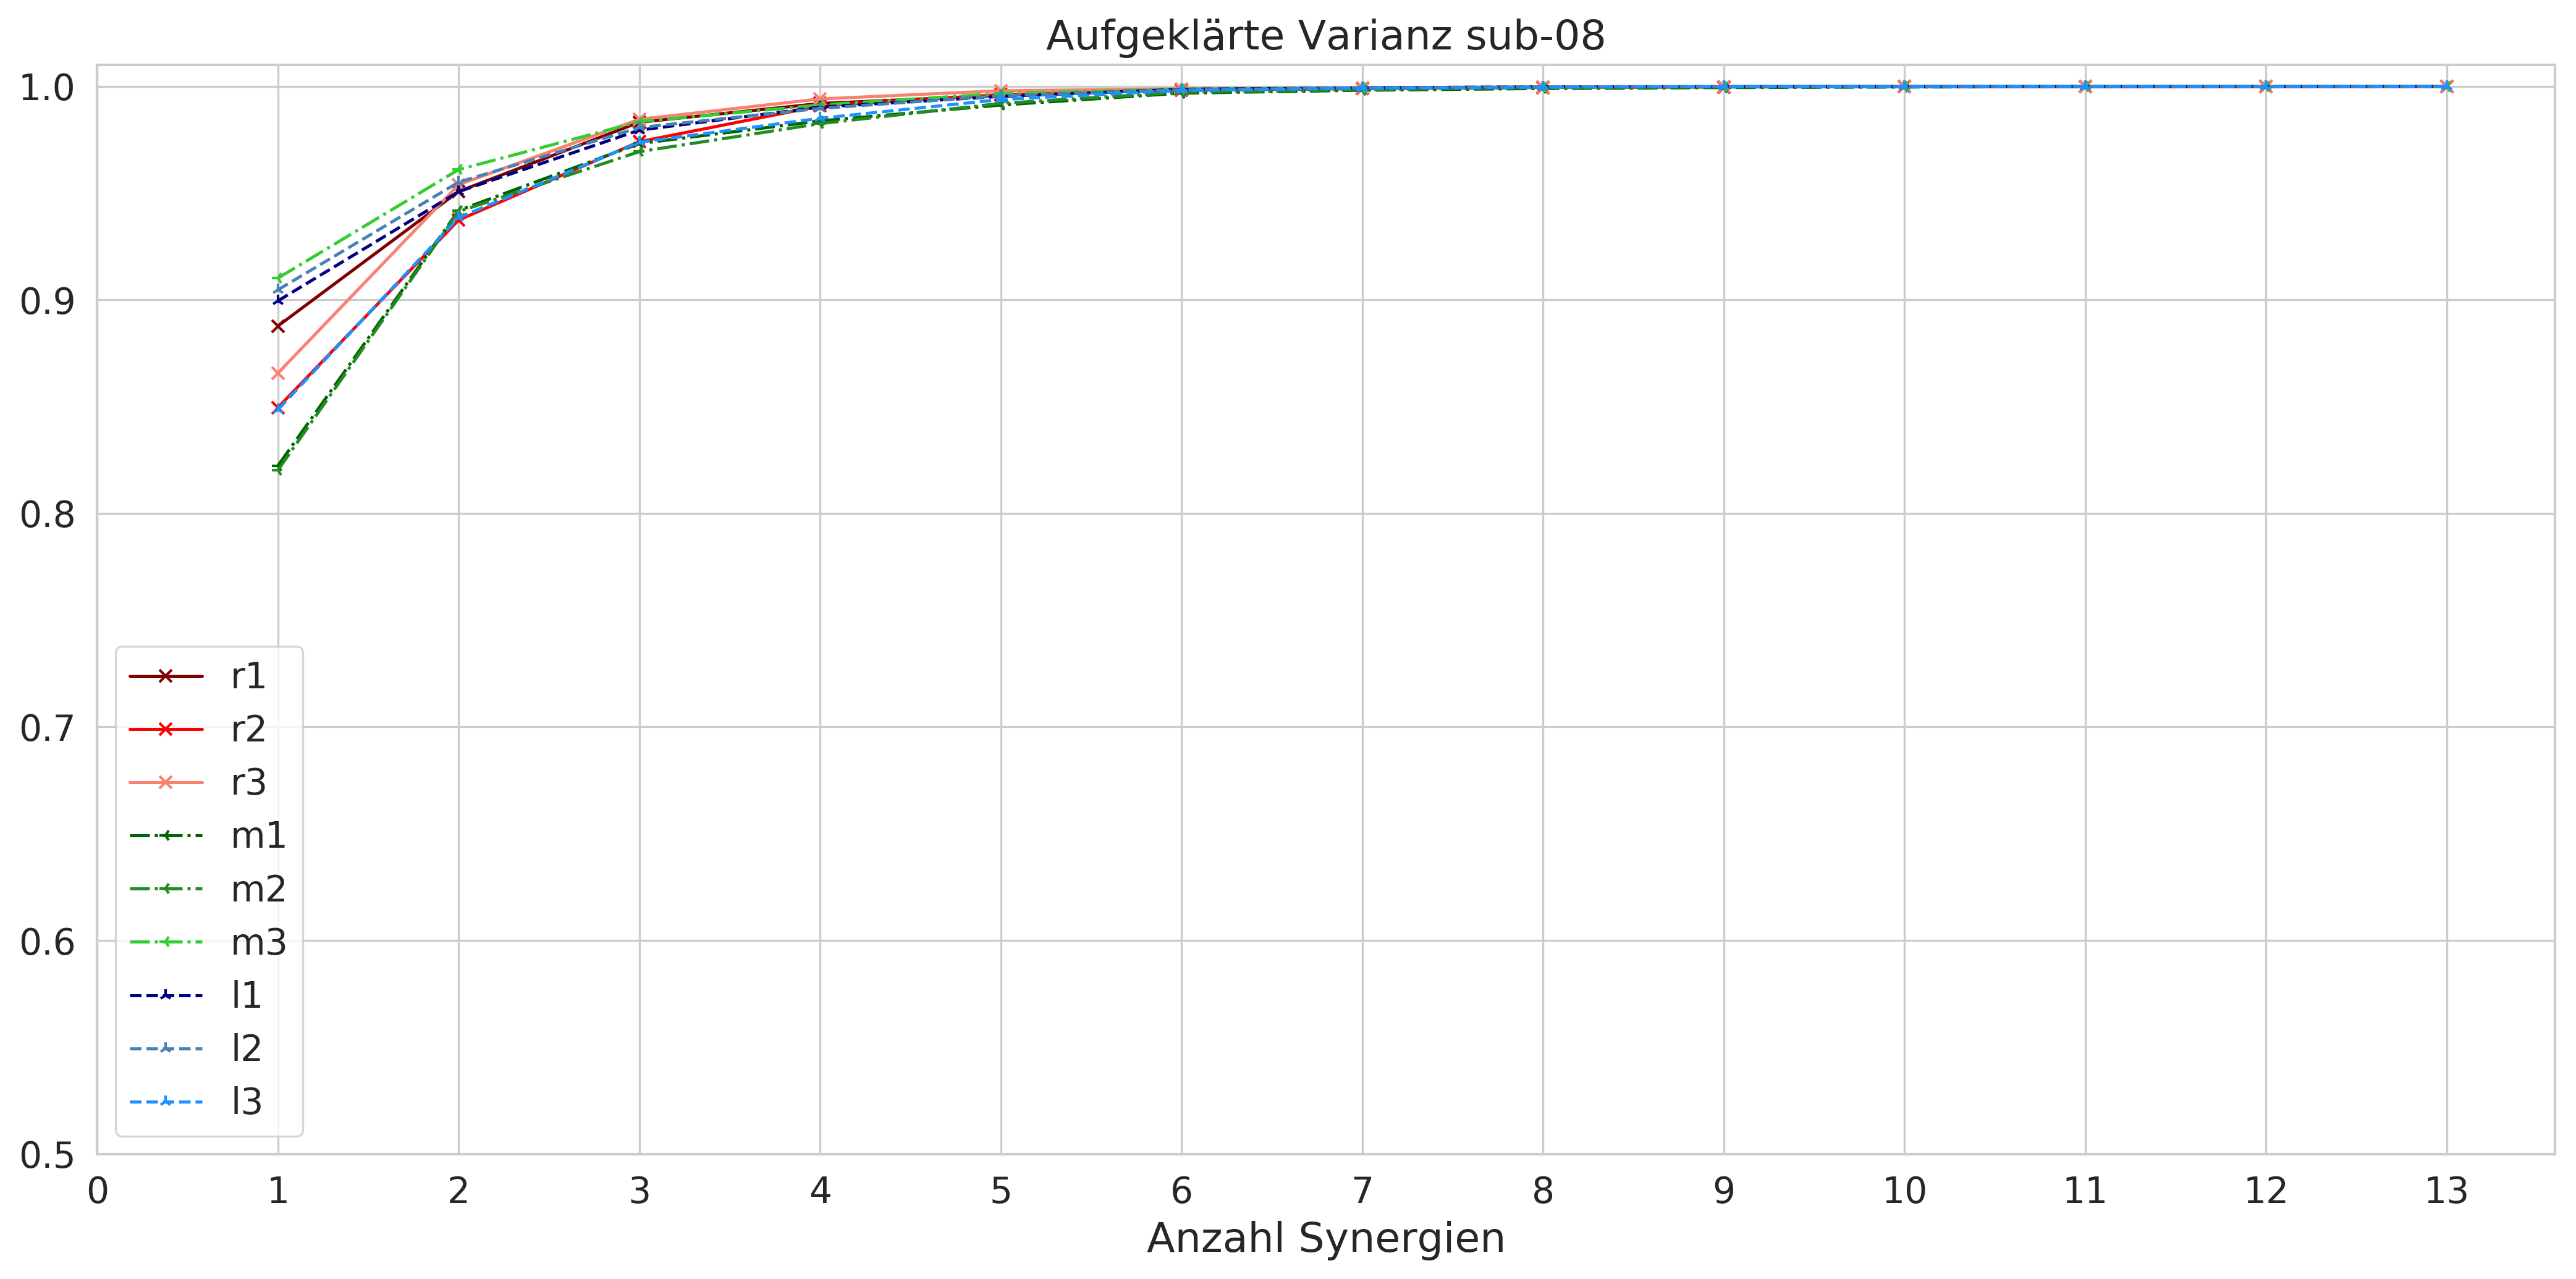

Subject Done!!
sub-11
/home/michael/Desktop/model_evd/1H/sub-11/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


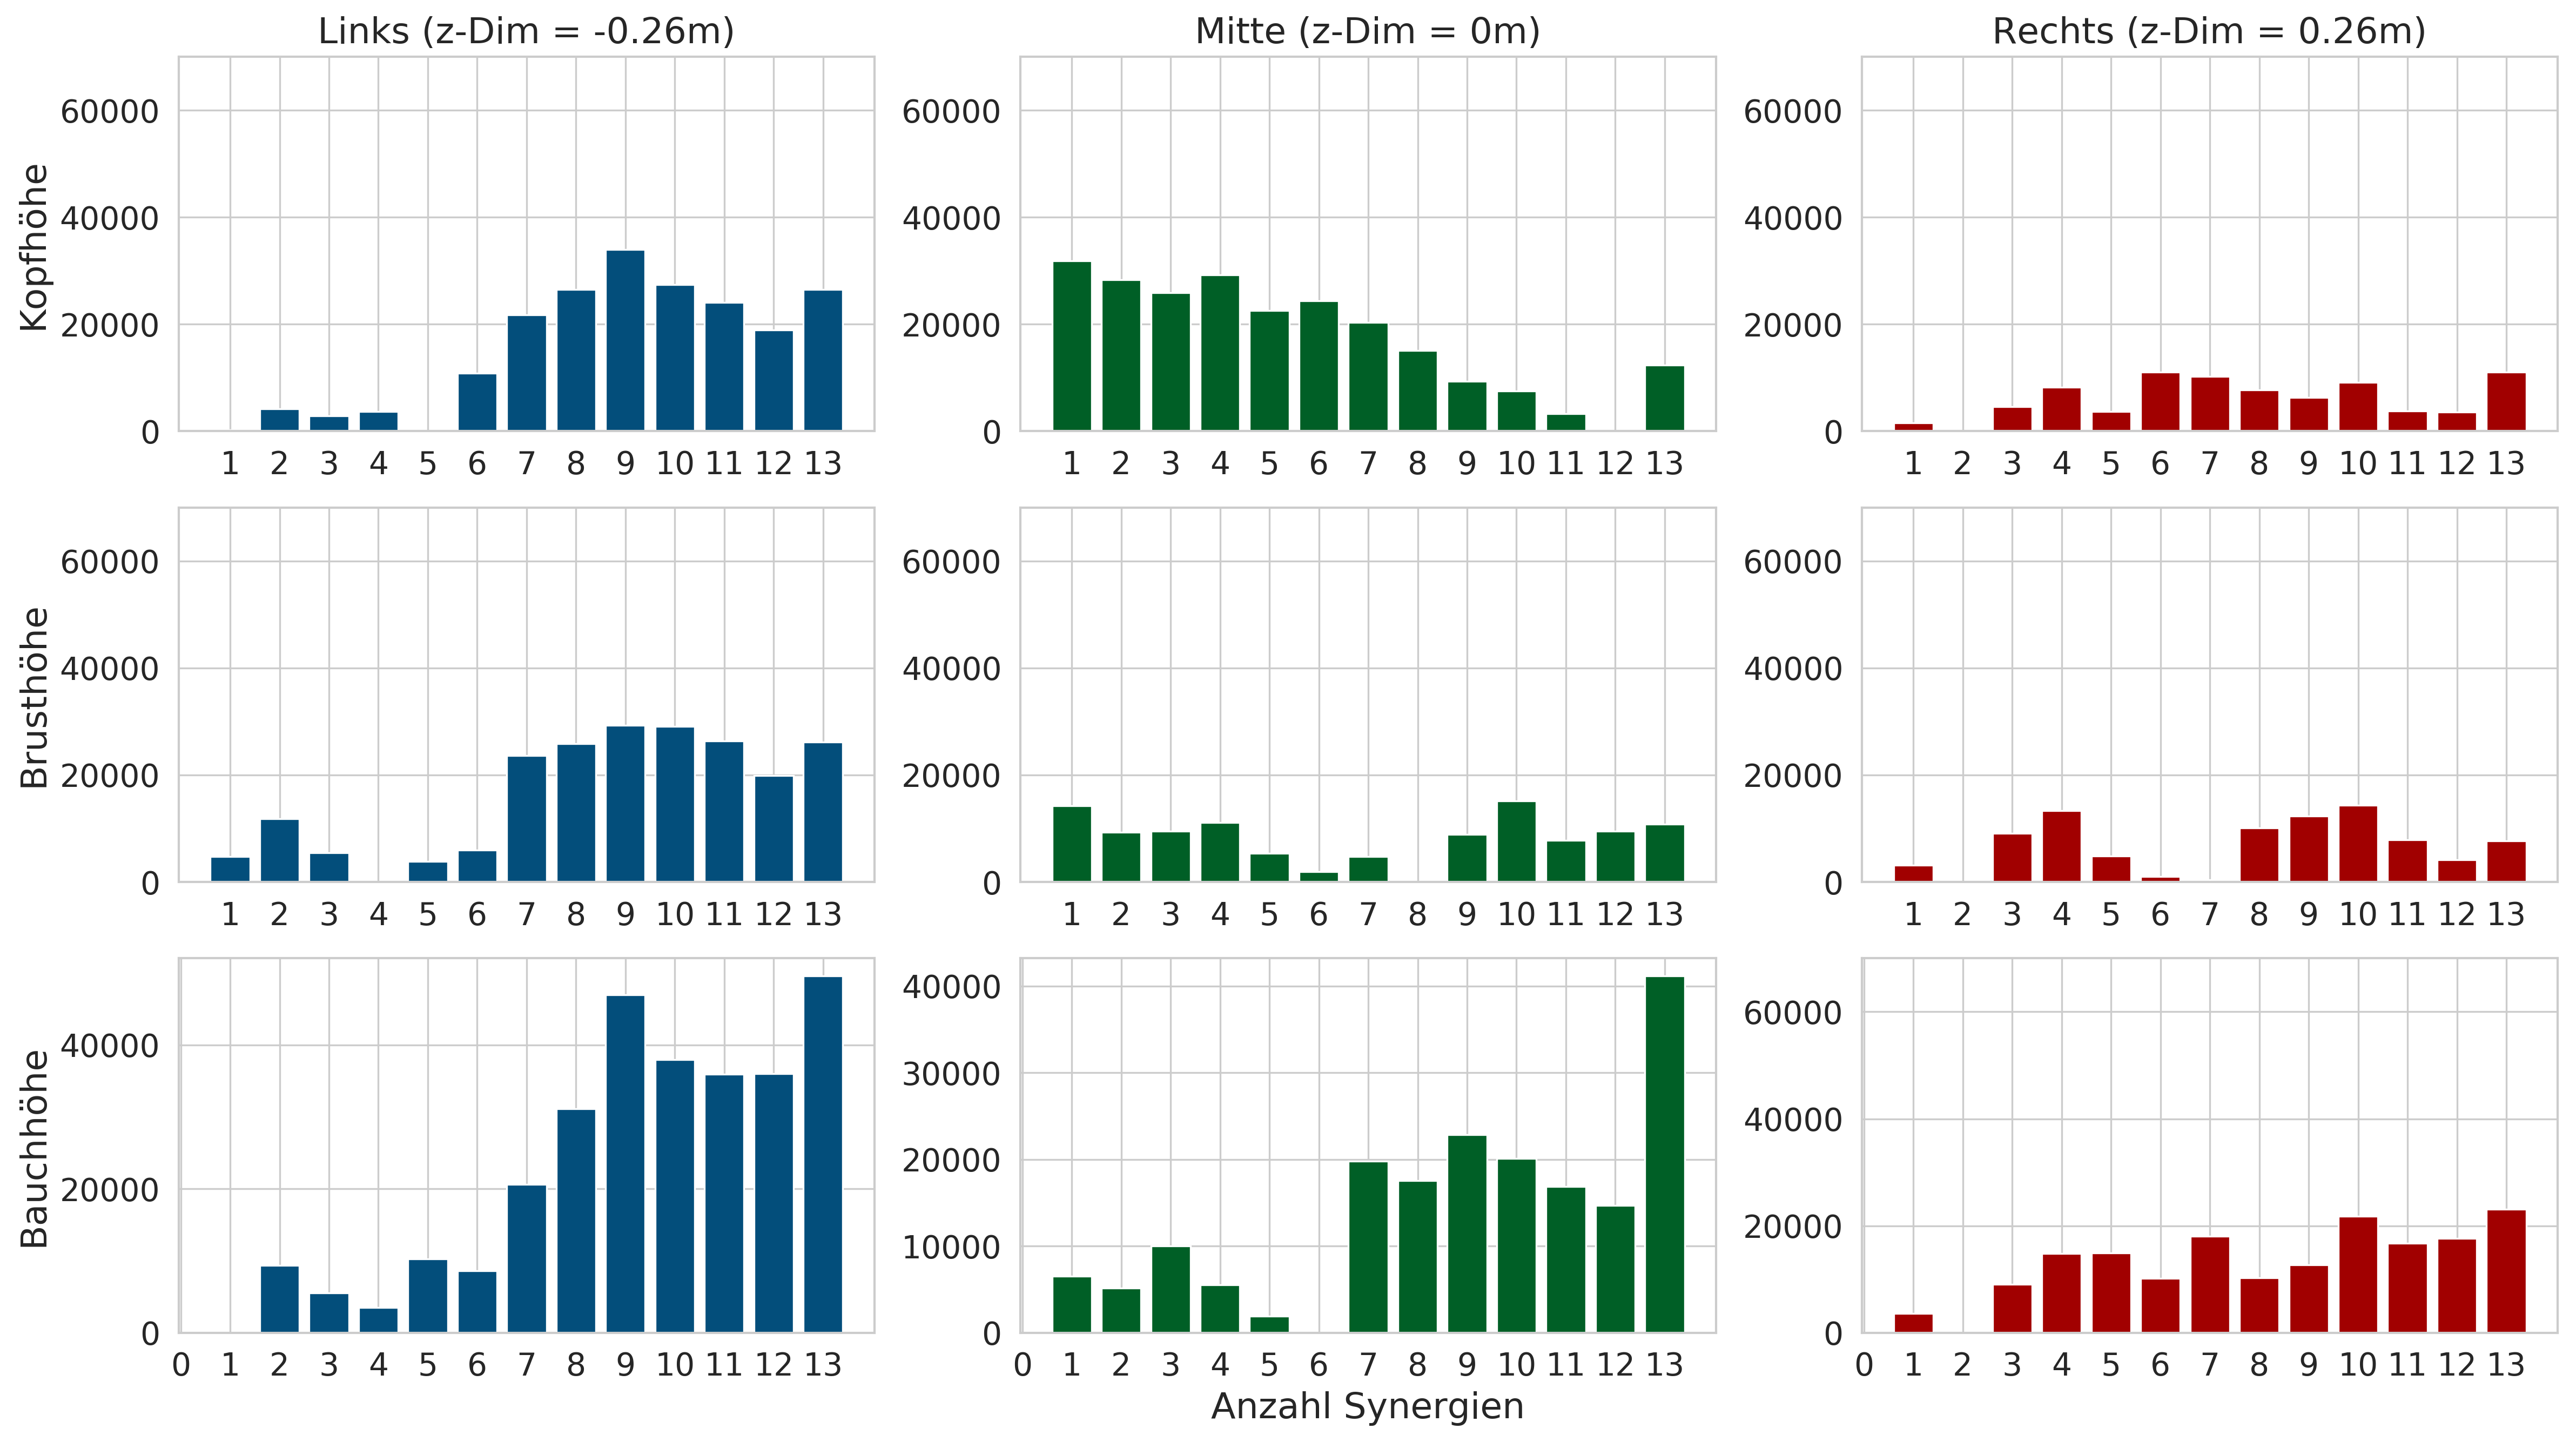

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


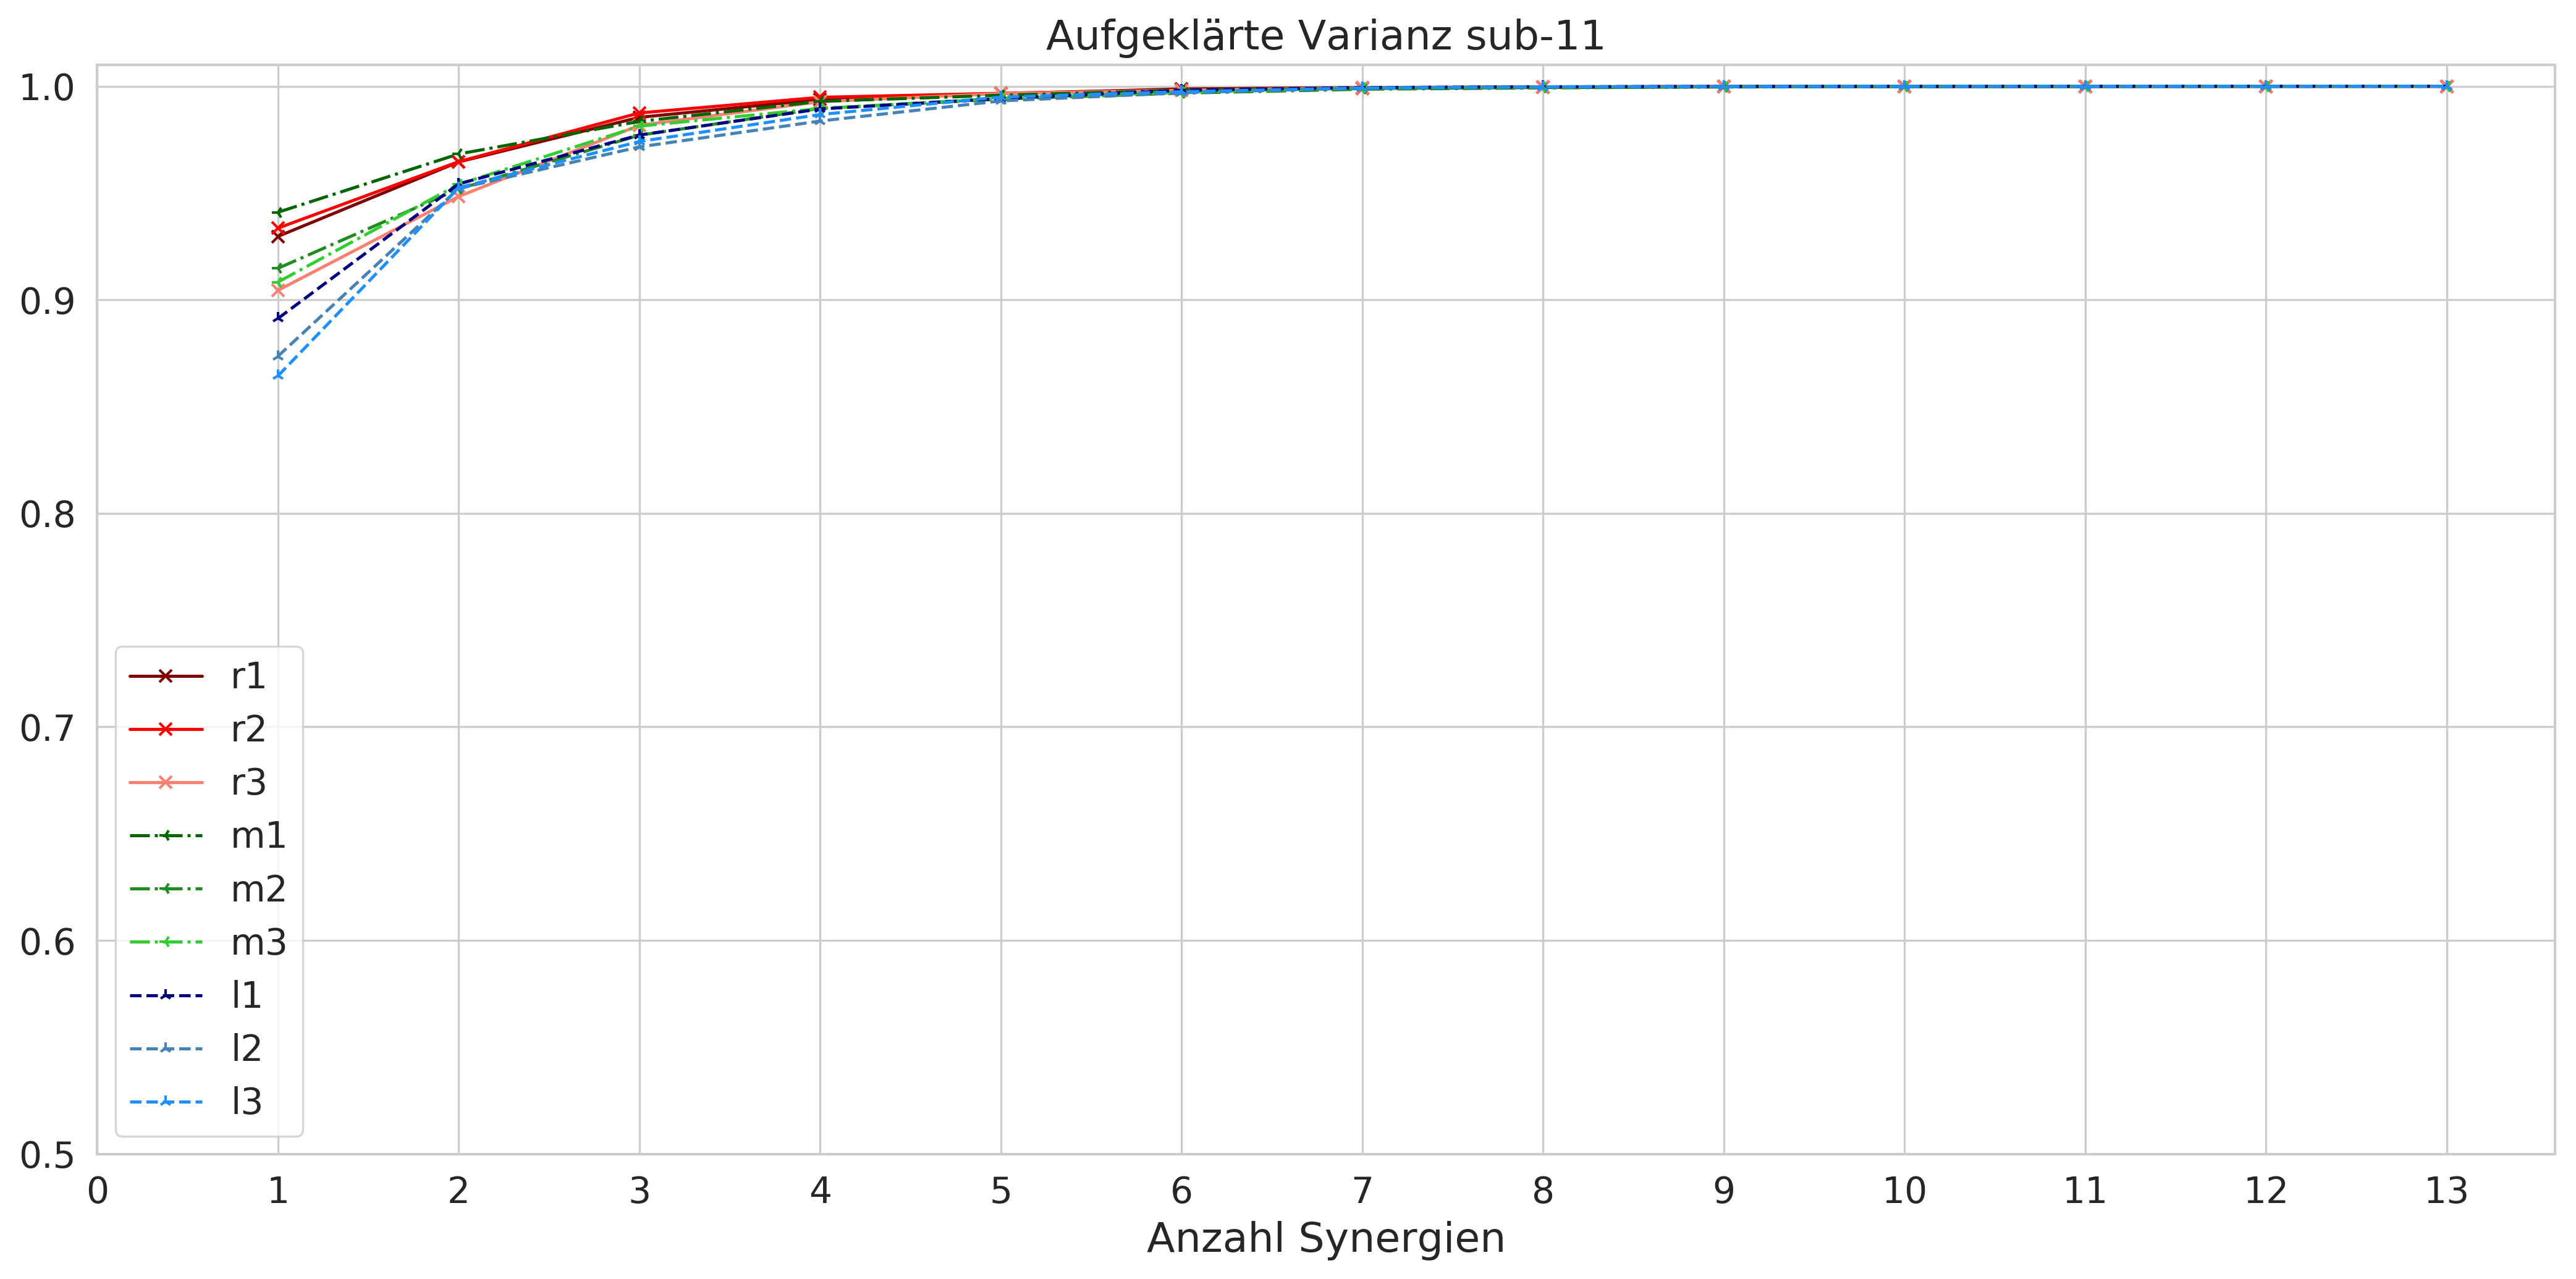

Subject Done!!
sub-10
/home/michael/Desktop/model_evd/1H/sub-10/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/m3
m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/r2
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/l2
l2
!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


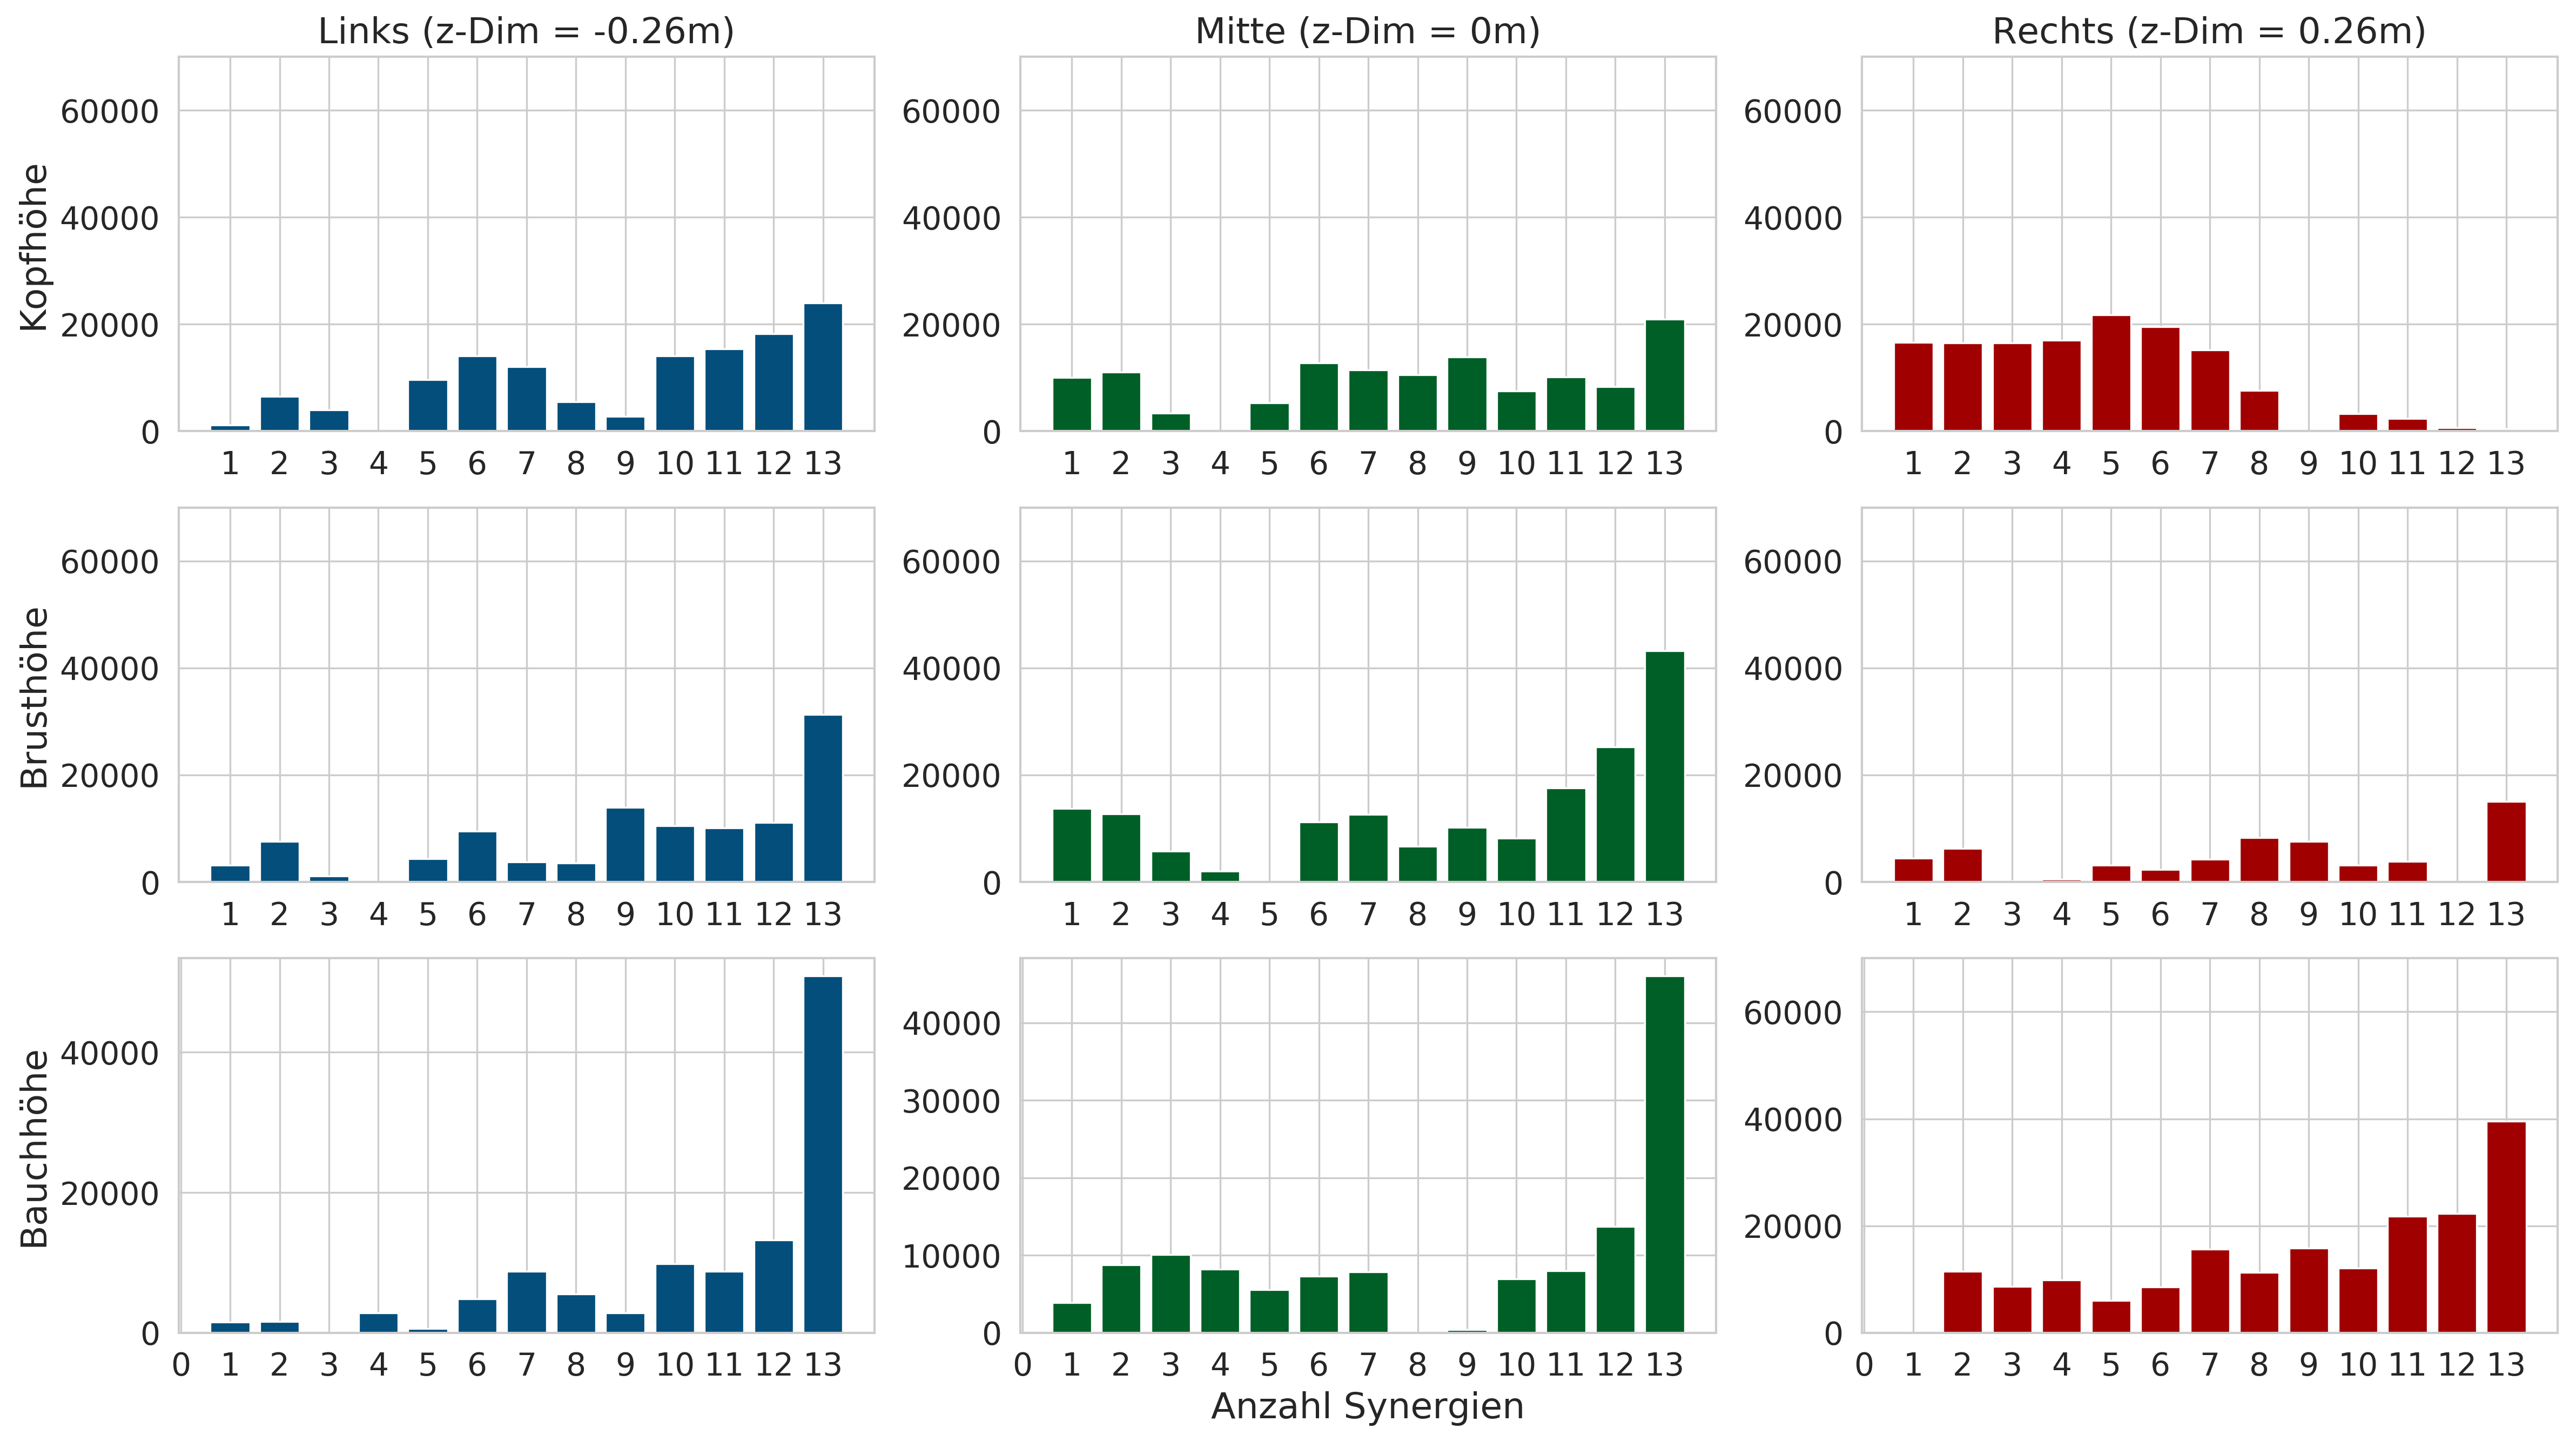

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


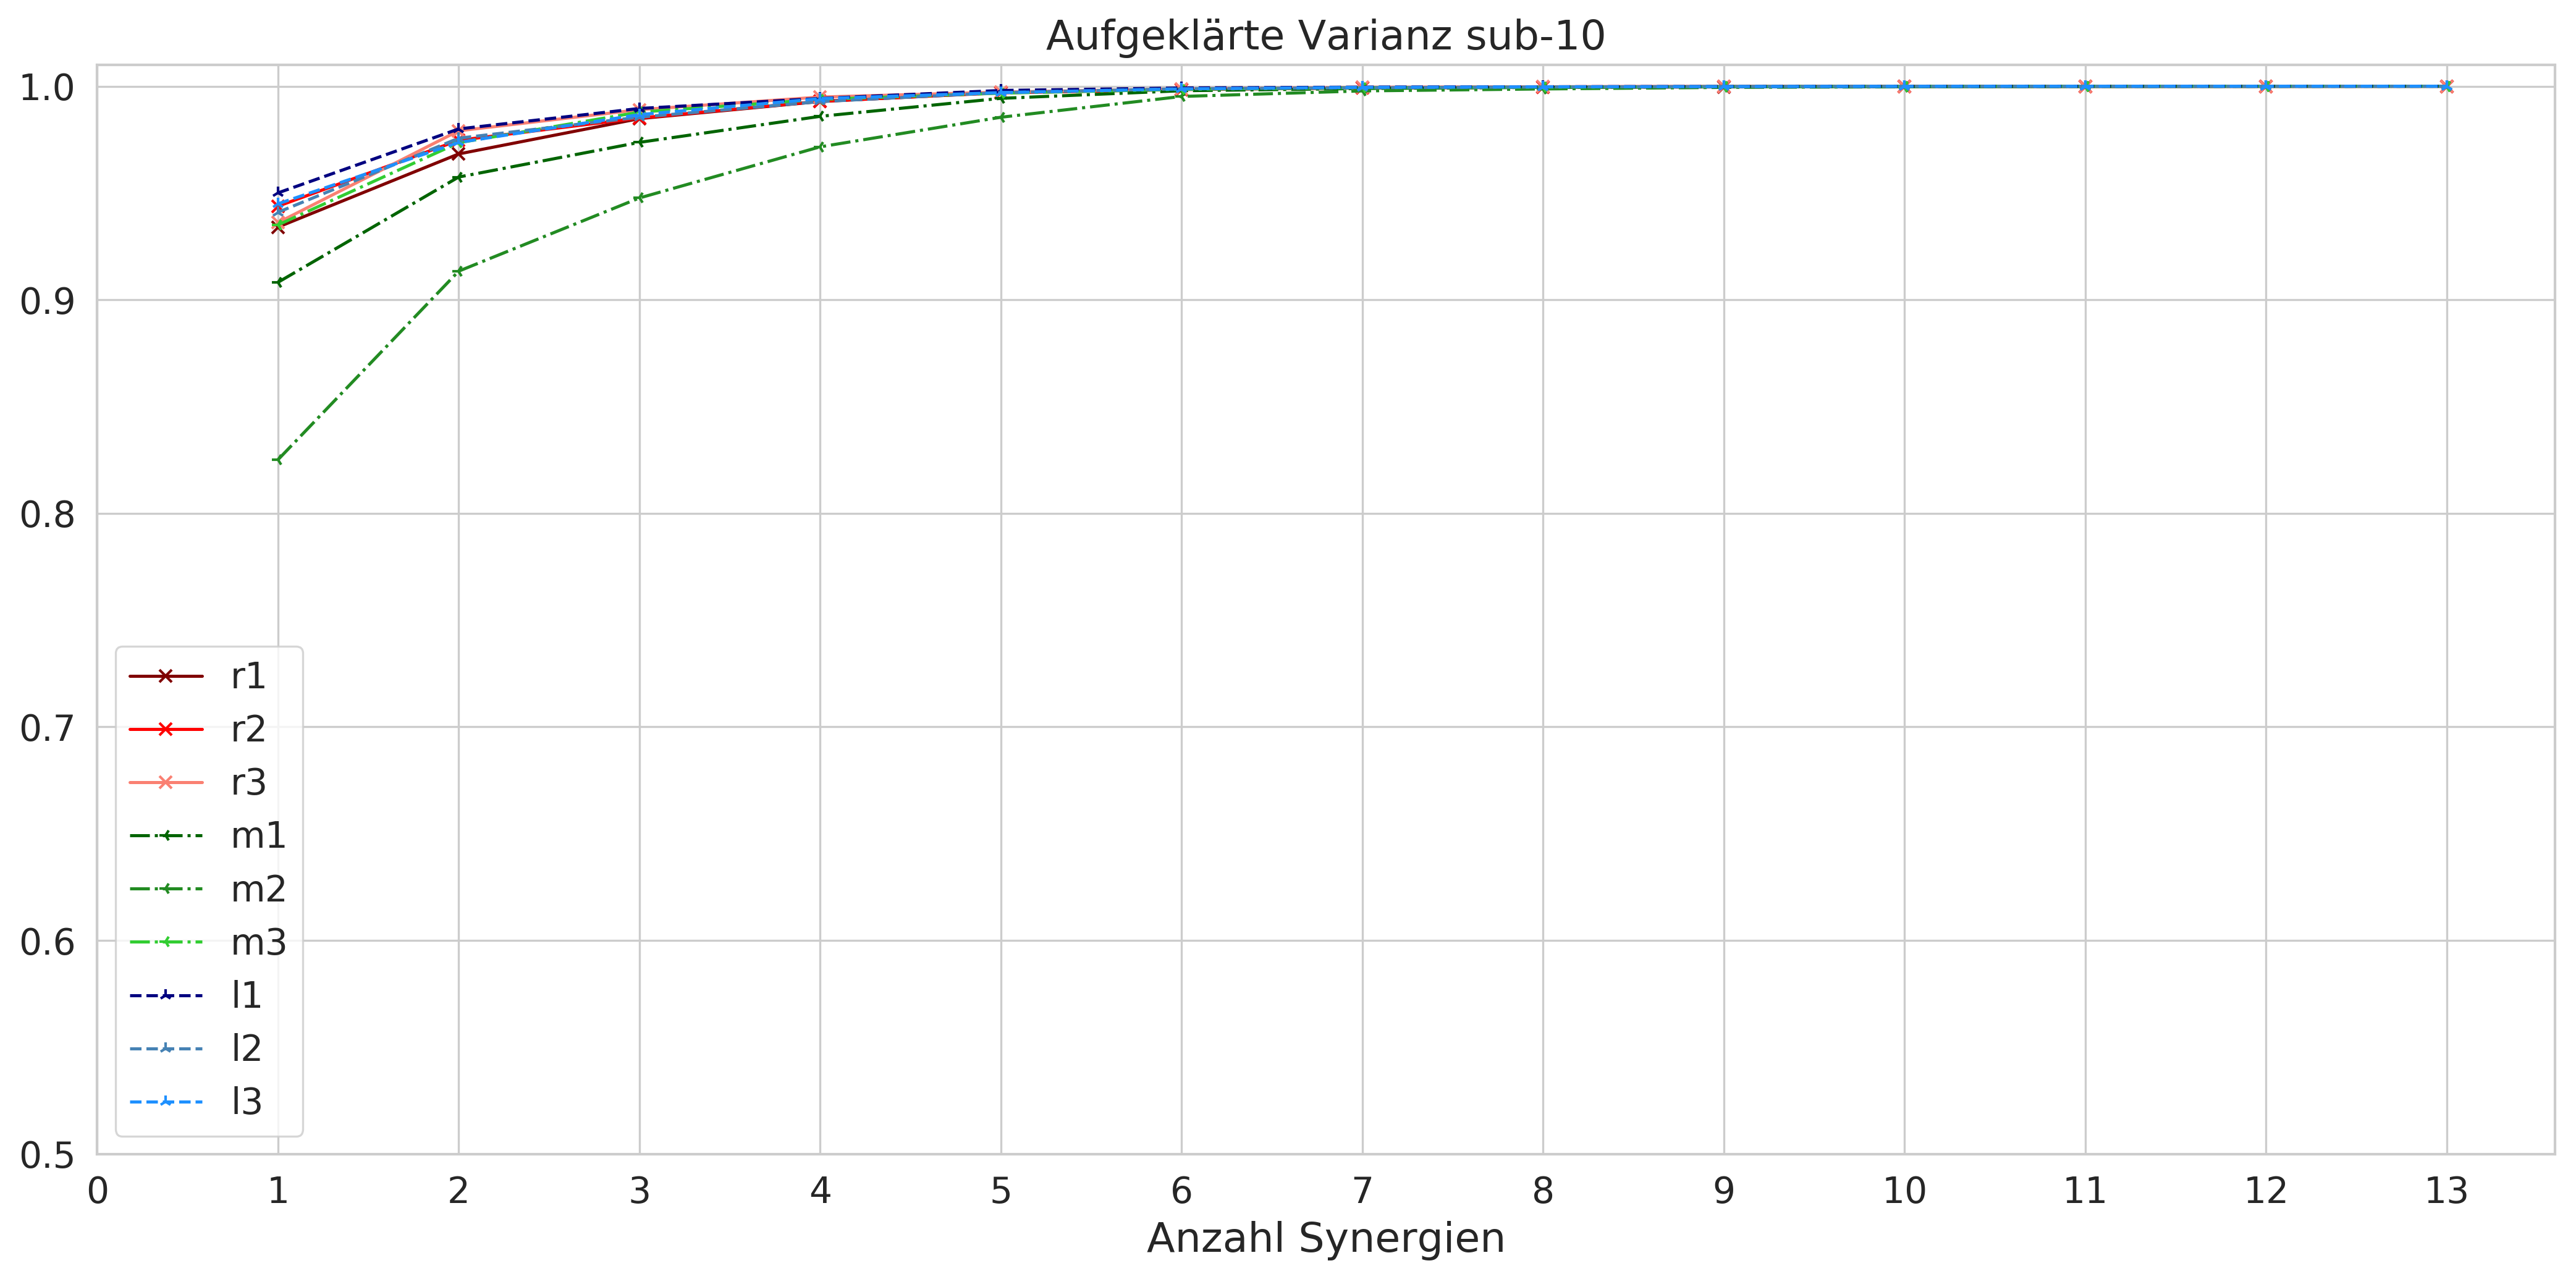

Subject Done!!
sub-02
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2_singular_values.png
sub-02_r2_singular_values.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m1_singular_var_explained.png
sub-02_m1_singular_var_explained.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m1_singular_values.png
sub-02_m1_singular_values.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r3__left_model_evidence.png
sub-02_r3__left_model_evidence.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m2__left_v1.png
sub-02_m2__left_v1.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2__left_vaf.png
sub-02_r2__left_vaf.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r3_singular_var_explained.png
sub-02_r3_singular_var_explained.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2__left_model_evidence.png
sub-02_r2__left_model_evidence.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r1__right_vaf.png
sub-02_r1__right_vaf.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


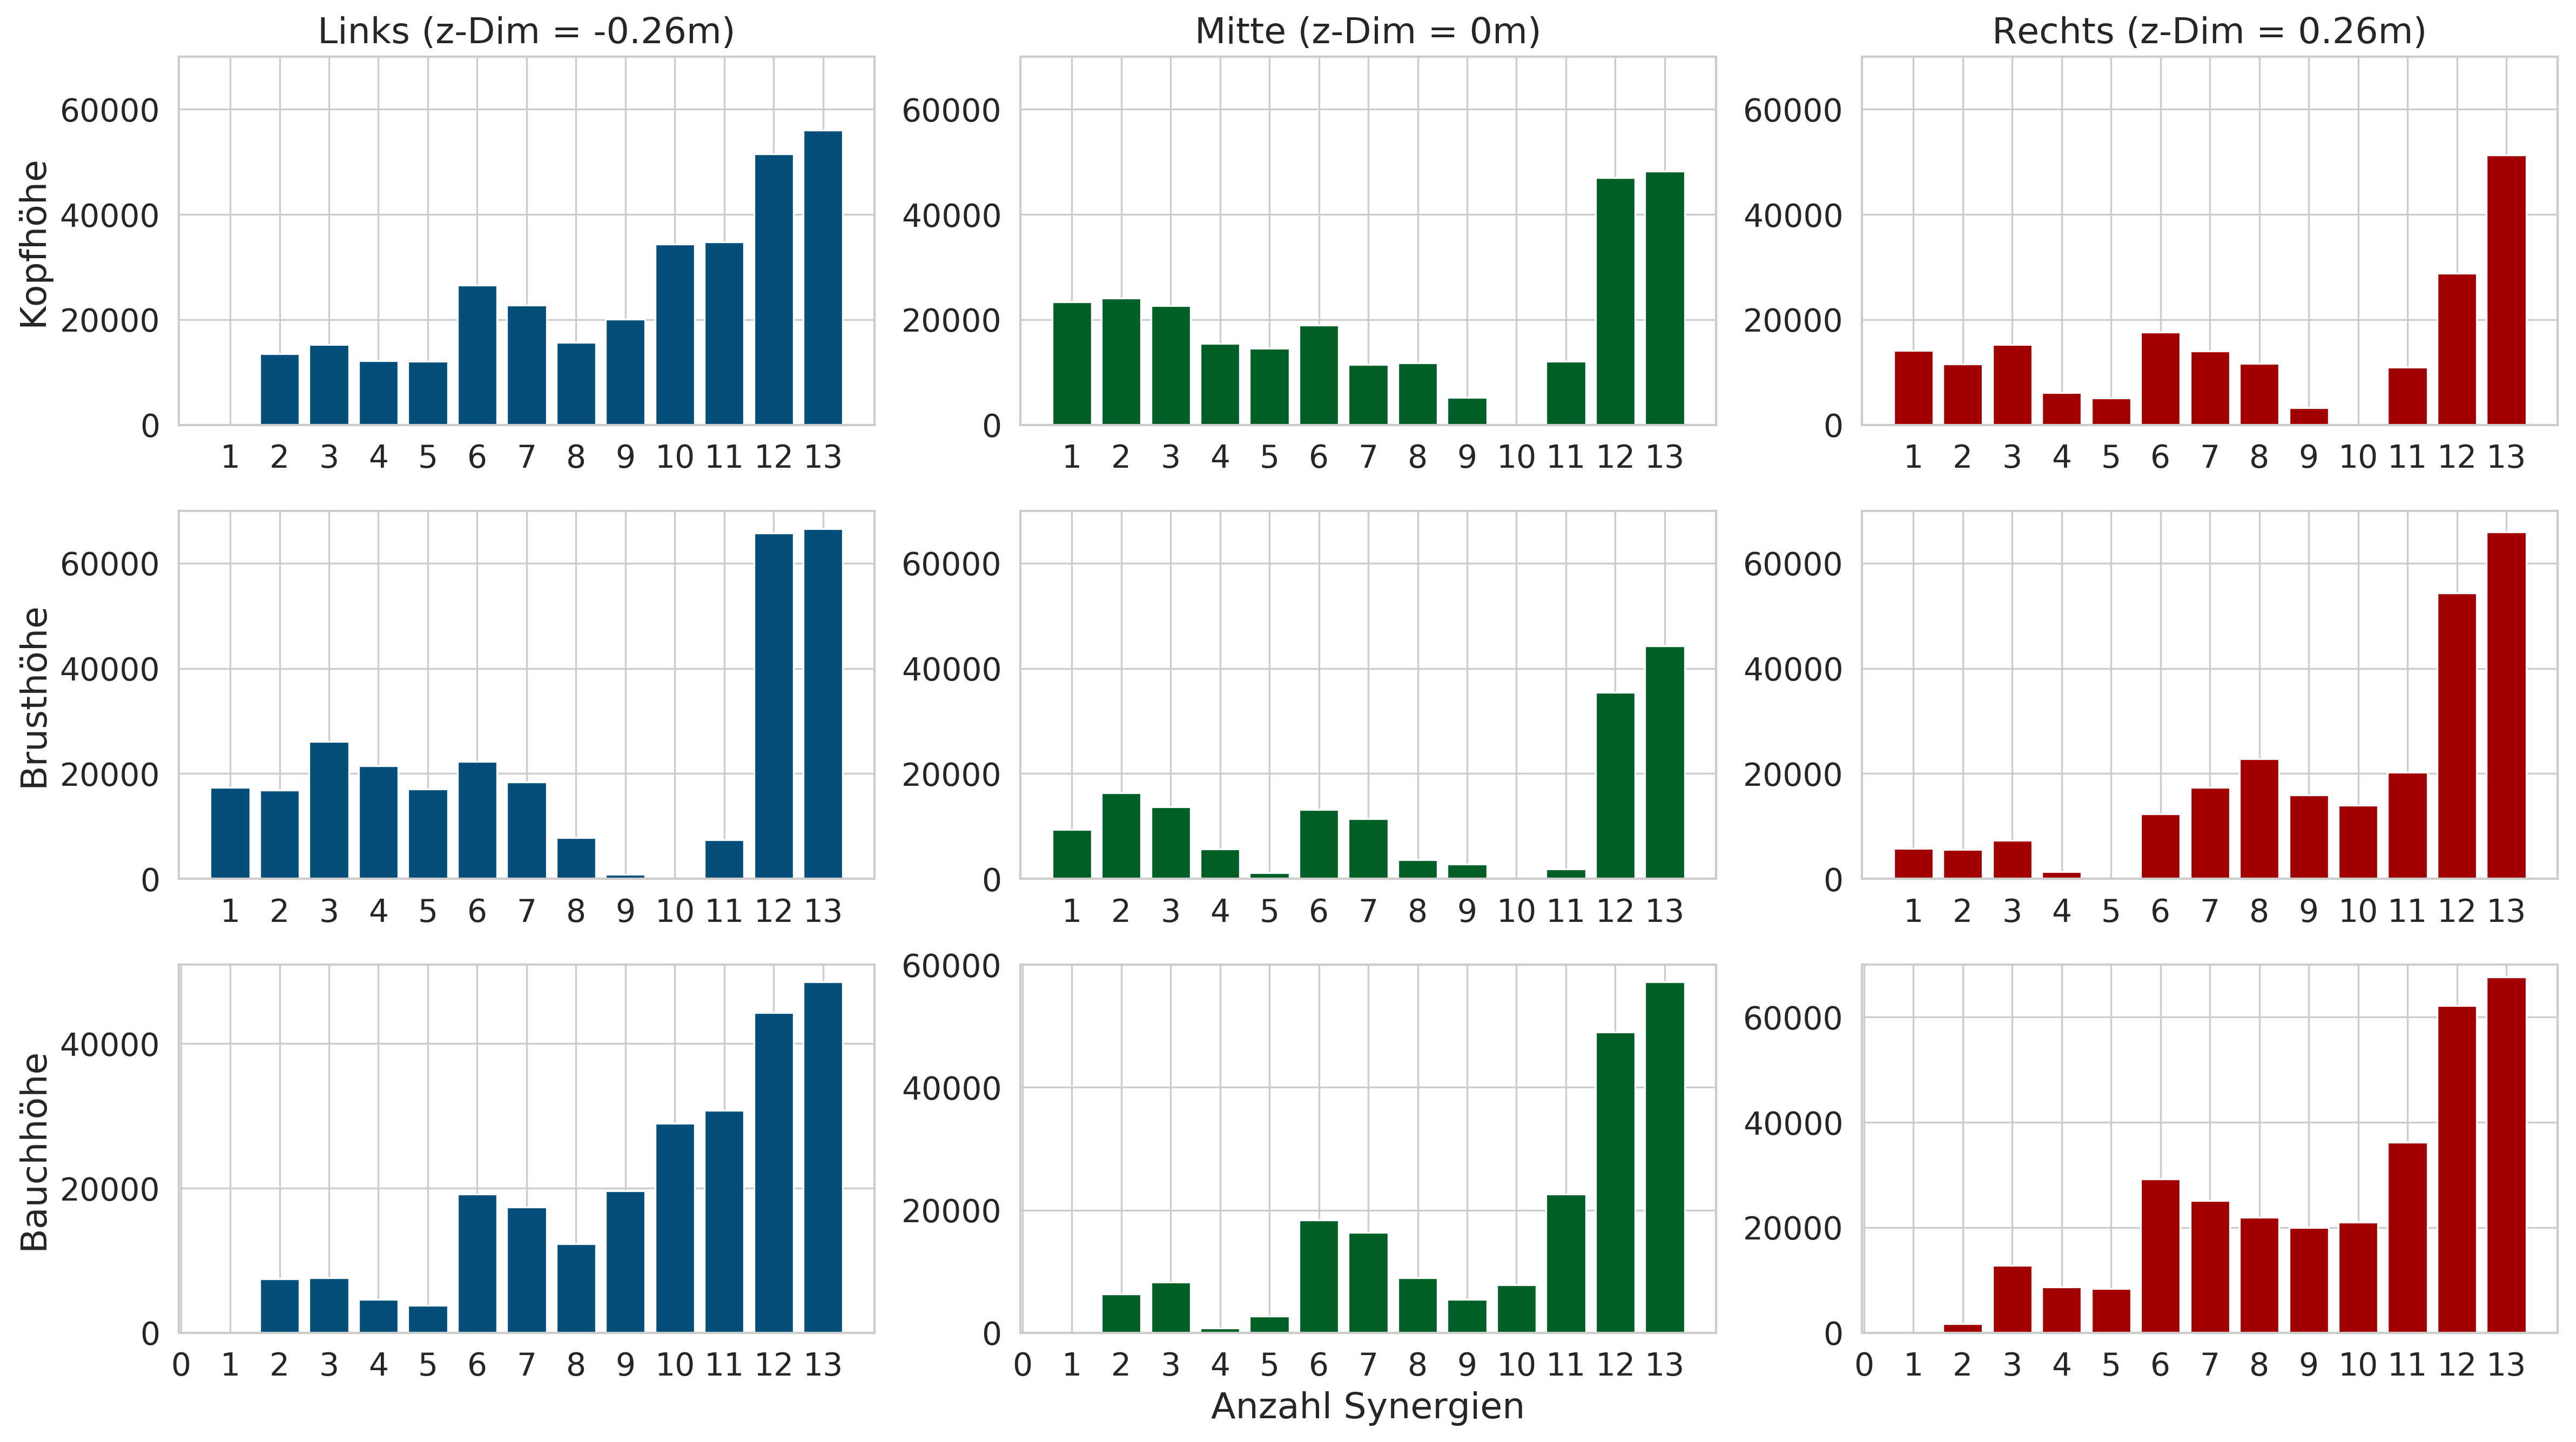

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


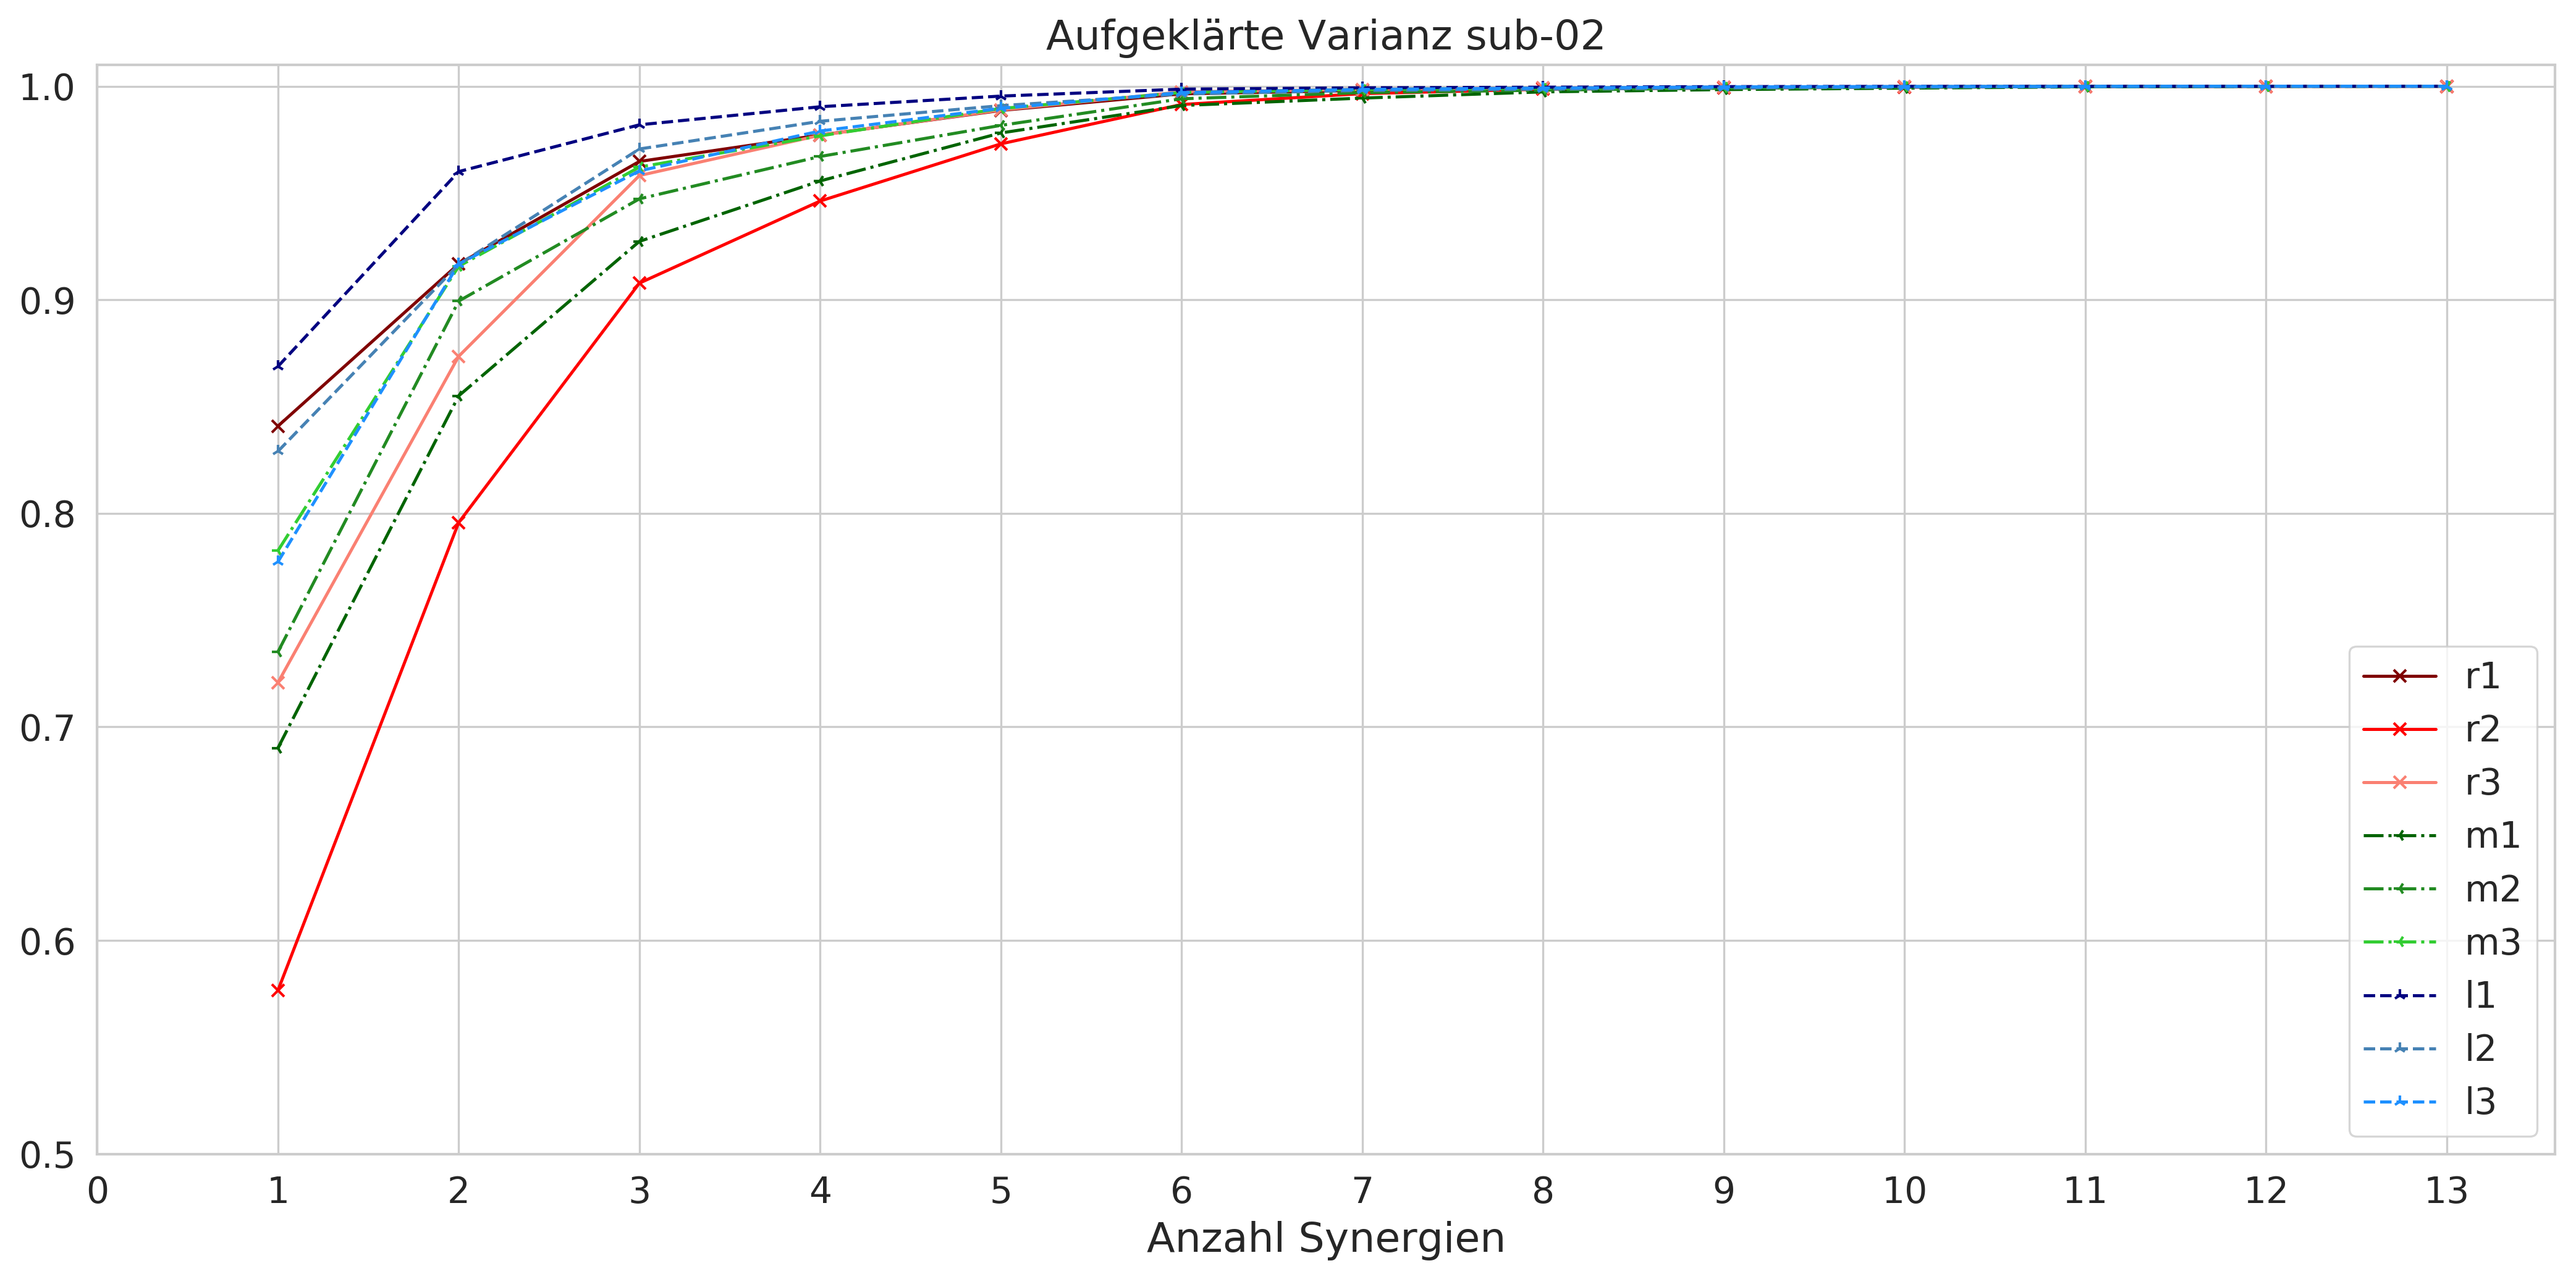

Subject Done!!


In [5]:
dir_ = '/home/michael/Desktop/model_evd/1H/*'  # input directory; 1H/ -> Sub-01, Sub-02, ..
path = '/home/michael/Desktop/model_evd/1H/group_level/'  # output folder

for subject in (glob.glob(dir_)):
    subject_id = subject.split('/')[-1]  # subject identifier
    print(subject_id)

    for filename in (glob.glob(subject+'/*')):
        # iterate through target position level folders; 1H/ -> Sub-01/ -> r1, r2, ...
        pos_name = filename.split('/')[-1]  # target position identifier
        print(pos_name)
        
        for x in (glob.glob(filename+'/*')): # iterate through single target pos folder
            if x.split('_')[-1] == 'vaf.csv':
                # extract Variance accounted for from df
                VAF = pd.read_csv(x)

            elif x.split('_')[-2] == 'model' and x.split('_')[-1] == 'evidence.csv':  # extract model evidence as Log likelihood from df
                logPD = pd.read_csv(x, encoding='utf-8')
                logPD = logPD['0'].values

        # sort Log-likelihoods and VAF into respective DataFrame by target position
        if pos_name == 'r1':
            r1_logPD = logPD
            r1_vaf = VAF
        elif pos_name == 'r2':
            r2_logPD = logPD
            r2_vaf = VAF
        elif pos_name == 'r3':
            r3_logPD = logPD
            r3_vaf = VAF
        elif pos_name == 'm1':
            m1_logPD = logPD
            m1_vaf = VAF
        elif pos_name == 'm2':
            m2_logPD = logPD
            m2_vaf = VAF
        elif pos_name == 'm3':
            m3_logPD = logPD
            m3_vaf = VAF
        elif pos_name == 'l1':
            l1_logPD = logPD
            l1_vaf = VAF
        elif pos_name == 'l2':
            l2_logPD = logPD
            l2_vaf = VAF
        elif pos_name == 'l3':
            l3_logPD = logPD
            l3_vaf = VAF

    # Plot Model Evidence
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))
    
    # Target R1
    ax[0][2].bar(range(1, len(r1_logPD)+1),r1_logPD,color=reds[10])
    ax[0][2].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][2].set_ylim(0,70000)
    ax[0][2].set_title('Rechts (z-Dim = 0.26m)')

    # Target M1
    ax[0][1].bar(range(1,len(m1_logPD)+1),m1_logPD,color=greens[10])
    ax[0][1].set_ylim(0,70000)
    ax[0][1].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][1].set_title('Mitte (z-Dim = 0m)')

    # Target L1
    ax[0][0].bar(range(1,len(l1_logPD)+1),l1_logPD,color=blues[10])
    ax[0][0].set_ylim(0,70000)
    ax[0][0].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[0][0].set_title('Links (z-Dim = -0.26m)')
    ax[0][0].set_ylabel('Kopfhöhe')
    
    # Target R2
    ax[1][2].bar(range(1,len(r2_logPD)+1),r2_logPD,color=reds[10])
    ax[1][2].set_ylim(0,70000)
    ax[1][2].set_xticks(np.arange(1, (len(logPD)+1), 1))

    # Target M2
    ax[1][1].bar(range(1,len(m2_logPD)+1),m2_logPD,color=greens[10])
    ax[1][1].set_ylim(0,70000)
    ax[1][1].set_xticks(np.arange(1, (len(logPD)+1), 1))

    # Target L2
    ax[1][0].bar(range(1,len(l2_logPD)+1),l2_logPD,color=blues[10])
    ax[1][0].set_ylim(0,70000)
    ax[1][0].set_xticks(np.arange(1, (len(logPD)+1), 1))
    ax[1][0].set_ylabel('Brusthöhe')

    # Target R3
    ax[2][2].bar(range(1,len(r3_logPD)+1),r3_logPD,color=reds[10])
    ax[2][2].set_ylim(0,70000)
    ax[2][2].set_xticks(np.arange(0, (len(logPD)+1), 1))

    # Target M3
    ax[2][1].bar(range(1,len(m3_logPD)+1),m3_logPD,color=greens[10])
    ax[2][1].set_ylim(0,70000)
    ax[2][1].set_xticks(np.arange(0, (len(logPD)+1), 1))

    # Target L3    
    ax[2][0].bar(range(1,len(l3_logPD)+1),l3_logPD,color=blues[10])
    ax[2][0].set_ylim(0,70000)
    ax[2][0].set_xticks(np.arange(0, (len(logPD)+1), 1))
    ax[2][0].set_ylabel('Bauchhöhe')
    ax[2][1].set_xlabel('Anzahl Synergien')

    
    fig.savefig(path+subject_id+'_model_evidences.png')  # Save figure
    plt.show()  # display figure
    
    # Plot VAF
    fig = plt.figure(figsize=(14,7))
    plt.title('Aufgeklärte Varianz '+ subject_id,fontsize=16)
    # Rightmost targetpositions
    plt.plot(range(1,len(r1_vaf)+1), r1_vaf, marker='x', color='Maroon', label='r1')
    plt.plot(range(1,len(r2_vaf)+1), r2_vaf, marker='x', color='red', label='r2')
    plt.plot(range(1,len(r3_vaf)+1), r3_vaf, marker='x', color='salmon', label='r3')
    # Middle  targetpositions
    plt.plot(range(1,len(m1_vaf)+1), m1_vaf, linestyle='-.', marker='3', color='darkgreen', label='m1')
    plt.plot(range(1,len(m2_vaf)+1), m2_vaf, linestyle='-.', marker='3', color='forestgreen', label='m2')
    plt.plot(range(1,len(m3_vaf)+1), m3_vaf, linestyle='-.', marker='3', color='limegreen', label='m3')
    # Leftmost  targetpositions
    plt.plot(range(1,len(l1_vaf)+1), l1_vaf, linestyle='--',marker='2', color='navy', label='l1')
    plt.plot(range(1,len(l2_vaf)+1), l2_vaf, linestyle='--', marker='2', color='steelblue', label='l2')
    plt.plot(range(1,len(l3_vaf)+1), l3_vaf, linestyle='--', marker='2', color='dodgerblue', label='l3')

    # Arrange X-Ticks so that they start with the first value instead of non-infomartive Zero-Value
    plt.xticks(np.arange(0, (len(r1_vaf)+1), 1))
    plt.xlabel('Anzahl Synergien')
    plt.legend()
    plt.ylim(.5,1.01)  # set Y-lim to 50%; Change to higher % when necessary
    fig.savefig(path+subject_id+'_vafs.png')  # Save figure
    plt.show()  # display figure
    print('Subject Done!!')